# Project 4

## Exploratory Data Analysis

This notebook is for the EDA of the following 4 datasets:

* Trap data - indicating number of mosquitos caught at various trap locations and tested for presence of the West Nile Virus (WNV)
* Weather data - includes temperature, dew point and wetbulb data
* Spray data - includes date and location of sprays

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# pd.set_option('display.max_columns', 500)

In [3]:
df_train = pd.read_csv("./input/train.csv")
df_test = pd.read_csv("./input/test.csv")
df_spray = pd.read_csv("./input/spray.csv")
df_weather = pd.read_csv("./input/weather_stn_avg.csv")

In [4]:
#group by so that mosquitos no longer broken down to 50 blocks, yet still retaining granularity of date, trap, species
df_train = df_train.groupby(['Date','Trap','Address','Species'])['NumMosquitos','WnvPresent'].sum()
df_train['WnvPresent'].value_counts()
#WNVpresent is no longer binary because ones have added together. 
#change back to binary, as long as presence is in one 50 block, will be 1, else 0
df_train['WnvPresent'] = df_train['WnvPresent'].map(lambda i: 0 if i == 0 else 1)
df_train['WnvPresent'].value_counts()
df_train.groupby(['Date','Trap','Address','Species']).sum().to_csv('./input/grouped_train.csv') 

In [5]:
df_train = pd.read_csv("./input/grouped_train.csv")

In [6]:
df_train.head()

Date  Trap                                            Address  \
0  2007-05-29  T002  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  T002  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  T007  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29  T015    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29  T015    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  NumMosquitos  WnvPresent  
0  CULEX PIPIENS/RESTUANS             1           0  
1          CULEX RESTUANS             1           0  
2          CULEX RESTUANS             1           0  
3  CULEX PIPIENS/RESTUANS             1           0  
4          CULEX RESTUANS             4           0

## Trap Data

## Number of mosquitos caught in traps

### Mosquito figures by year

In [7]:
df_train_time = pd.read_csv("./input/grouped_train.csv", index_col='Date', parse_dates=True) # make index into datetime
yearly_train = df_train_time.resample('Y').sum() # group by year
yearly_train.drop(yearly_train.index[[1,3,5]], axis=0, inplace=True) # drop 2008, 2010, 2012, which are empty

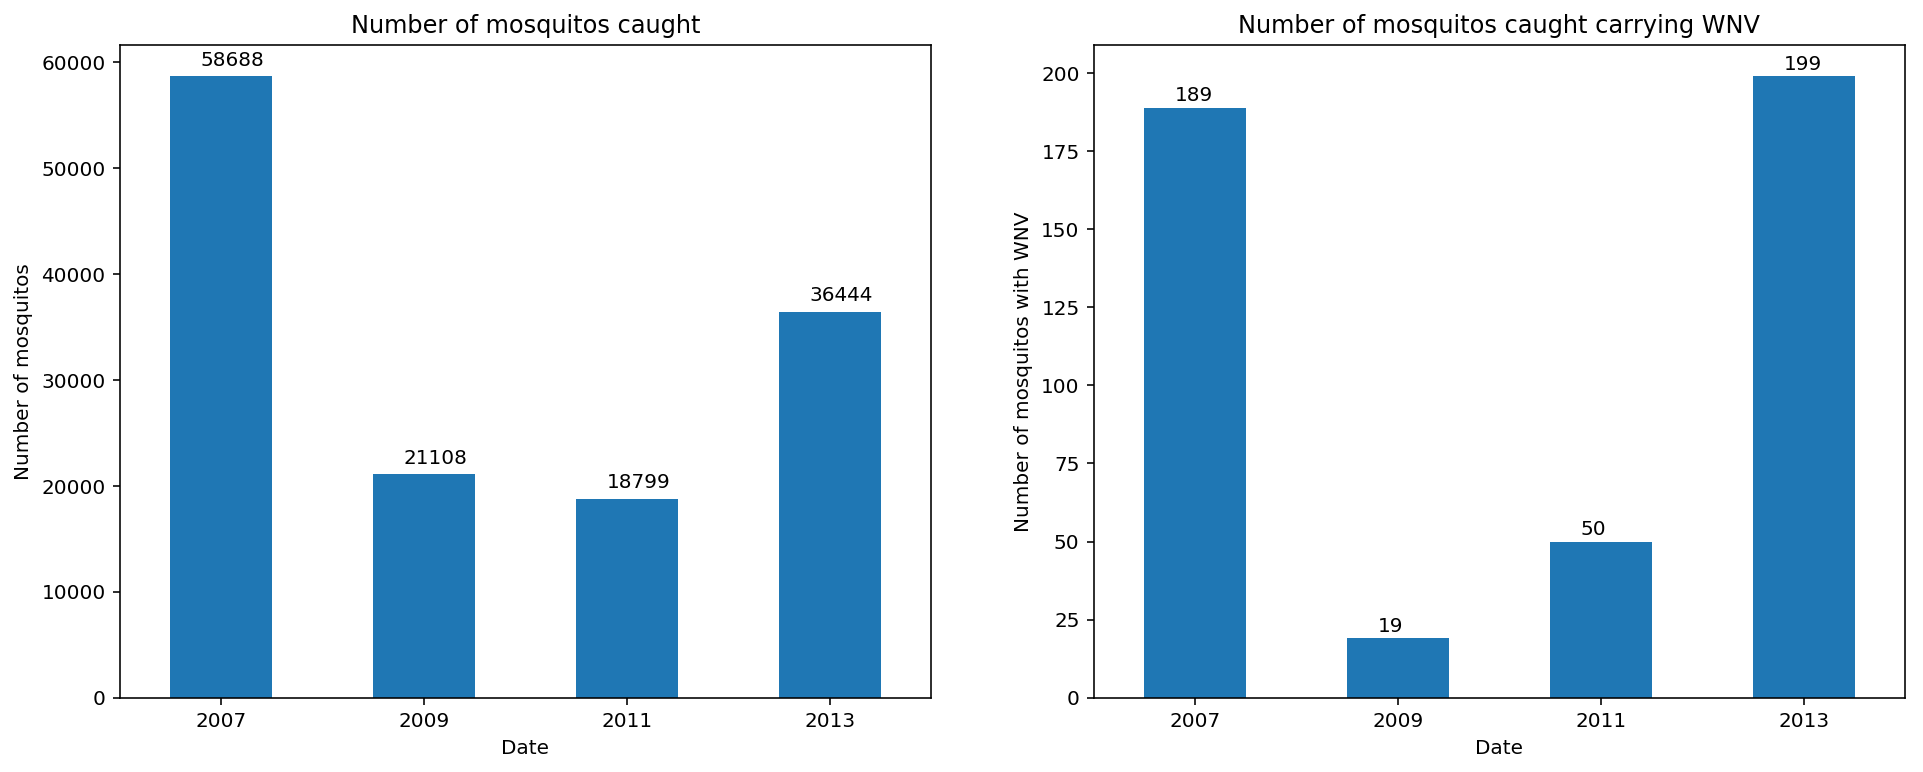

In [8]:
# plot for mosquitos and virus by year
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (16, 6))

yearly_train['NumMosquitos'].plot.bar(ax=ax1)
labels = yearly_train.index.strftime('%Y') # set labels as year
ax1.set_title('Number of mosquitos caught')
ax1.set_xticks = range(len(yearly_train)) # number of ticks
ax1.set_xticklabels(labels, rotation=0)
ax1.set_ylabel('Number of mosquitos')

for i in range(len(yearly_train)):
    ax1.annotate(yearly_train.NumMosquitos[i],(i-0.1 ,yearly_train.NumMosquitos[i]+1000)) # values on top of bars, and also to position them

yearly_train['WnvPresent'].plot.bar(ax=ax2)
labels = yearly_train.index.strftime('%Y') #set label as year 
ax2.set_title('Number of mosquitos caught carrying WNV')
ax2.set_xticks = range(len(yearly_train)) #number of ticks
ax2.set_xticklabels(labels,rotation=0 )
ax2.set_ylabel('Number of mosquitos with WNV')

for i in range(len(yearly_train)):
    ax2.annotate(yearly_train.WnvPresent[i],(i-0.1 ,yearly_train.WnvPresent[i]+2)) # values on top of bars, and also to position them 

* Total number of mosquitos caught dropped in 2009 and 2011, before rising in 2013.
* Sharp drop in number of mosquitos caught carrying WNV in 2009, before rising slightly in 2011 and subsequently rising sharply in 2013.

### Mosquito figures by month

In [9]:
monthly_train = df_train_time.resample('M').sum() # group by month
monthly_train = monthly_train[monthly_train.NumMosquitos != 0] 

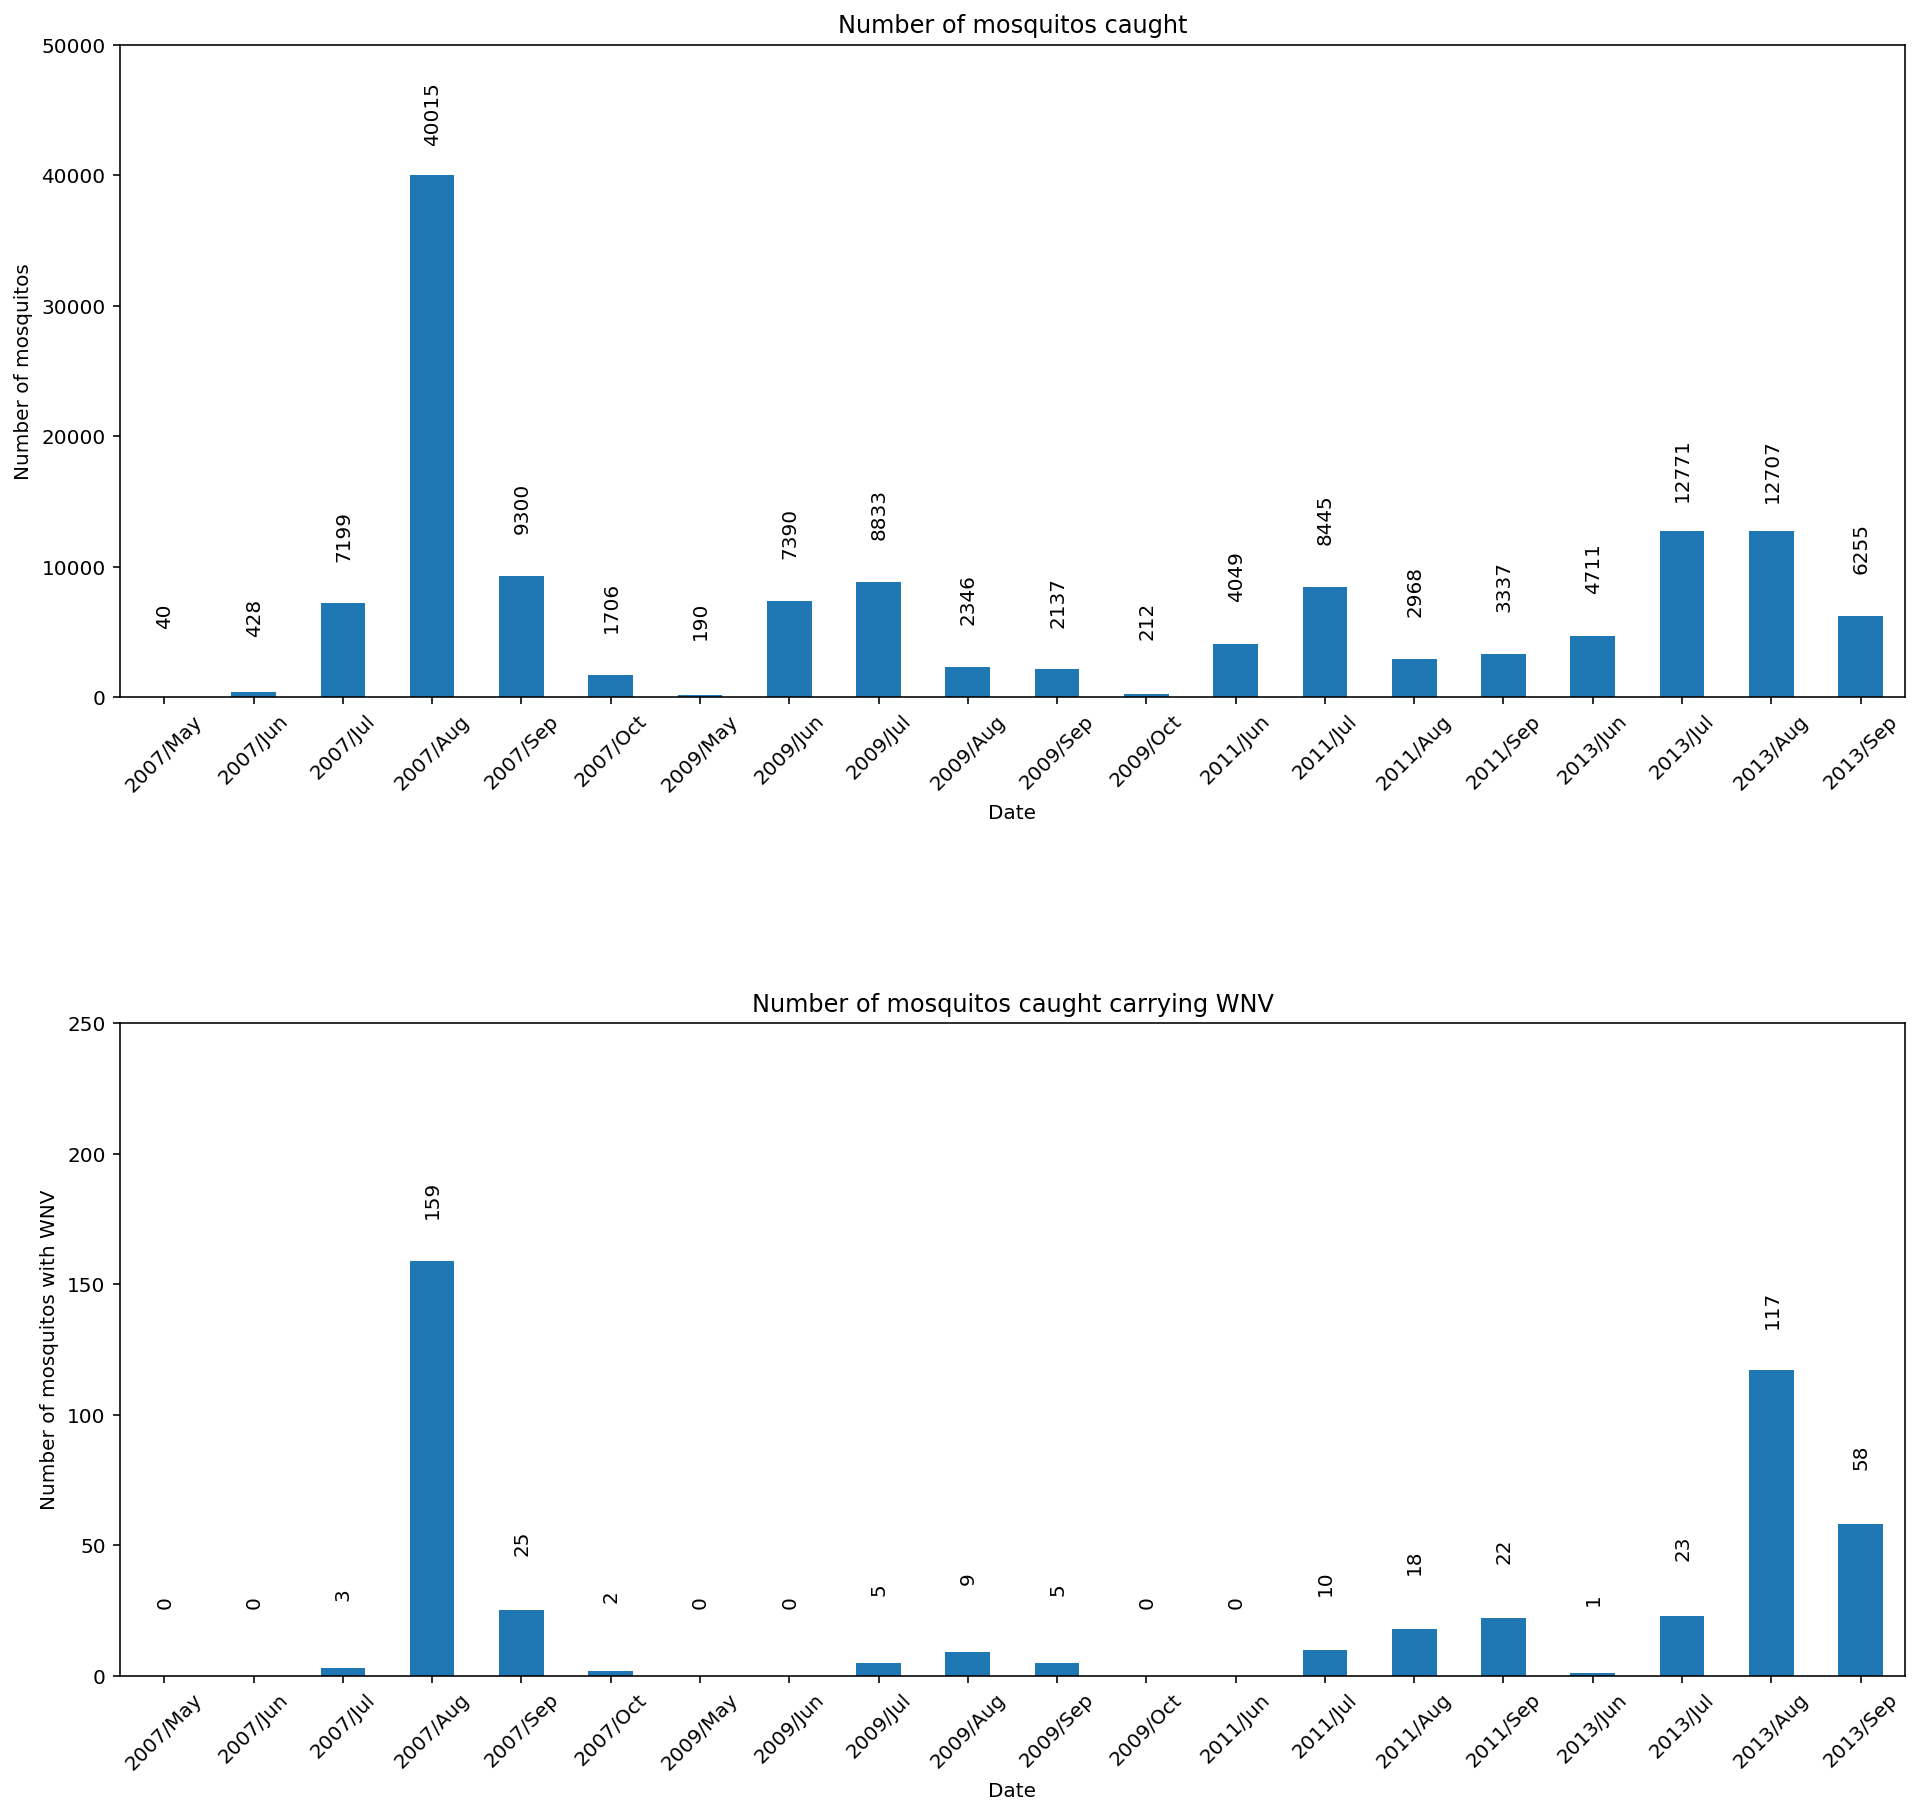

In [10]:
#plot for mosquitos and virus by month
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (16, 15))

monthly_train['NumMosquitos'].plot.bar(ax=ax1)
labels = monthly_train.index.strftime('%Y/%b') # labels as year and abbreviated month name
ax1.set_title('Number of mosquitos caught')
ax1.set_xticks = range(len(monthly_train)) 
ax1.set_xticklabels(labels, rotation=45, fontsize=10)
ax1.set_ylabel('Number of mosquitos')
ax1.set_ylim((0,50000))

for i in range(len(monthly_train)):
    ax1.annotate(monthly_train.NumMosquitos[i],(i-0.1 ,monthly_train.NumMosquitos[i]+6000),rotation=90)

plt.subplots_adjust(wspace=None, hspace=0.5)

monthly_train['WnvPresent'].plot.bar(ax=ax2)
labels = monthly_train.index.strftime('%Y/%b')
ax2.set_title('Number of mosquitos caught carrying WNV')
ax2.set_xticks = range(len(monthly_train))
ax2.set_xticklabels(labels, rotation=45, fontsize=10)
ax2.set_ylabel('Number of mosquitos with WNV')
ax2.set_ylim((0,250))

for i in range(len(monthly_train)):
    ax2.annotate(monthly_train.WnvPresent[i],(i-0.1 ,monthly_train.WnvPresent[i]+25),rotation=90 )

The distribution of number of mosquitos caught by month follows a similar distribution with that of number of mosquitos caught carrying WNV by month.

## Mosquito and WNV locations

![Mosquito and WNV locations](./image/WNV-location-combined.png)

>The faint yellow markers indicate where the mosquito traps are, while the red markers indicate where WNV is present among the mosquitos caught. The size of the markers is directly proportional to the number of mosquitos caught. (Maps produced using Tableau)

## WNV presence in mosquitos caught

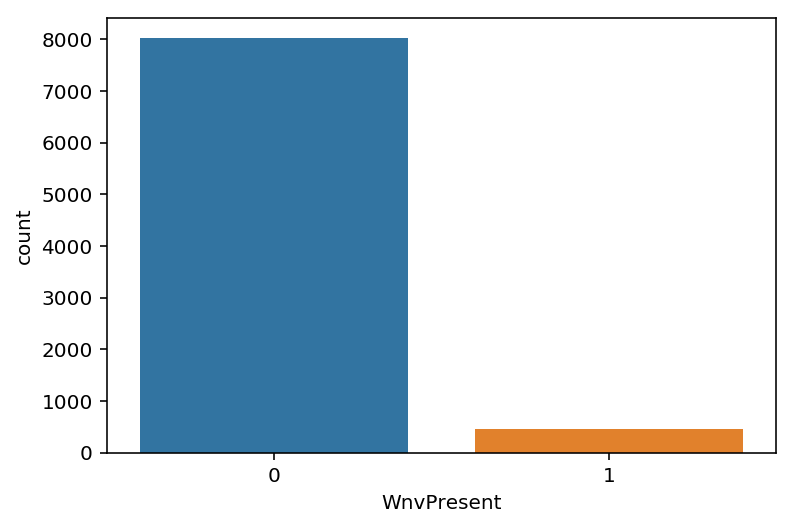

In [11]:
sns.countplot('WnvPresent', data = df_train);

In [12]:
df_train['WnvPresent'].value_counts()

0    8018
1     457
Name: WnvPresent, dtype: int64

In [13]:
print('Percentage of WNV presence: ', round(100*457/(8018+457),3),'%')

Percentage of WNV presence:  5.392 %


We have a very unbalanced dataset, with WNV present in 5.4% of the total number of mosquitos caught.

---

## Weather Data

In [14]:
df_weather.columns

Index(['Unnamed: 0', 'Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
       'PrecipTotal'],
      dtype='object')

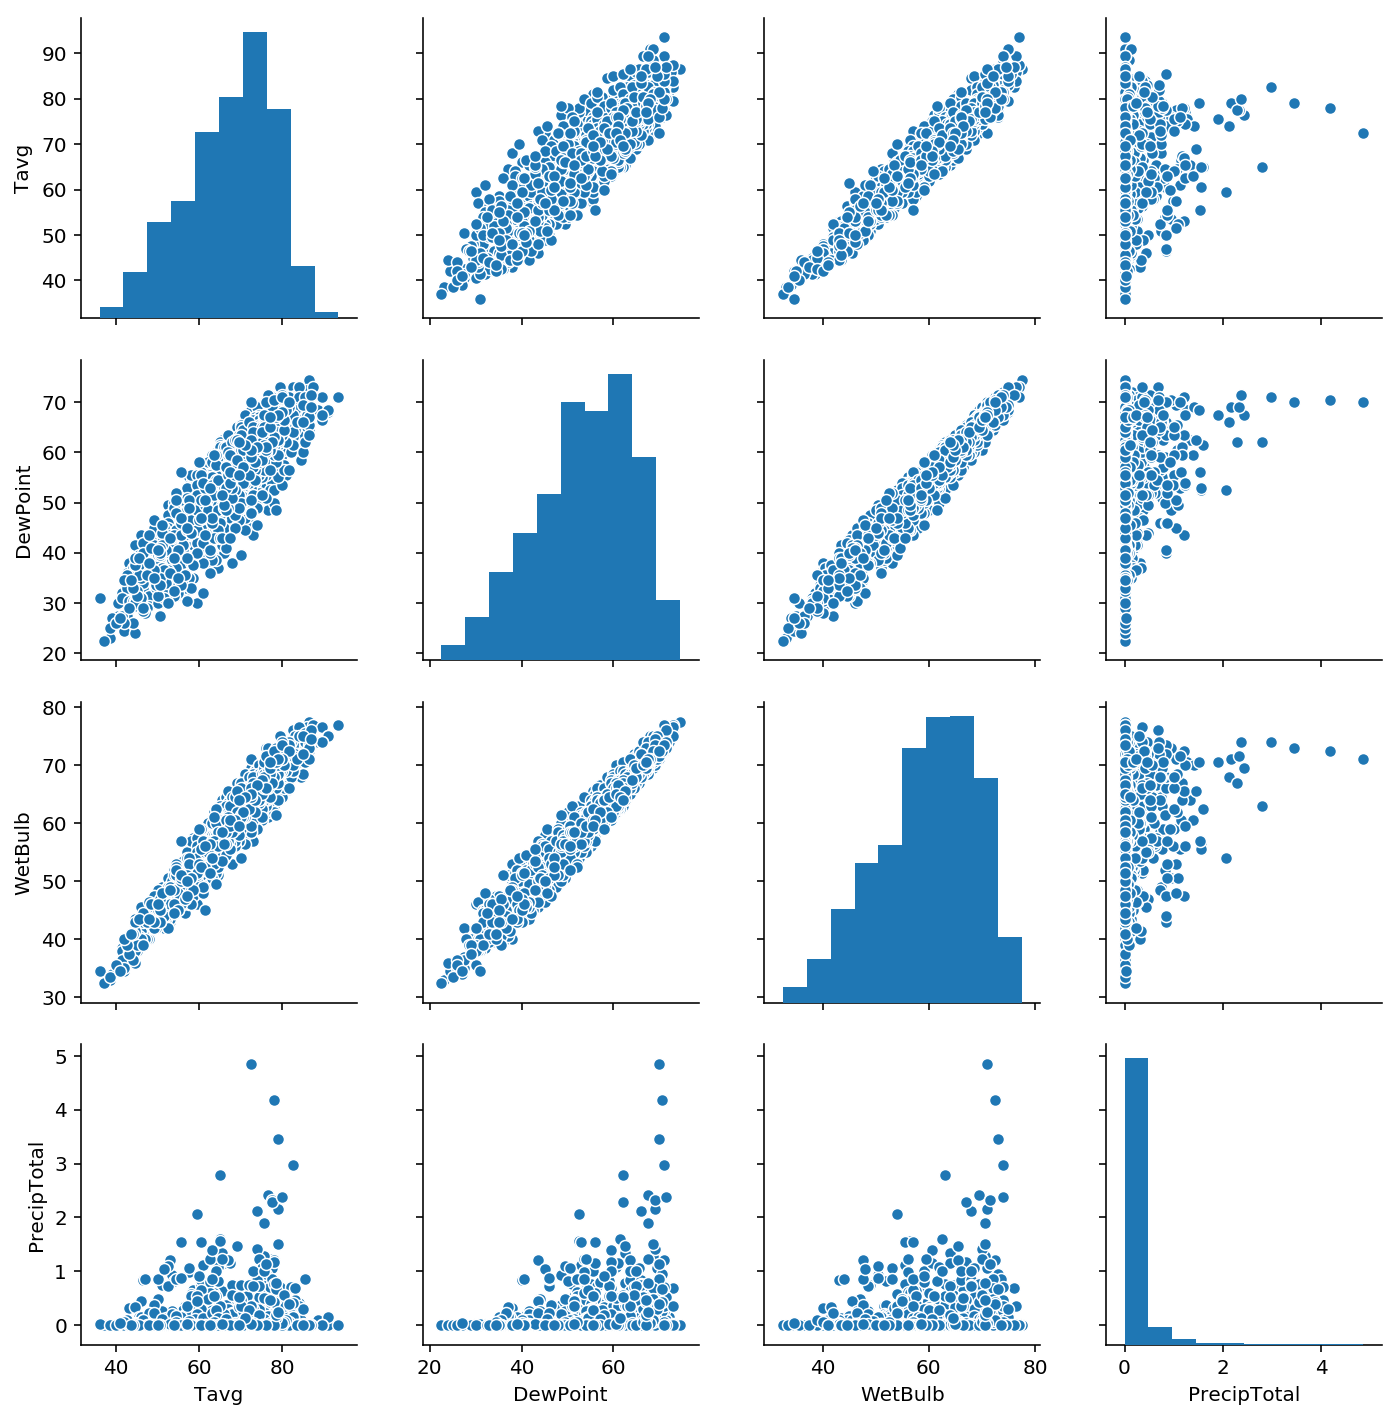

In [15]:
sns.pairplot(data = df_weather[['Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal']]) ;

Average temperature has strong linear correlation with wetbulb and dewpoint readings. For precipitation, it is harder to discern a relationship as many values are at zero. 

Temperature, wetbulb, and dewpoint are normally distributed and skewed to the left. Precipitation is strongly skewed to the right due to high number of zero values. 

## Mosquitos and temperature

In [16]:
#convert data to datetime for weather 
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather['Date'].dtypes # convert to datetime type

dtype('<M8[ns]')

In [17]:
#convert data to datetime for train
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Date'].dtypes # convert to datetime type

dtype('<M8[ns]')

In [18]:
#function to plot temp-mozzie 
def temp_mozzie(year_list):
    for year in year_list:
        weather = df_weather[(df_weather['Date'] >= '{}-01-01'.format(year)) & (df_weather['Date'] <= '{}-12-31'.format(year))] #masking to collect data from that year
        mozzie = df_train[(df_train['Date'] > '{}-01-01'.format(year)) & (df_train['Date'] <= '{}-12-31'.format(year))].groupby('Date').sum() #masking to collect data from that year
        mozzie = mozzie.reset_index() #to create date column from index
        mozzie['Date'] = pd.to_datetime(mozzie['Date']) #change to datetime format
        mozzie['Date'].dtypes

        plt.figure(figsize=(20,10))
        plt.plot(weather['Date'], (weather['Tavg']-weather['Tavg'].mean())/weather['Tavg'].std(), c='red') #plot for standardized temp
        plt.plot(mozzie['Date'], (mozzie['NumMosquitos']-mozzie['NumMosquitos'].mean())/mozzie['NumMosquitos'].std(), c='blue') #plot for standardized num of mozzies
        plt.xlabel('Date', fontsize=16)
        plt.title('Number of mosquitos and temperature - {}'.format(year), fontsize=28)
        plt.legend(['Temperature','Mosquitos'])

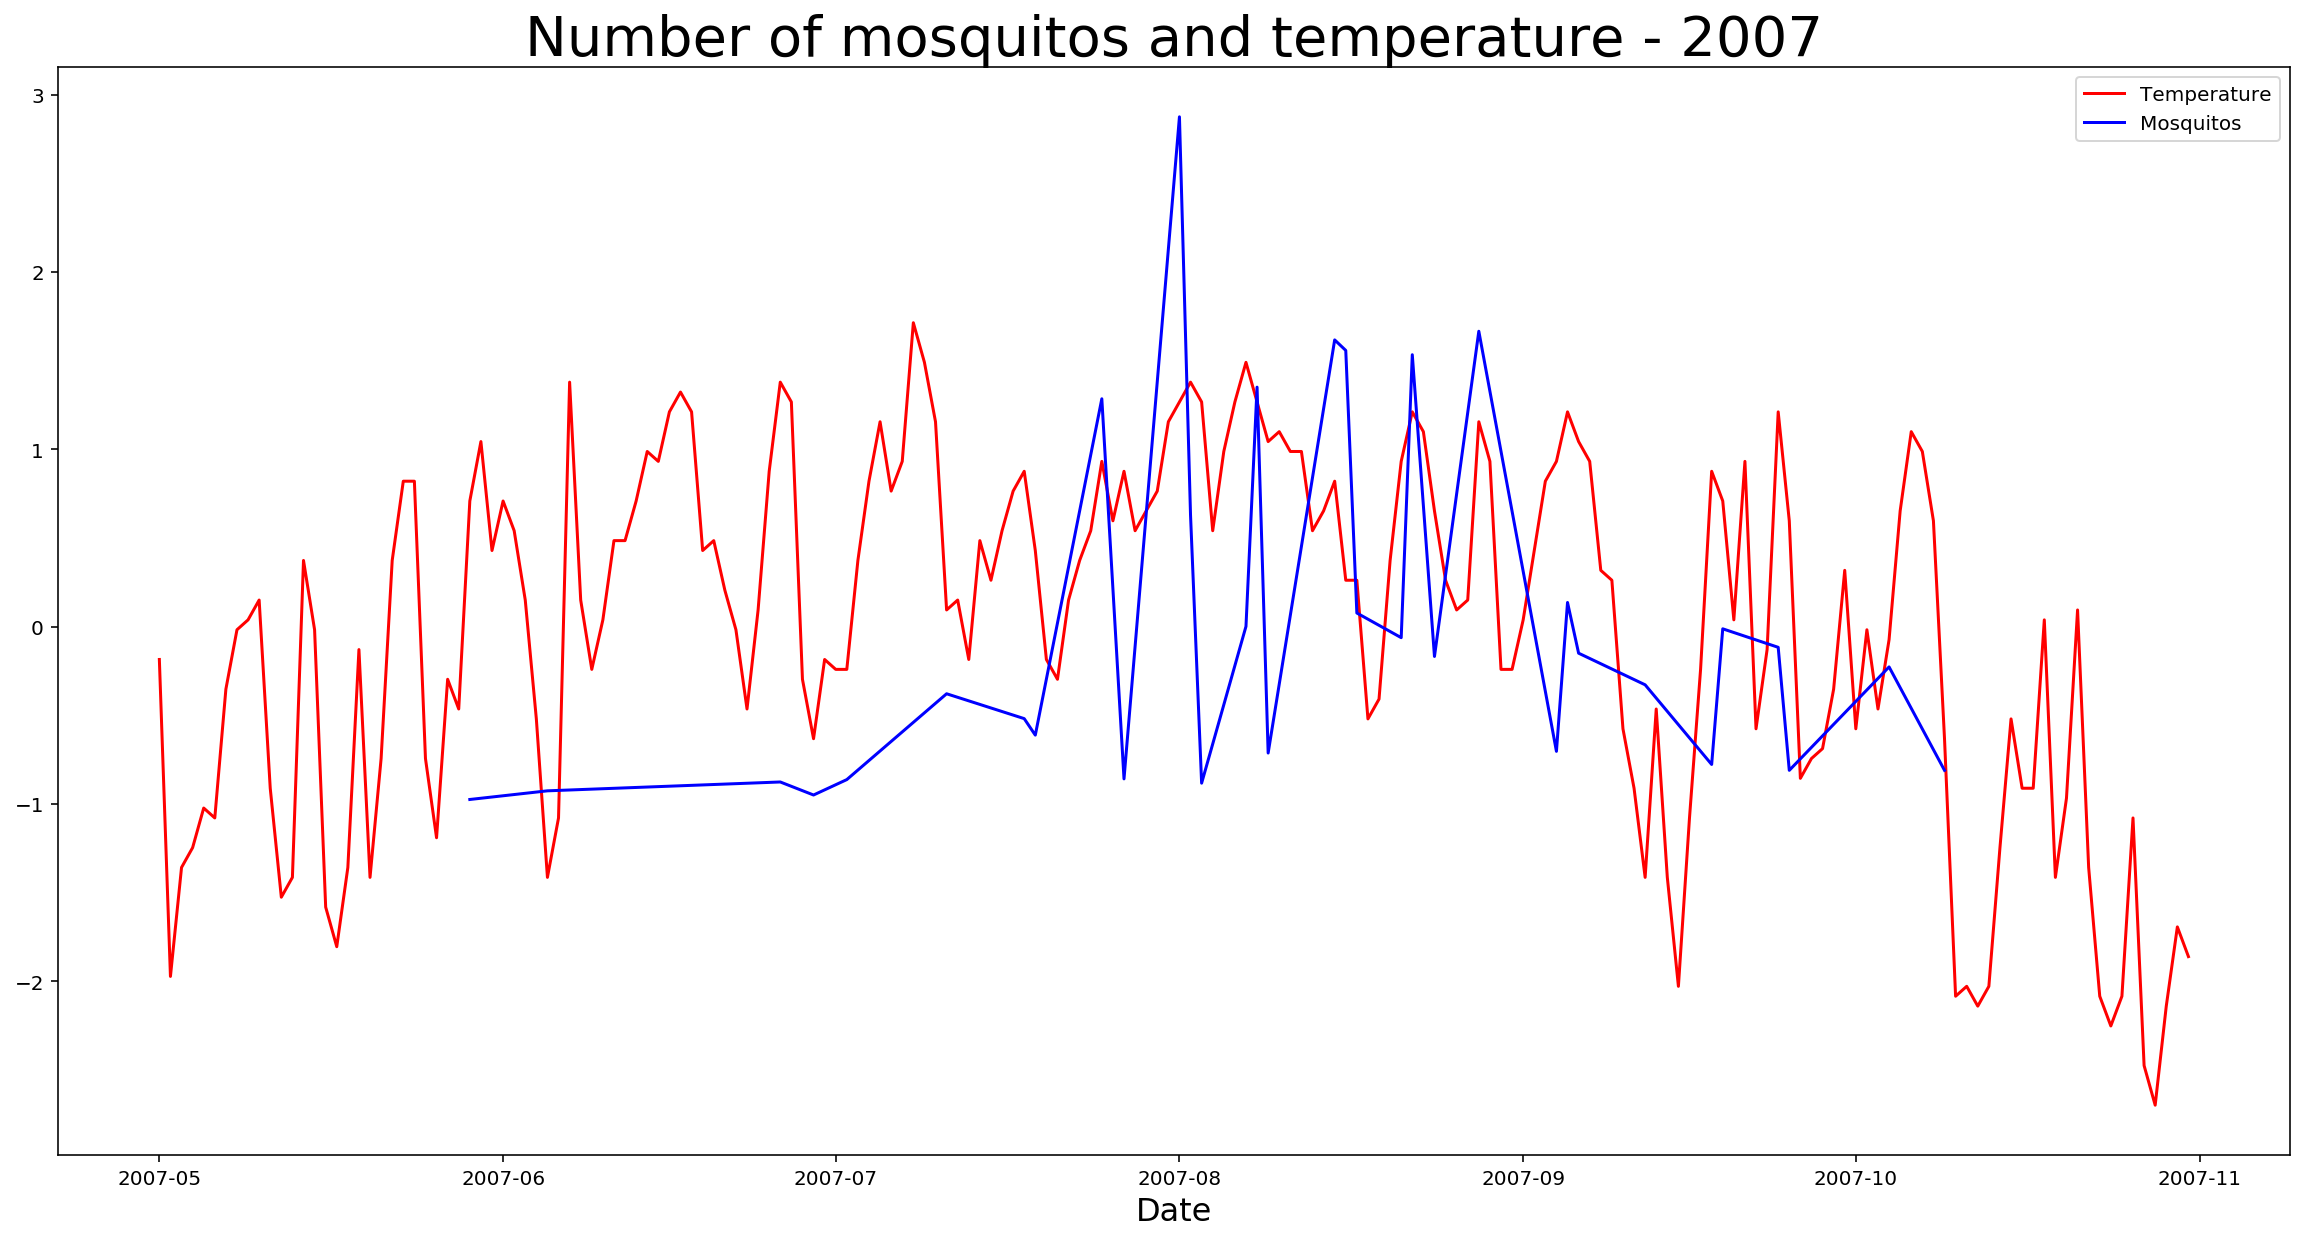

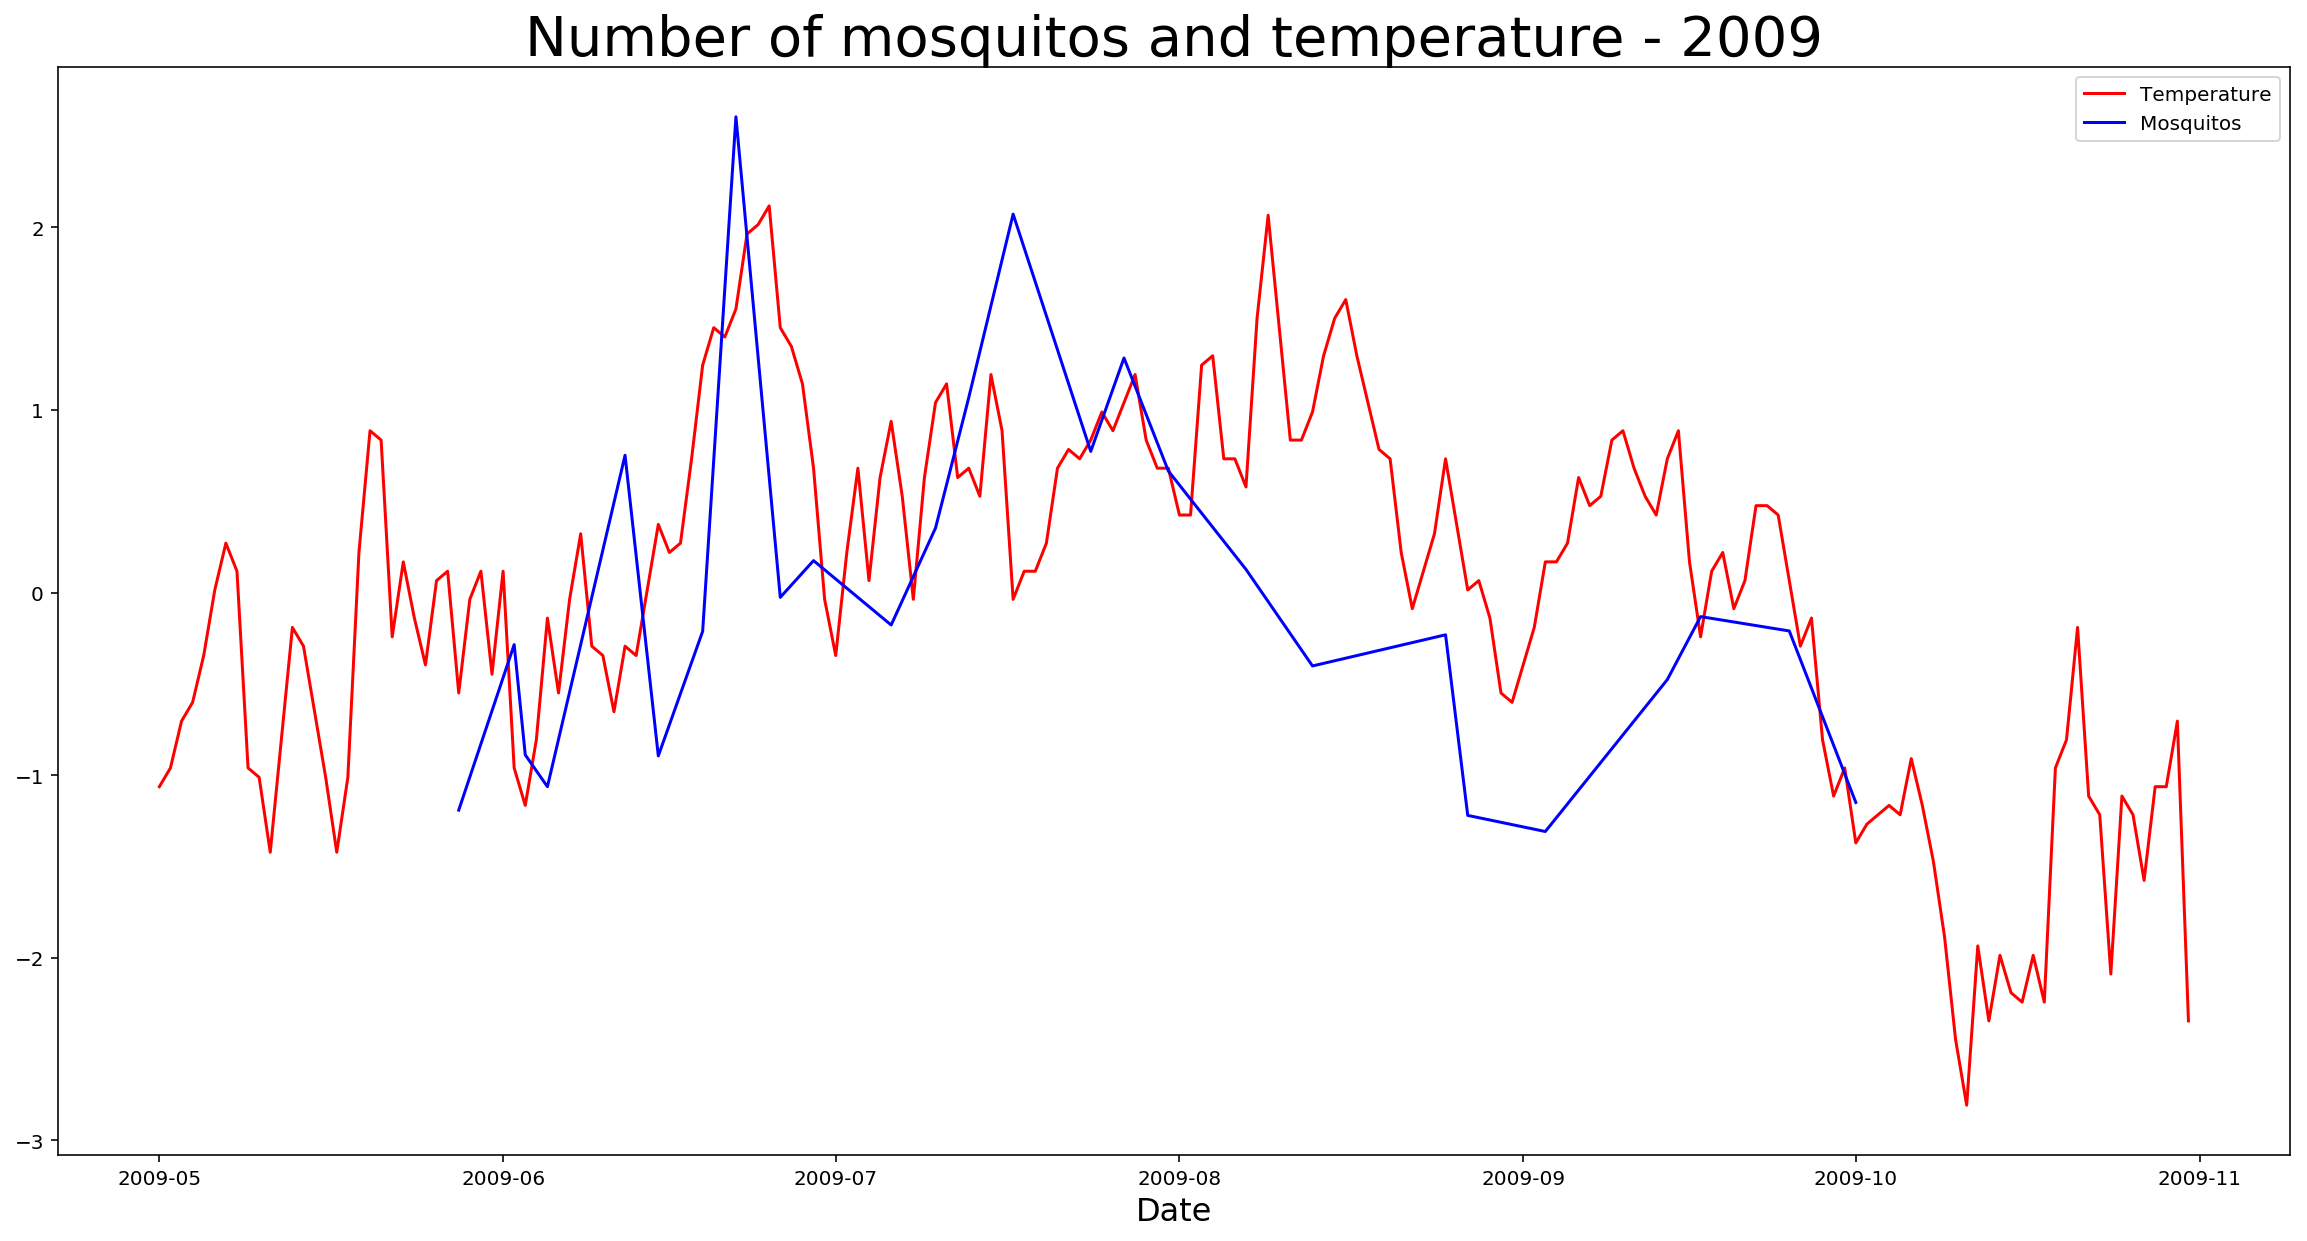

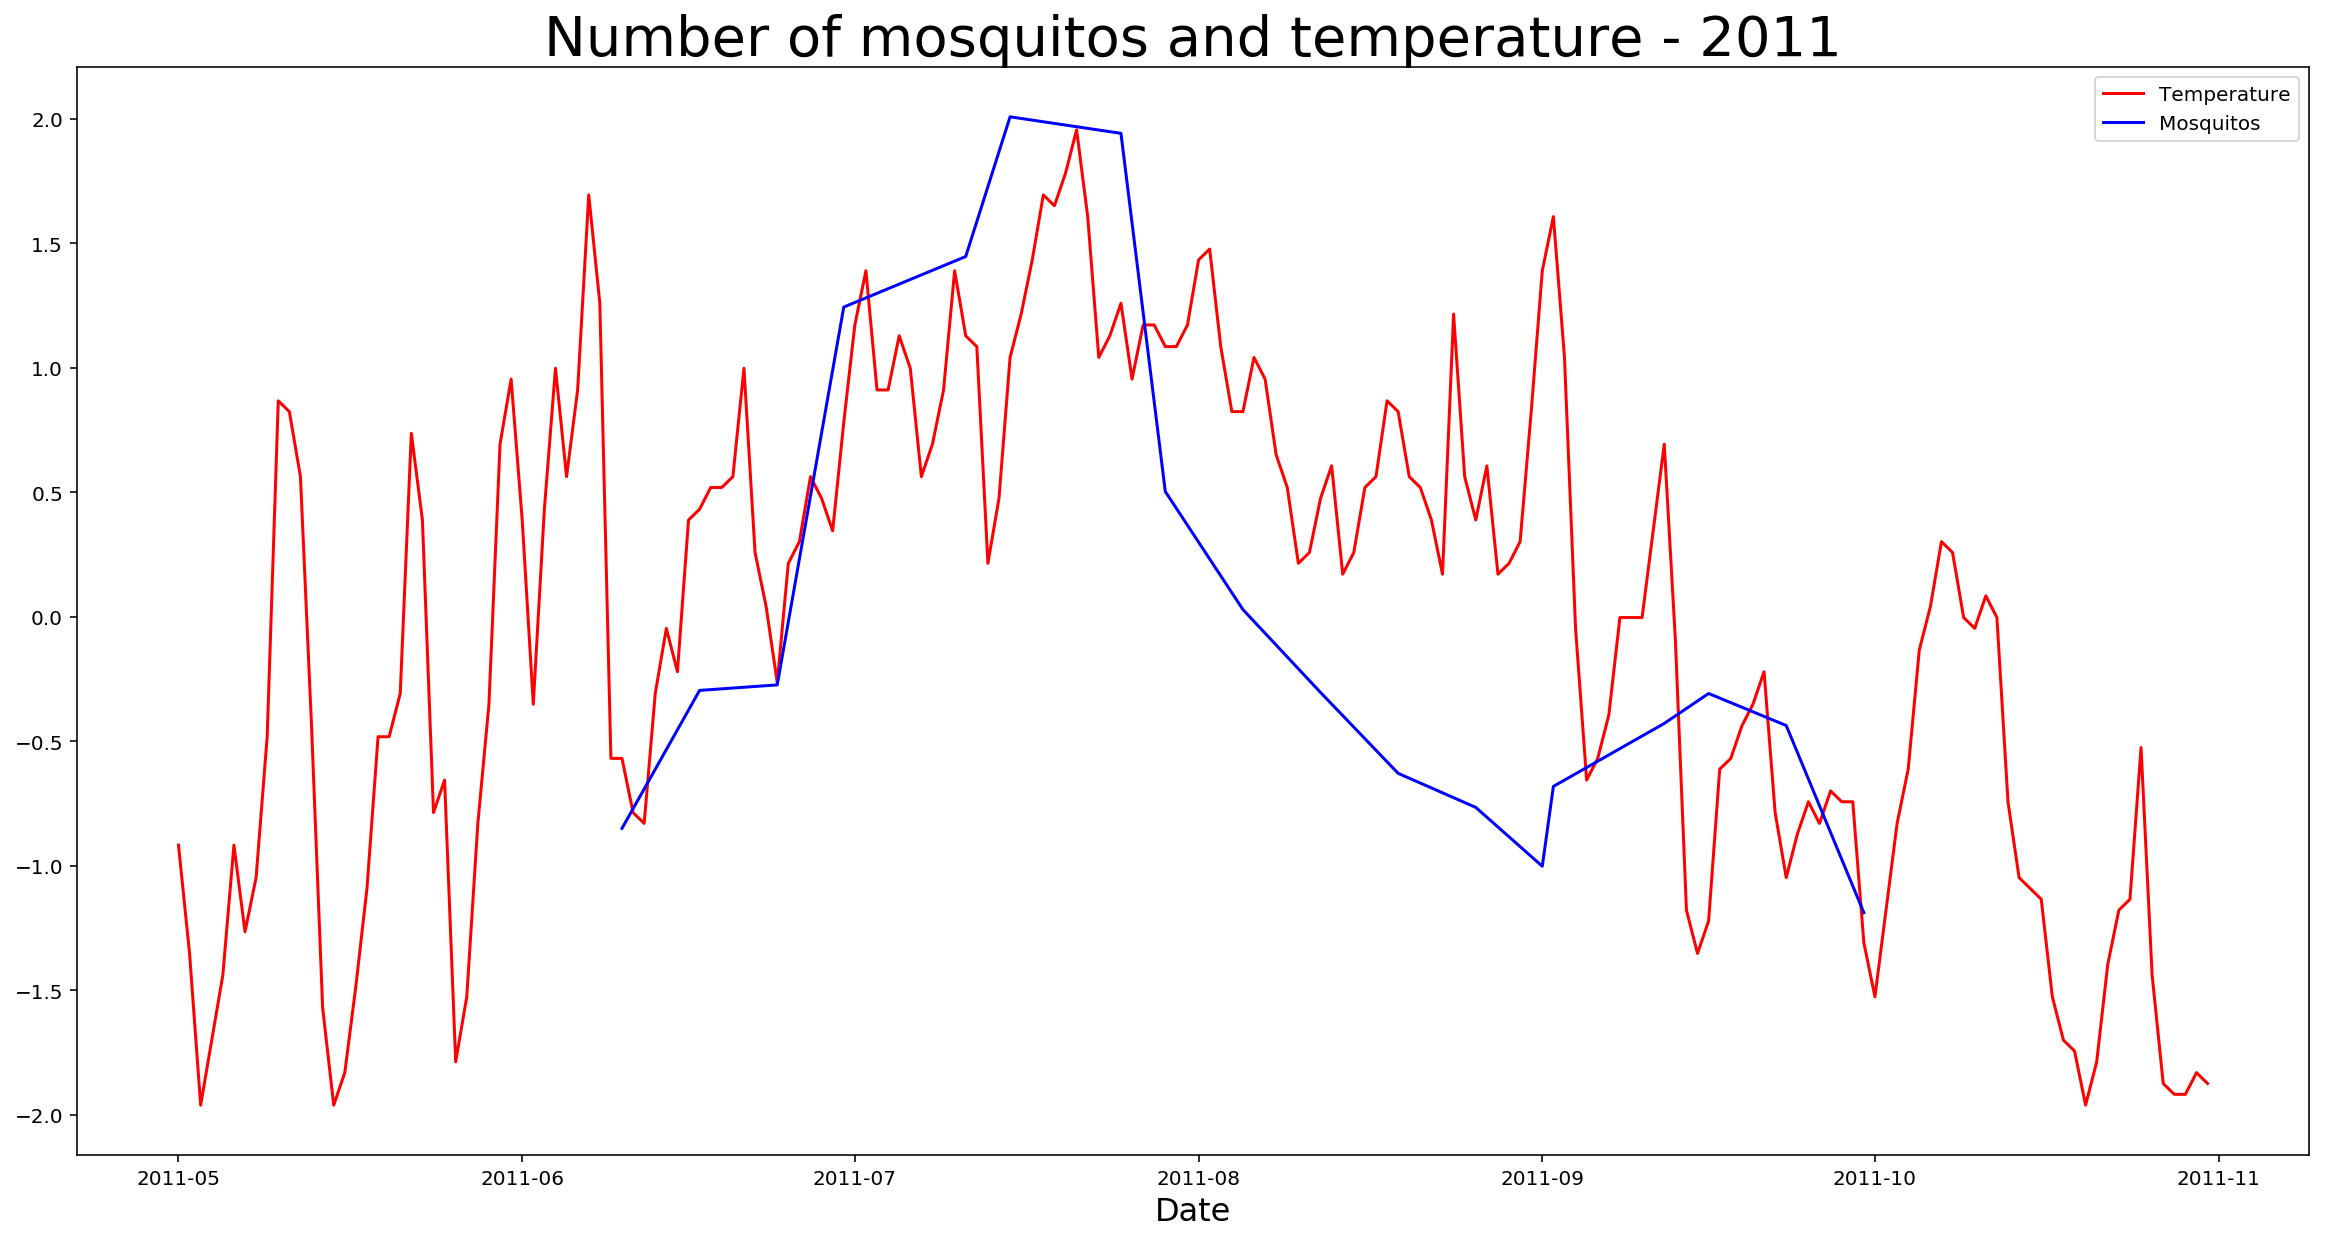

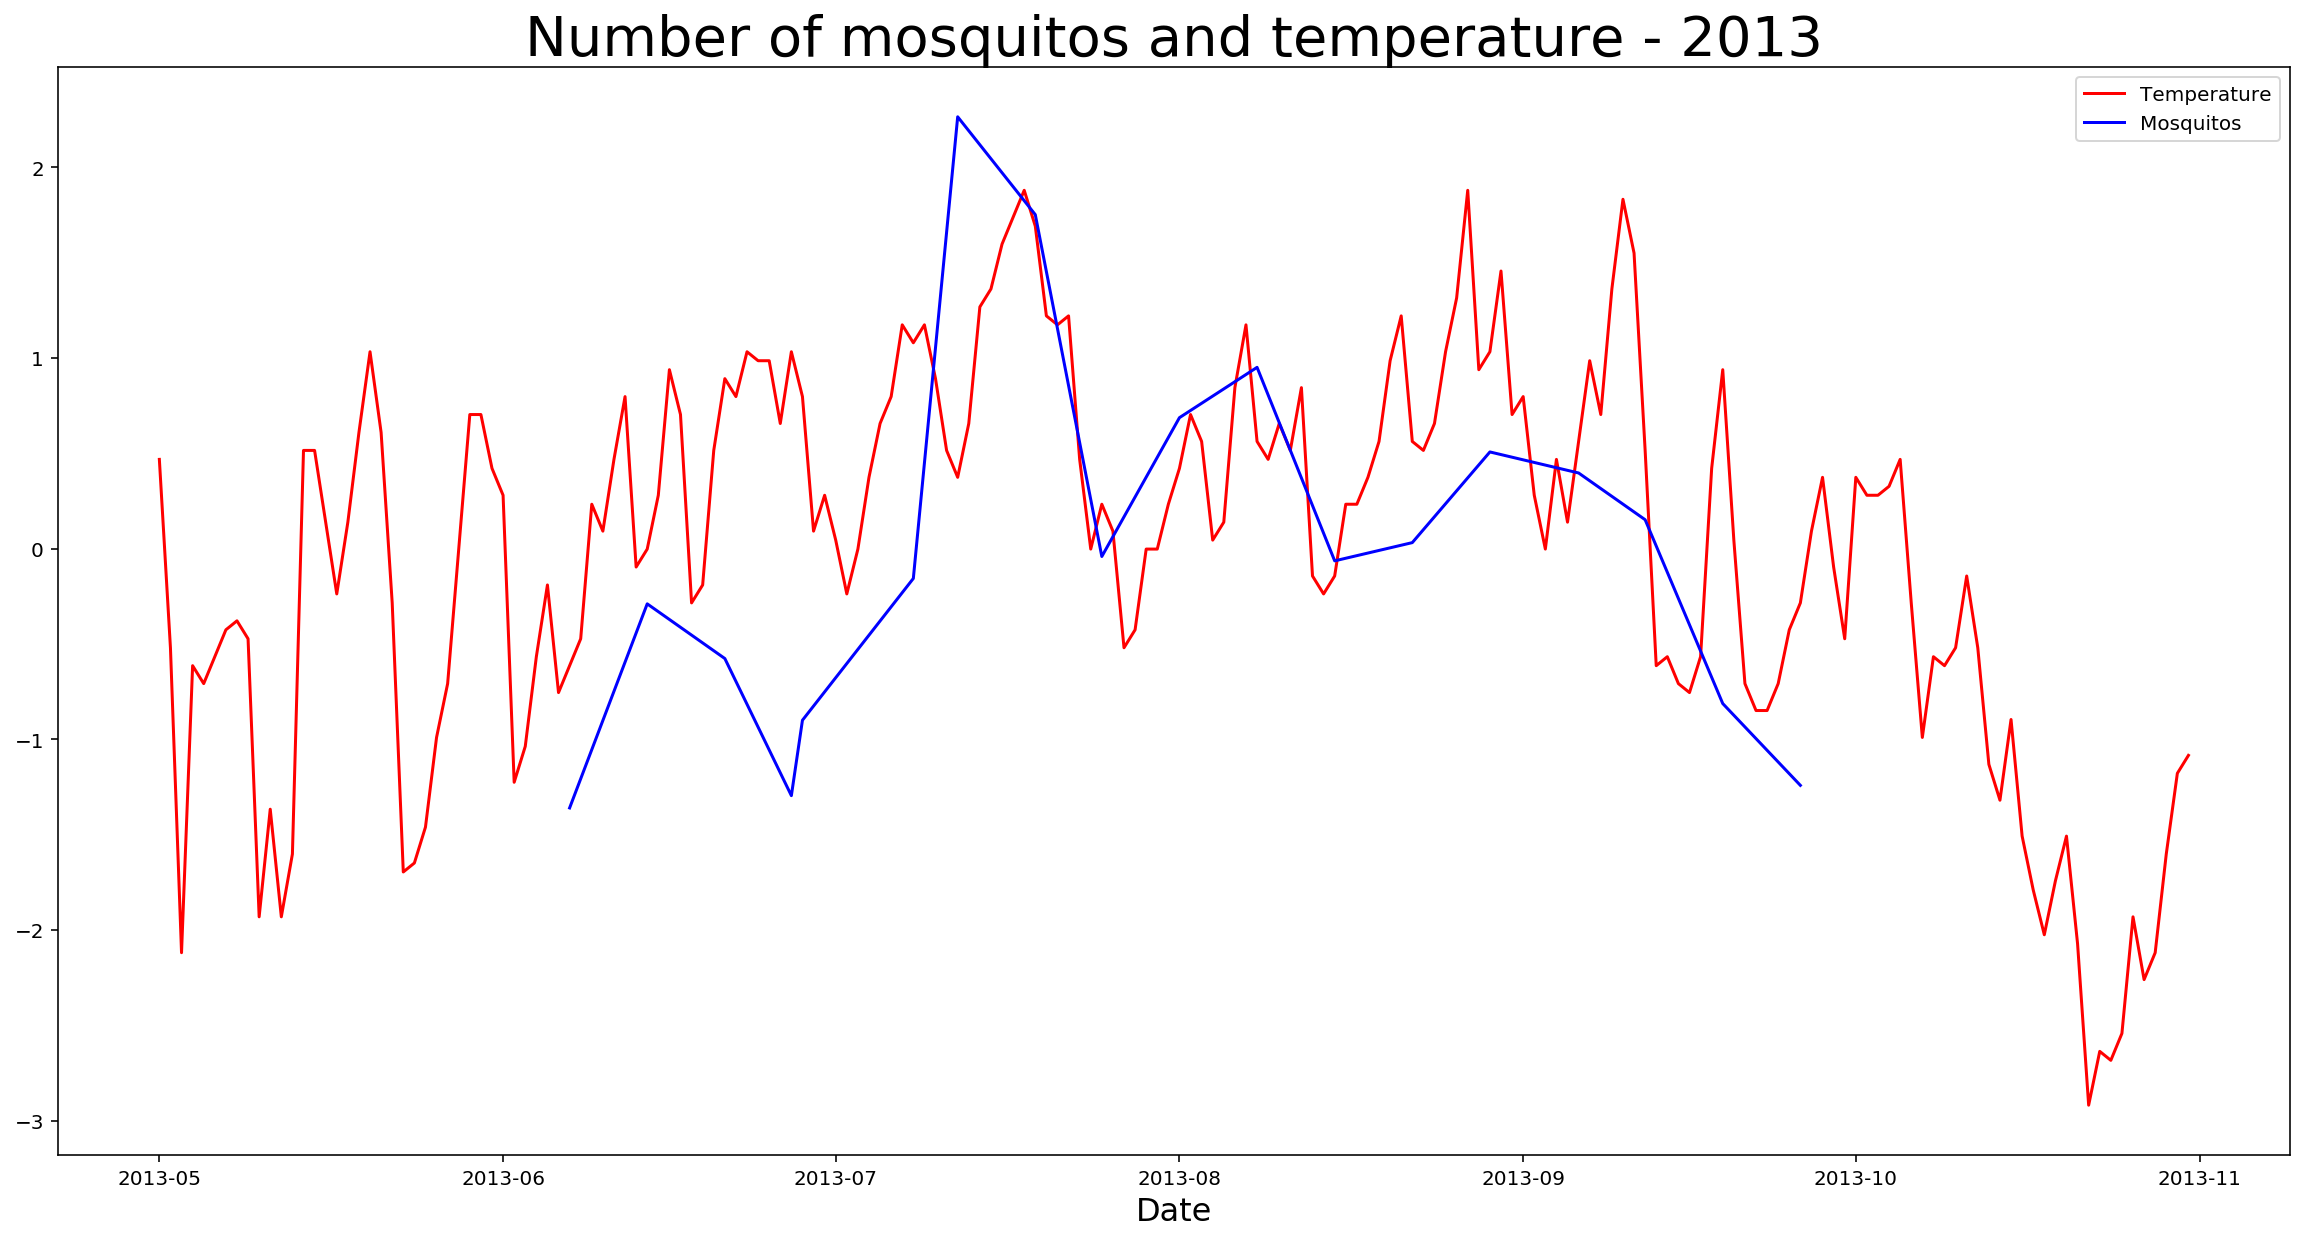

In [19]:
temp_mozzie([2007, 2009, 2011, 2013])

There is a correlation between number of mosquitos caught and temperatures for the most part. However, there is a pronounced dip in number of mosquitos caught in August-September 2011 that does not correspond to temperature patterns. Note that values have been standardized so they are on the same scale.

## Mosquitos and wetbulb

In [20]:
#function to plot wetbulb-mozzie 
def wetbulb_mozzie(year_list):
    for year in year_list:
        weather = df_weather[(df_weather['Date'] >= '{}-01-01'.format(year)) & (df_weather['Date'] <= '{}-12-31'.format(year))] #masking to collect data from that year
        mozzie = df_train[(df_train['Date'] > '{}-01-01'.format(year)) & (df_train['Date'] <= '{}-12-31'.format(year))].groupby('Date').sum() #masking to collect data from that year
        mozzie = mozzie.reset_index() #to create date column from index
        mozzie['Date'] = pd.to_datetime(mozzie['Date']) #change to datetime format
        mozzie['Date'].dtypes

        plt.figure(figsize=(20,10))
        plt.plot(weather['Date'], (weather['WetBulb']-weather['WetBulb'].mean())/weather['WetBulb'].std(), c='red') #plot for standardized wetbulb
        plt.plot(mozzie['Date'], (mozzie['NumMosquitos']-mozzie['NumMosquitos'].mean())/mozzie['NumMosquitos'].std(), c='blue') #plot for standardized num of mozzies
        plt.xlabel('Date', fontsize=16)
        plt.title('Number of mosquitos and wetbulb - {}'.format(year), fontsize=28)
        plt.legend(['Wetbulb','Mosquitos'])

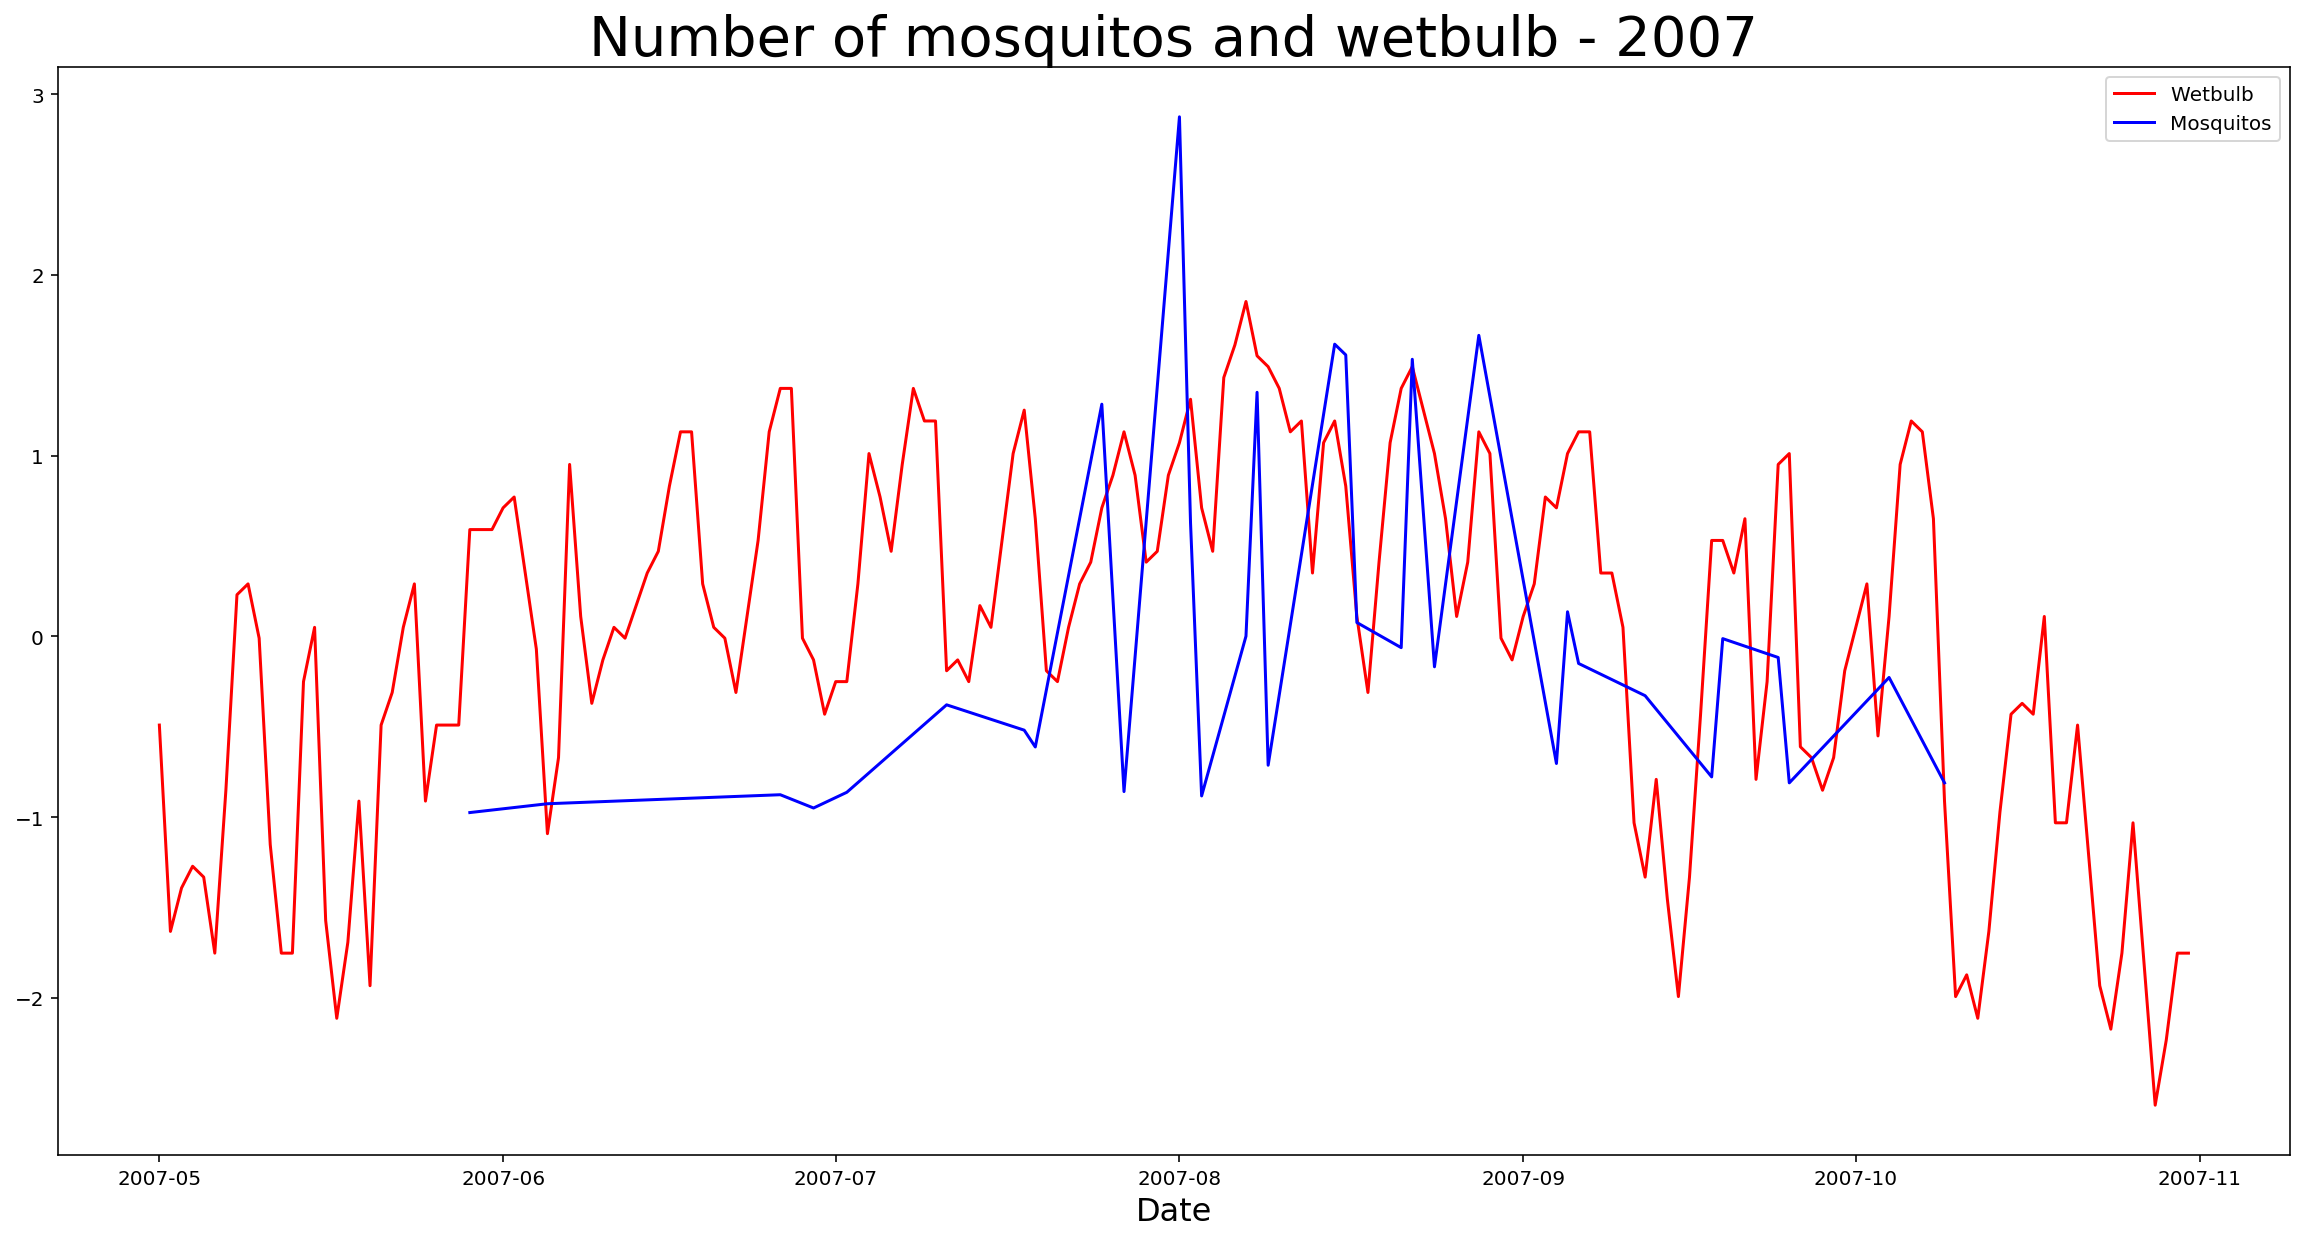

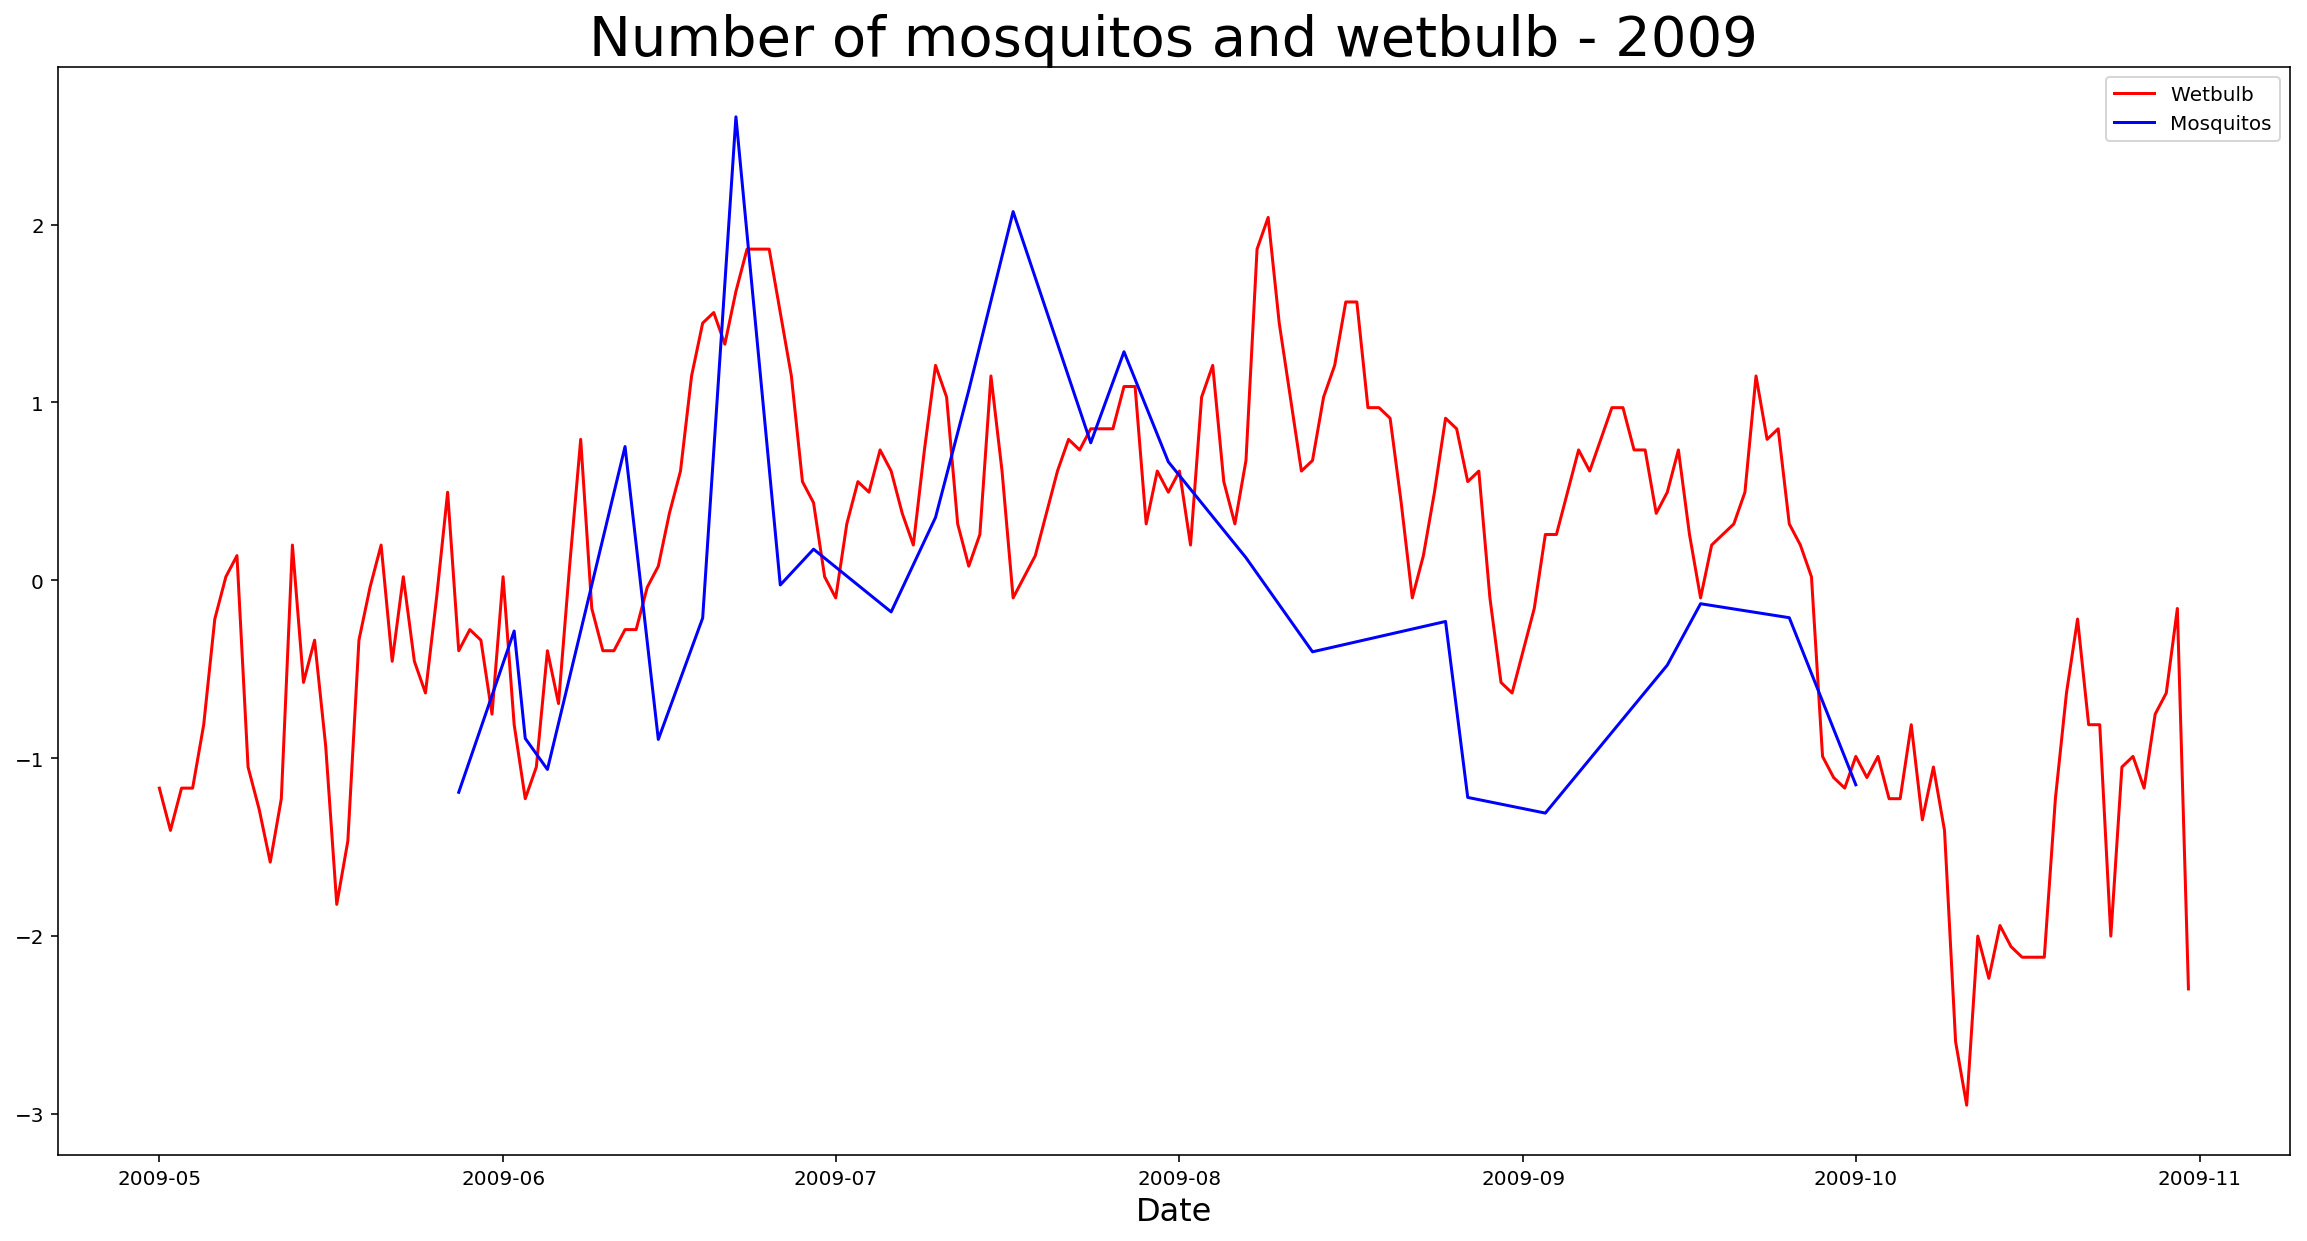

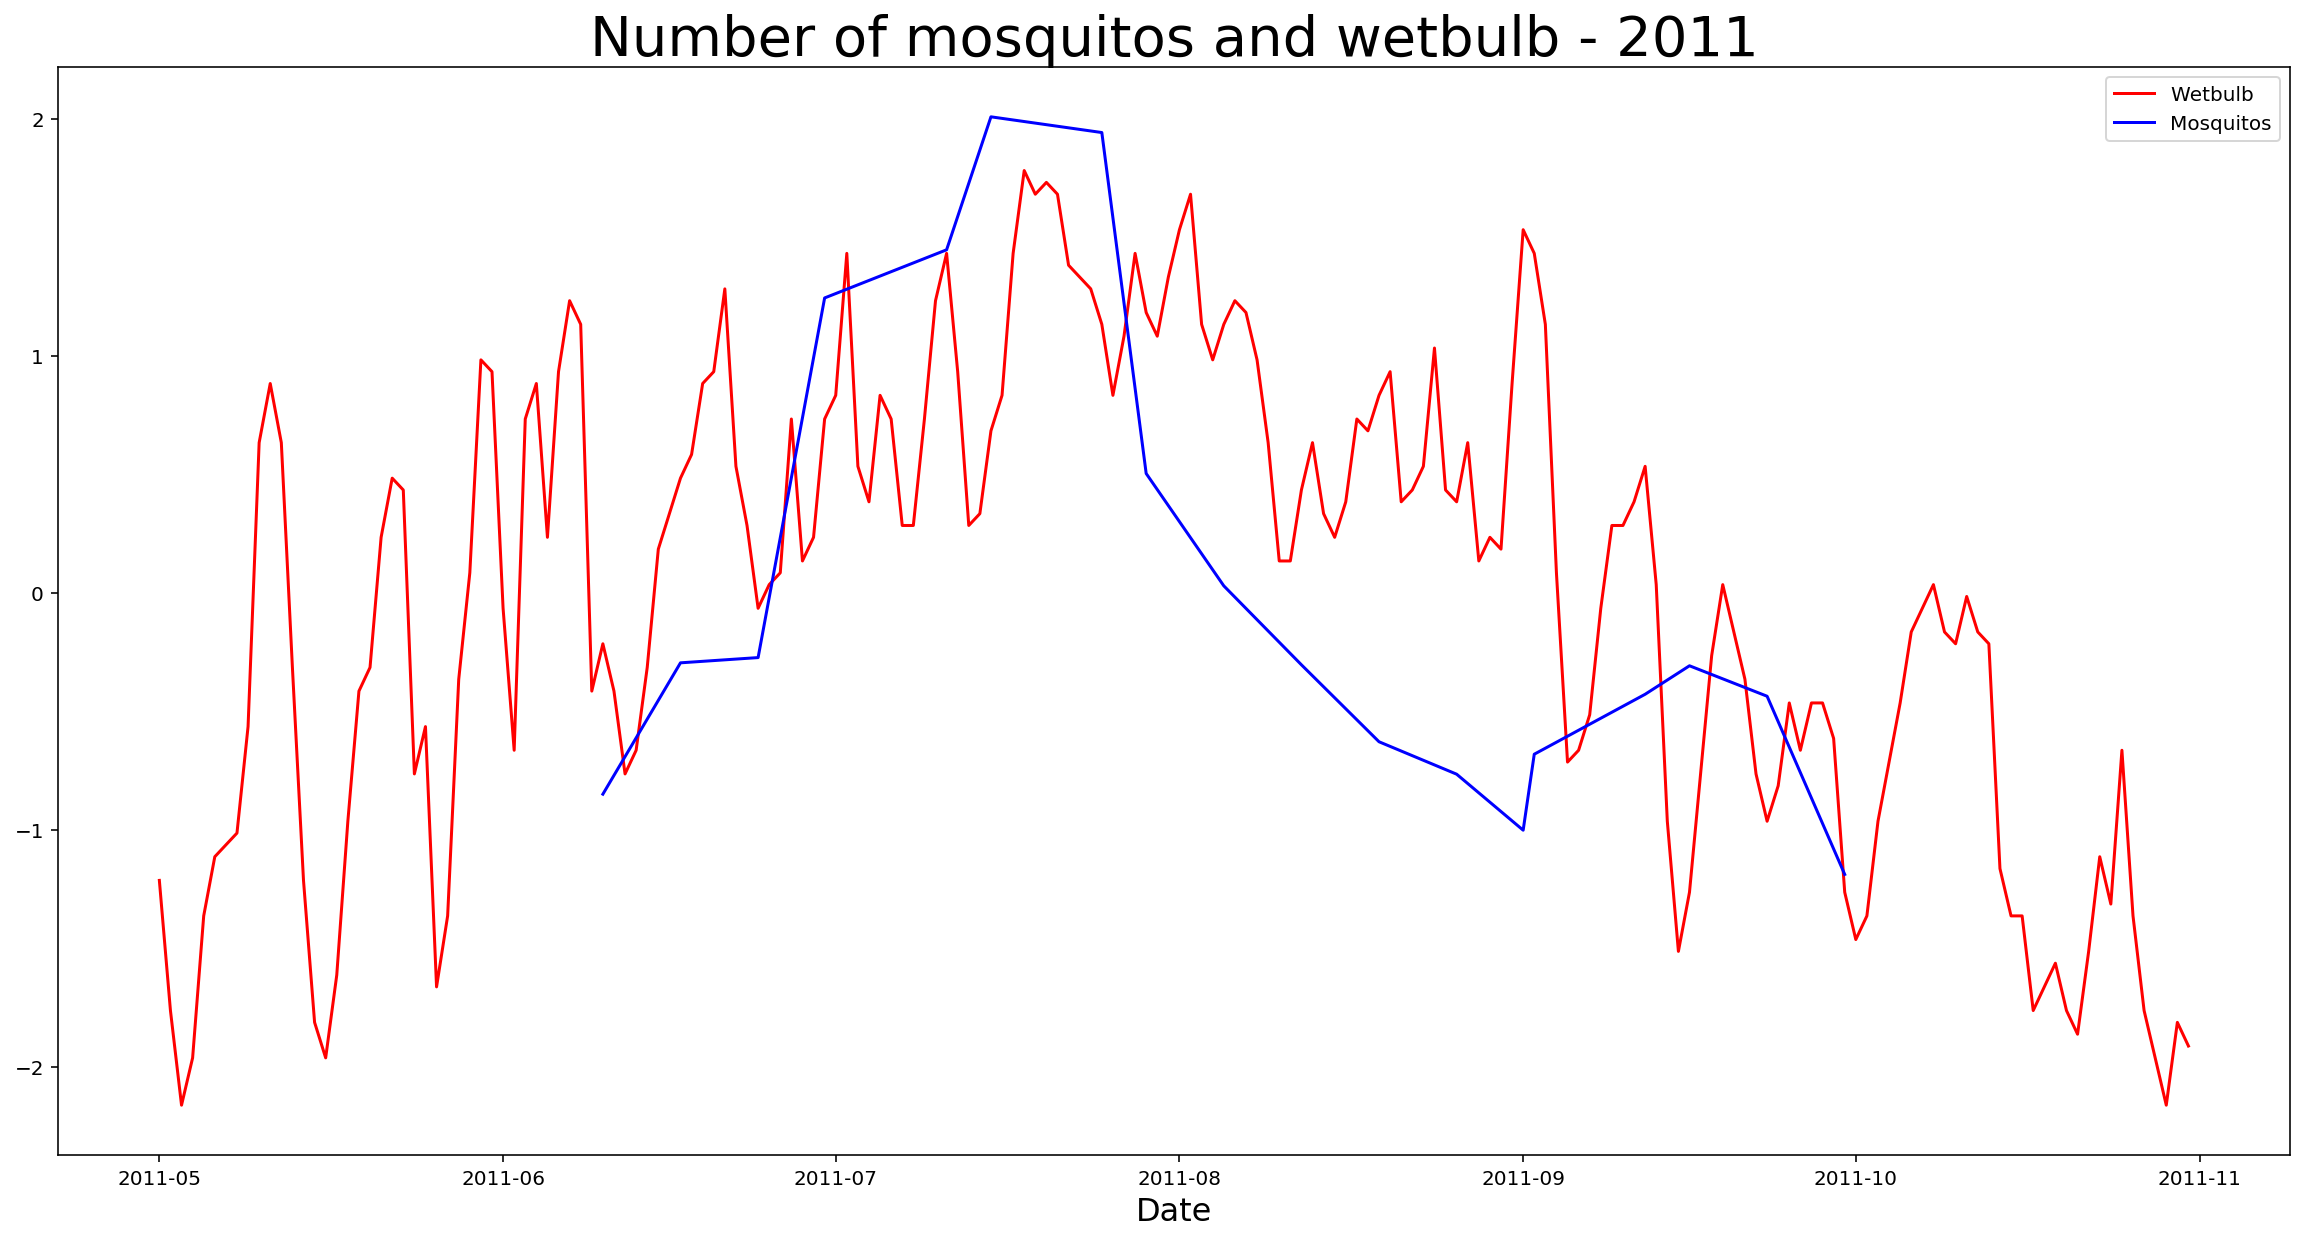

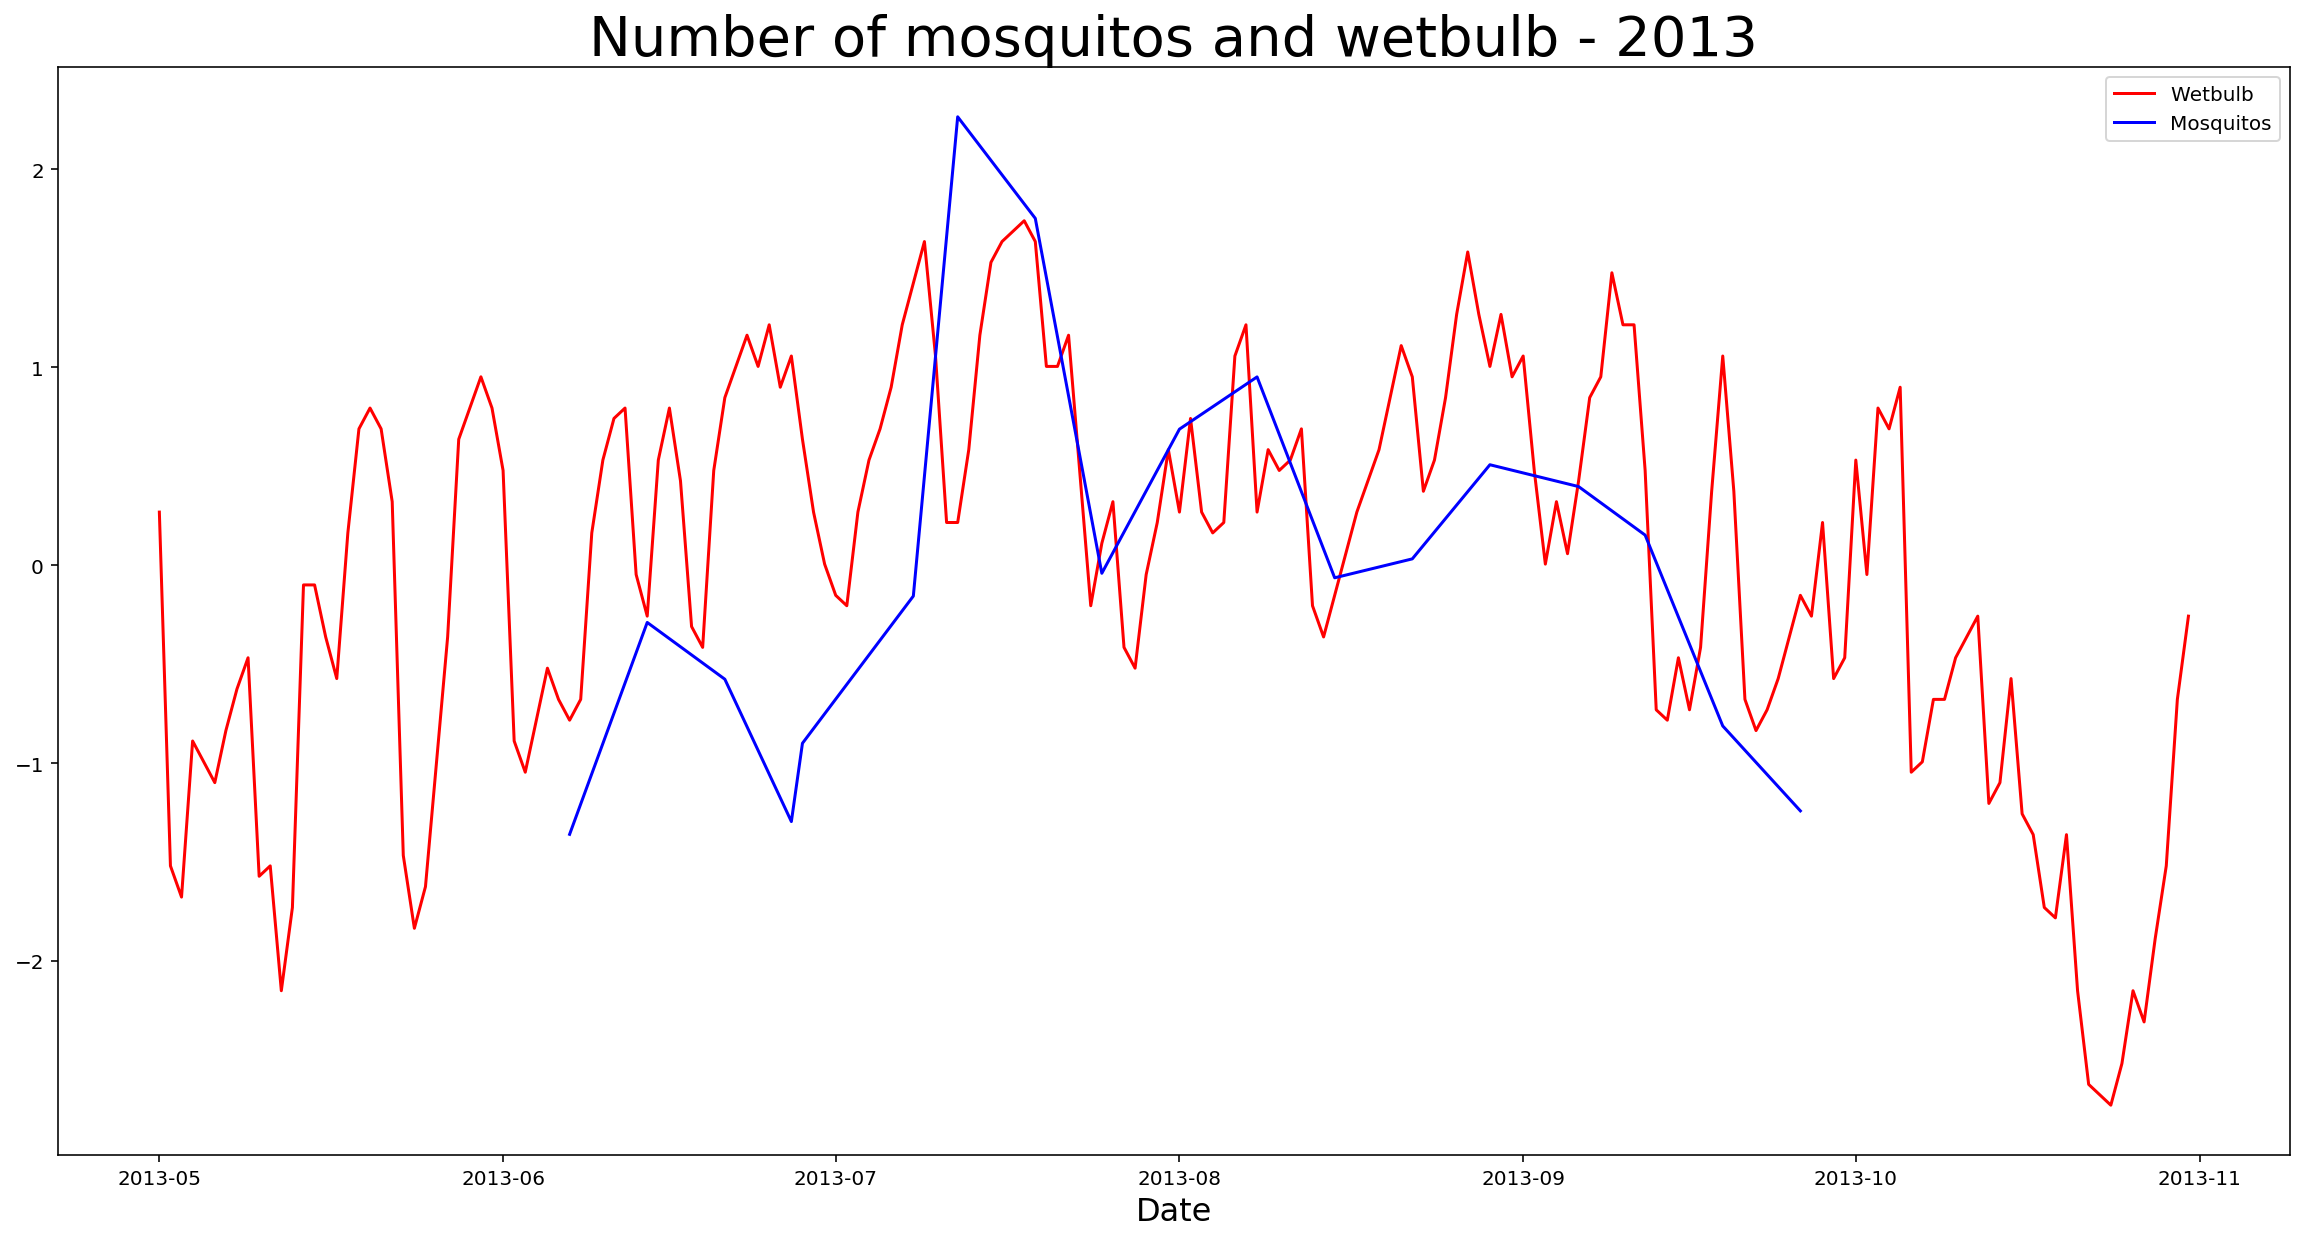

In [21]:
wetbulb_mozzie([2007, 2009, 2011, 2013])

Wetbulb values show similar relation to the number of mosquitos as temperature. Again, values have been standardized for comparison on the same scale.

## Mosquitos and dewpoint

In [22]:
#function to plot dewpoint-mozzie 
def dewpoint_mozzie(year_list):
    for year in year_list:
        weather = df_weather[(df_weather['Date'] >= '{}-01-01'.format(year)) & (df_weather['Date'] <= '{}-12-31'.format(year))] #masking to collect data from that year
        mozzie = df_train[(df_train['Date'] > '{}-01-01'.format(year)) & (df_train['Date'] <= '{}-12-31'.format(year))].groupby('Date').sum() #masking to collect data from that year
        mozzie = mozzie.reset_index() #to create date column from index
        mozzie['Date'] = pd.to_datetime(mozzie['Date']) #change to datetime format
        mozzie['Date'].dtypes

        plt.figure(figsize=(20,10))
        plt.plot(weather['Date'], (weather['DewPoint']-weather['DewPoint'].mean())/weather['DewPoint'].std(), c='red') #plot for standardized dewpoint
        plt.plot(mozzie['Date'], (mozzie['NumMosquitos']-mozzie['NumMosquitos'].mean())/mozzie['NumMosquitos'].std(), c='blue') #plot for standardized num of mozzies
        plt.xlabel('Date', fontsize=16)
        plt.title('Number of mosquitos and dewpoint - {}'.format(year), fontsize=28)
        plt.legend(['Dewpoint','Mosquitos'])

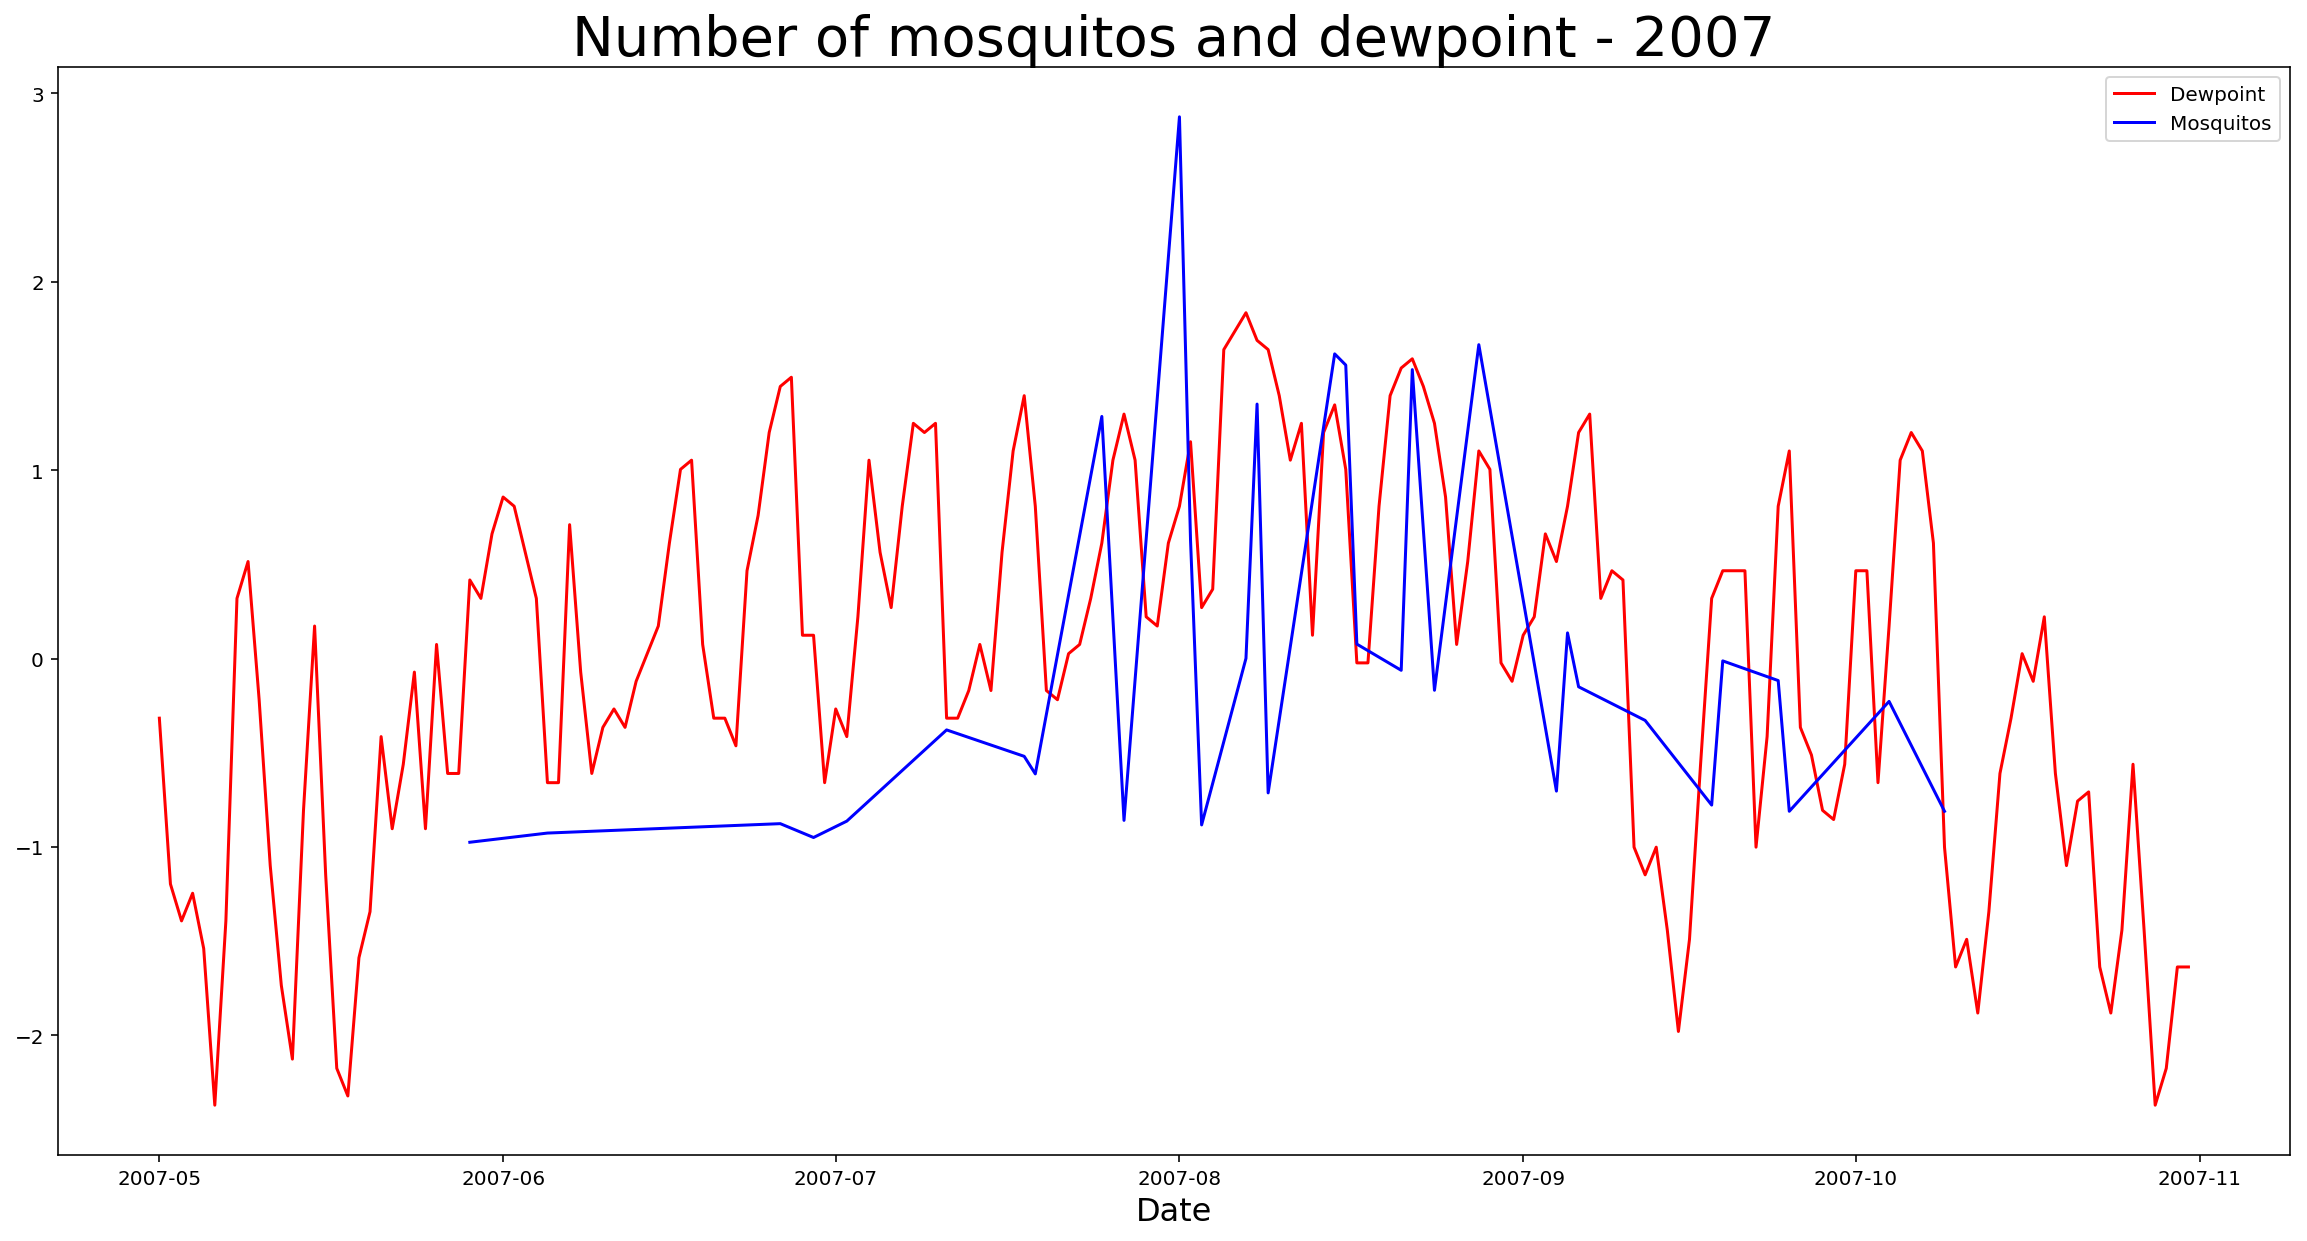

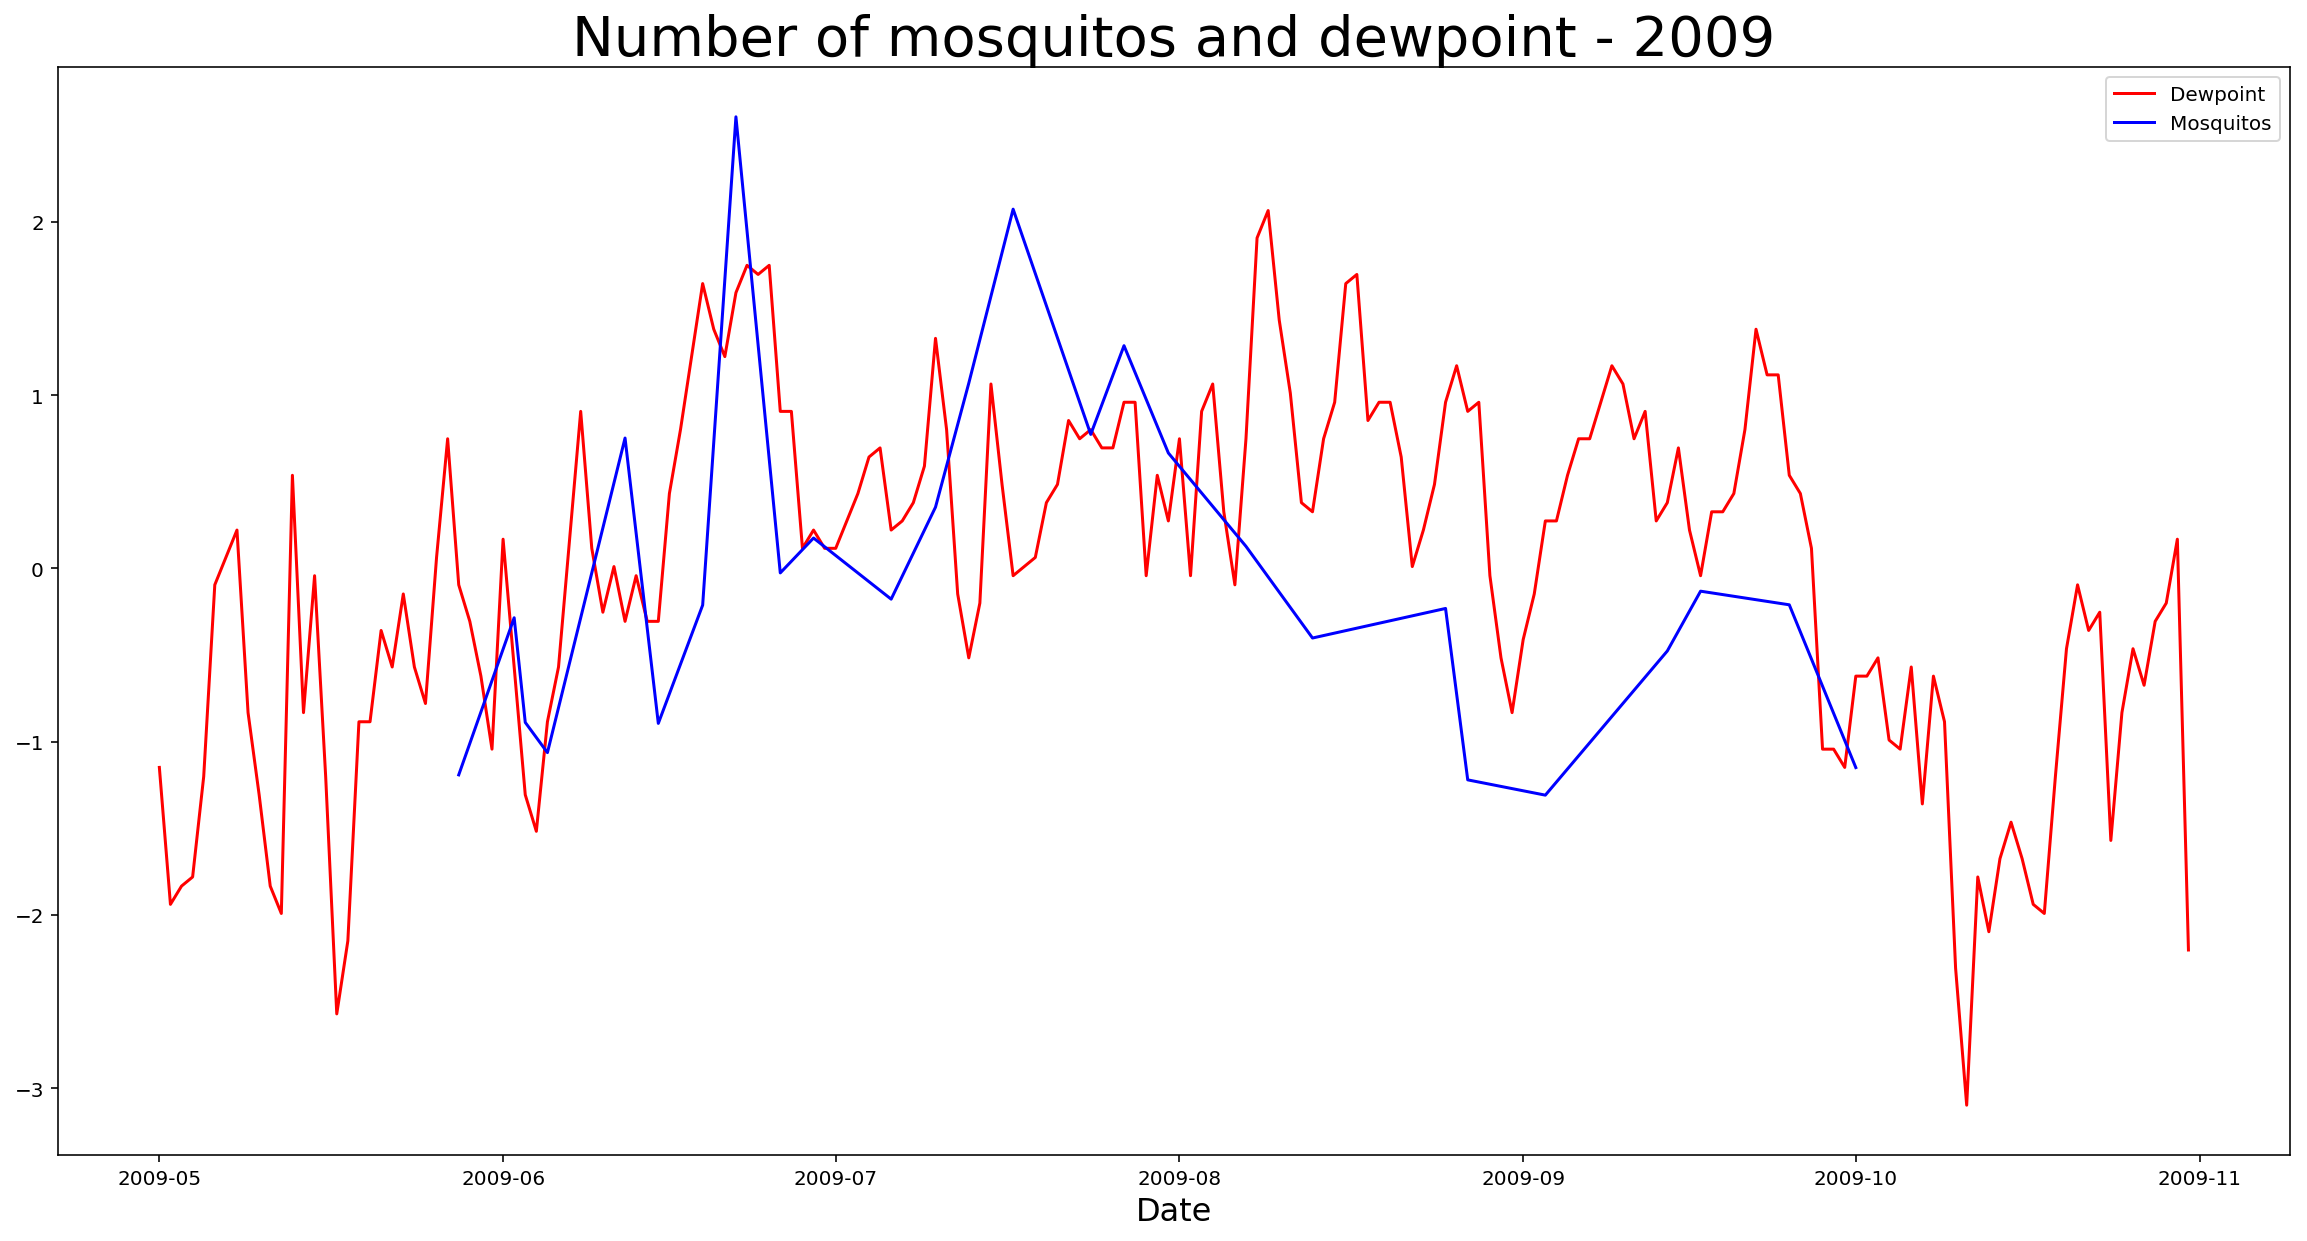

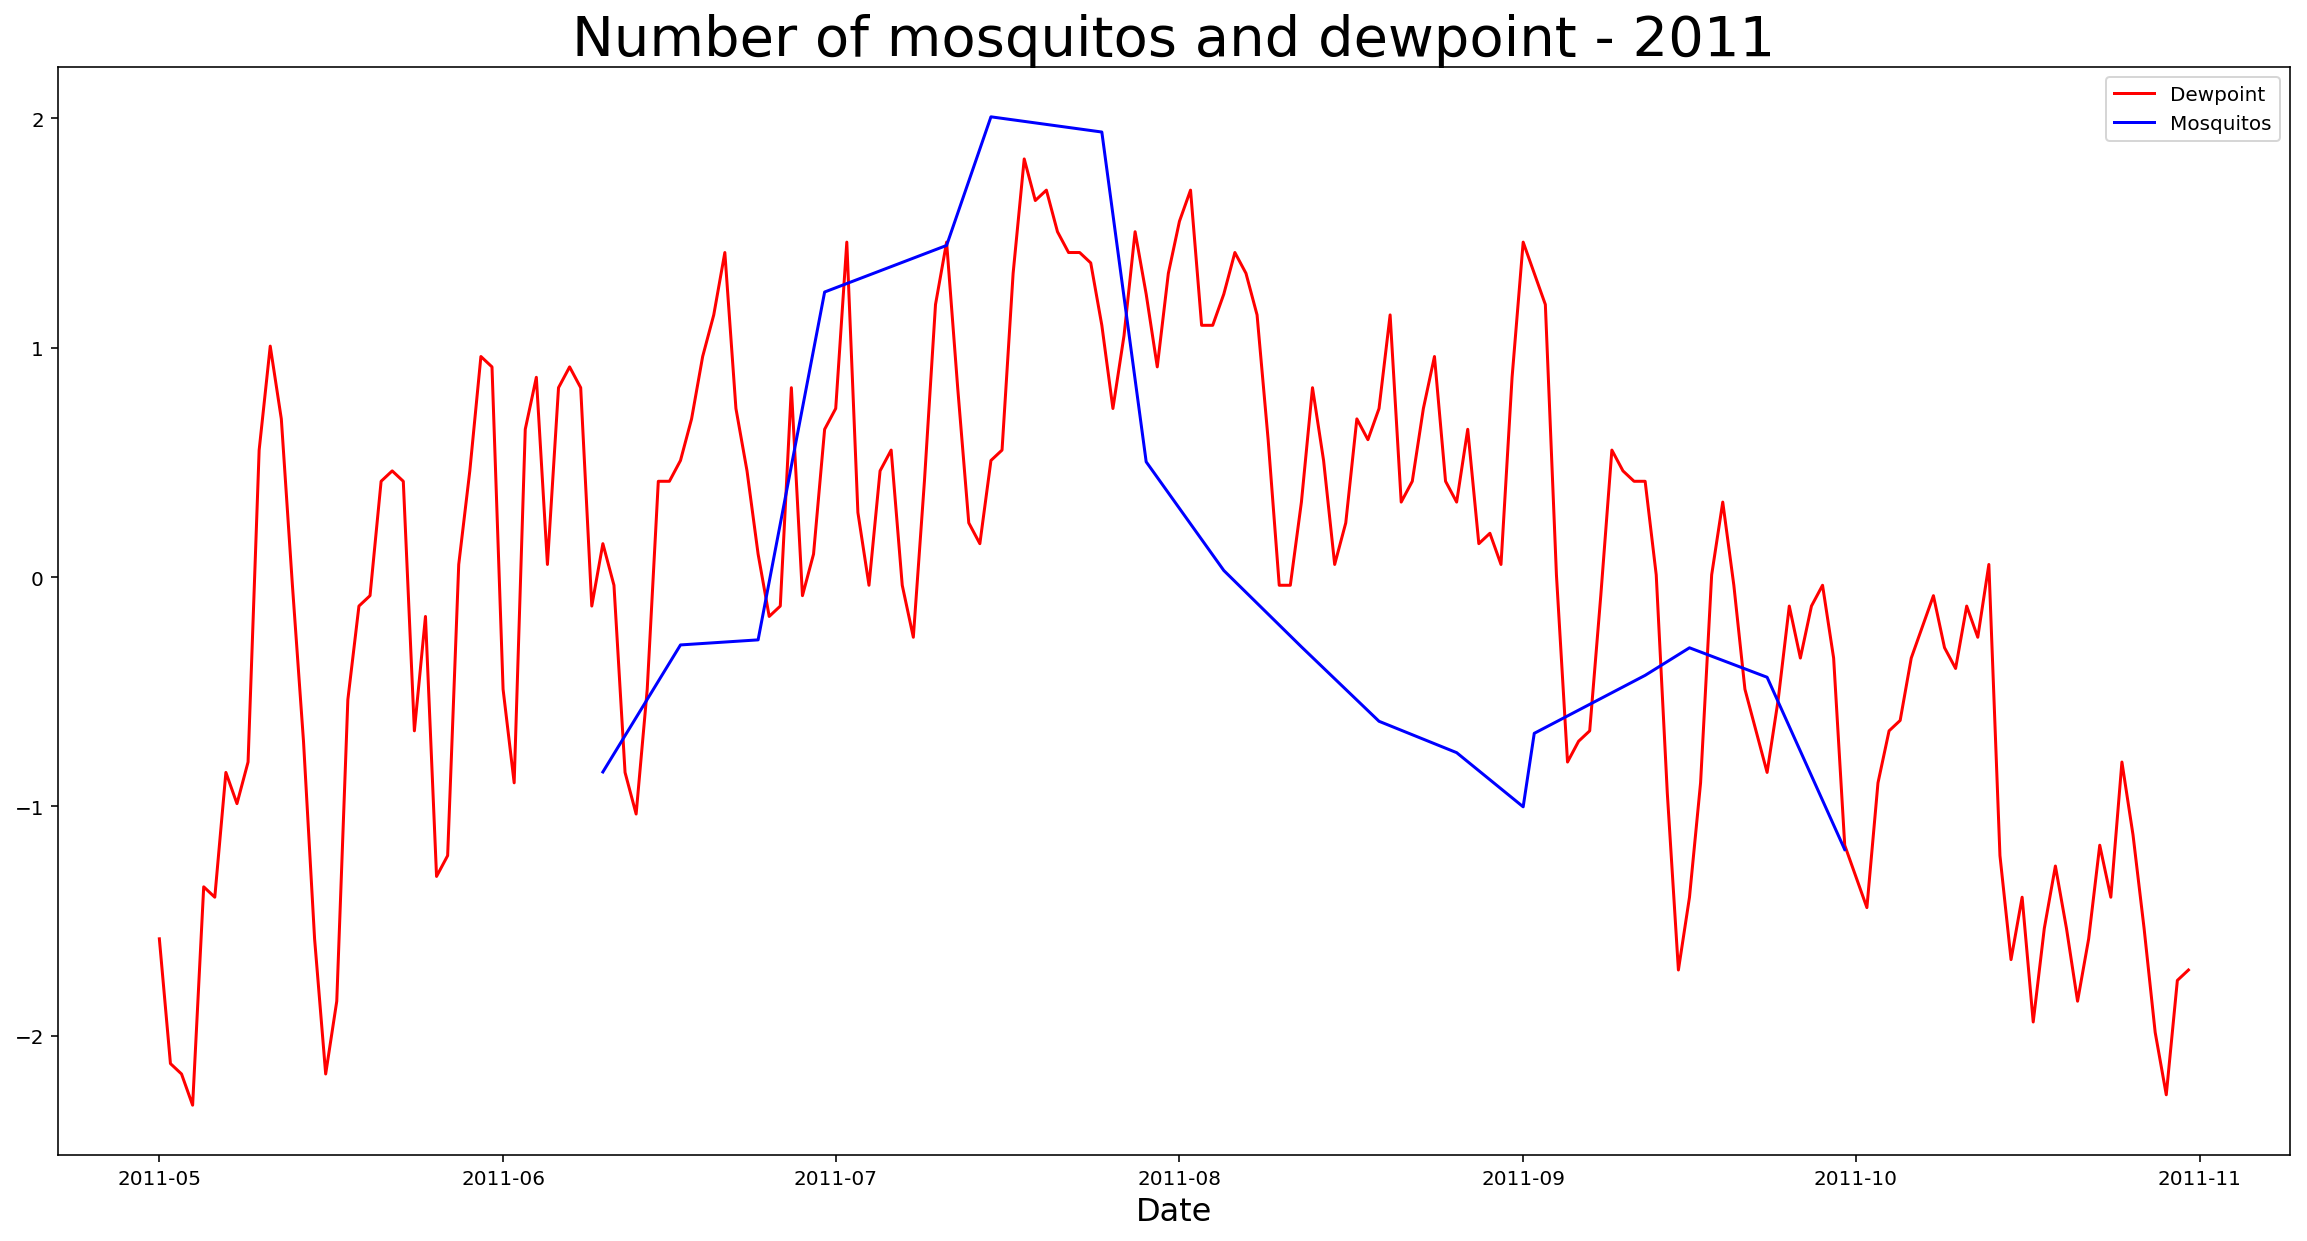

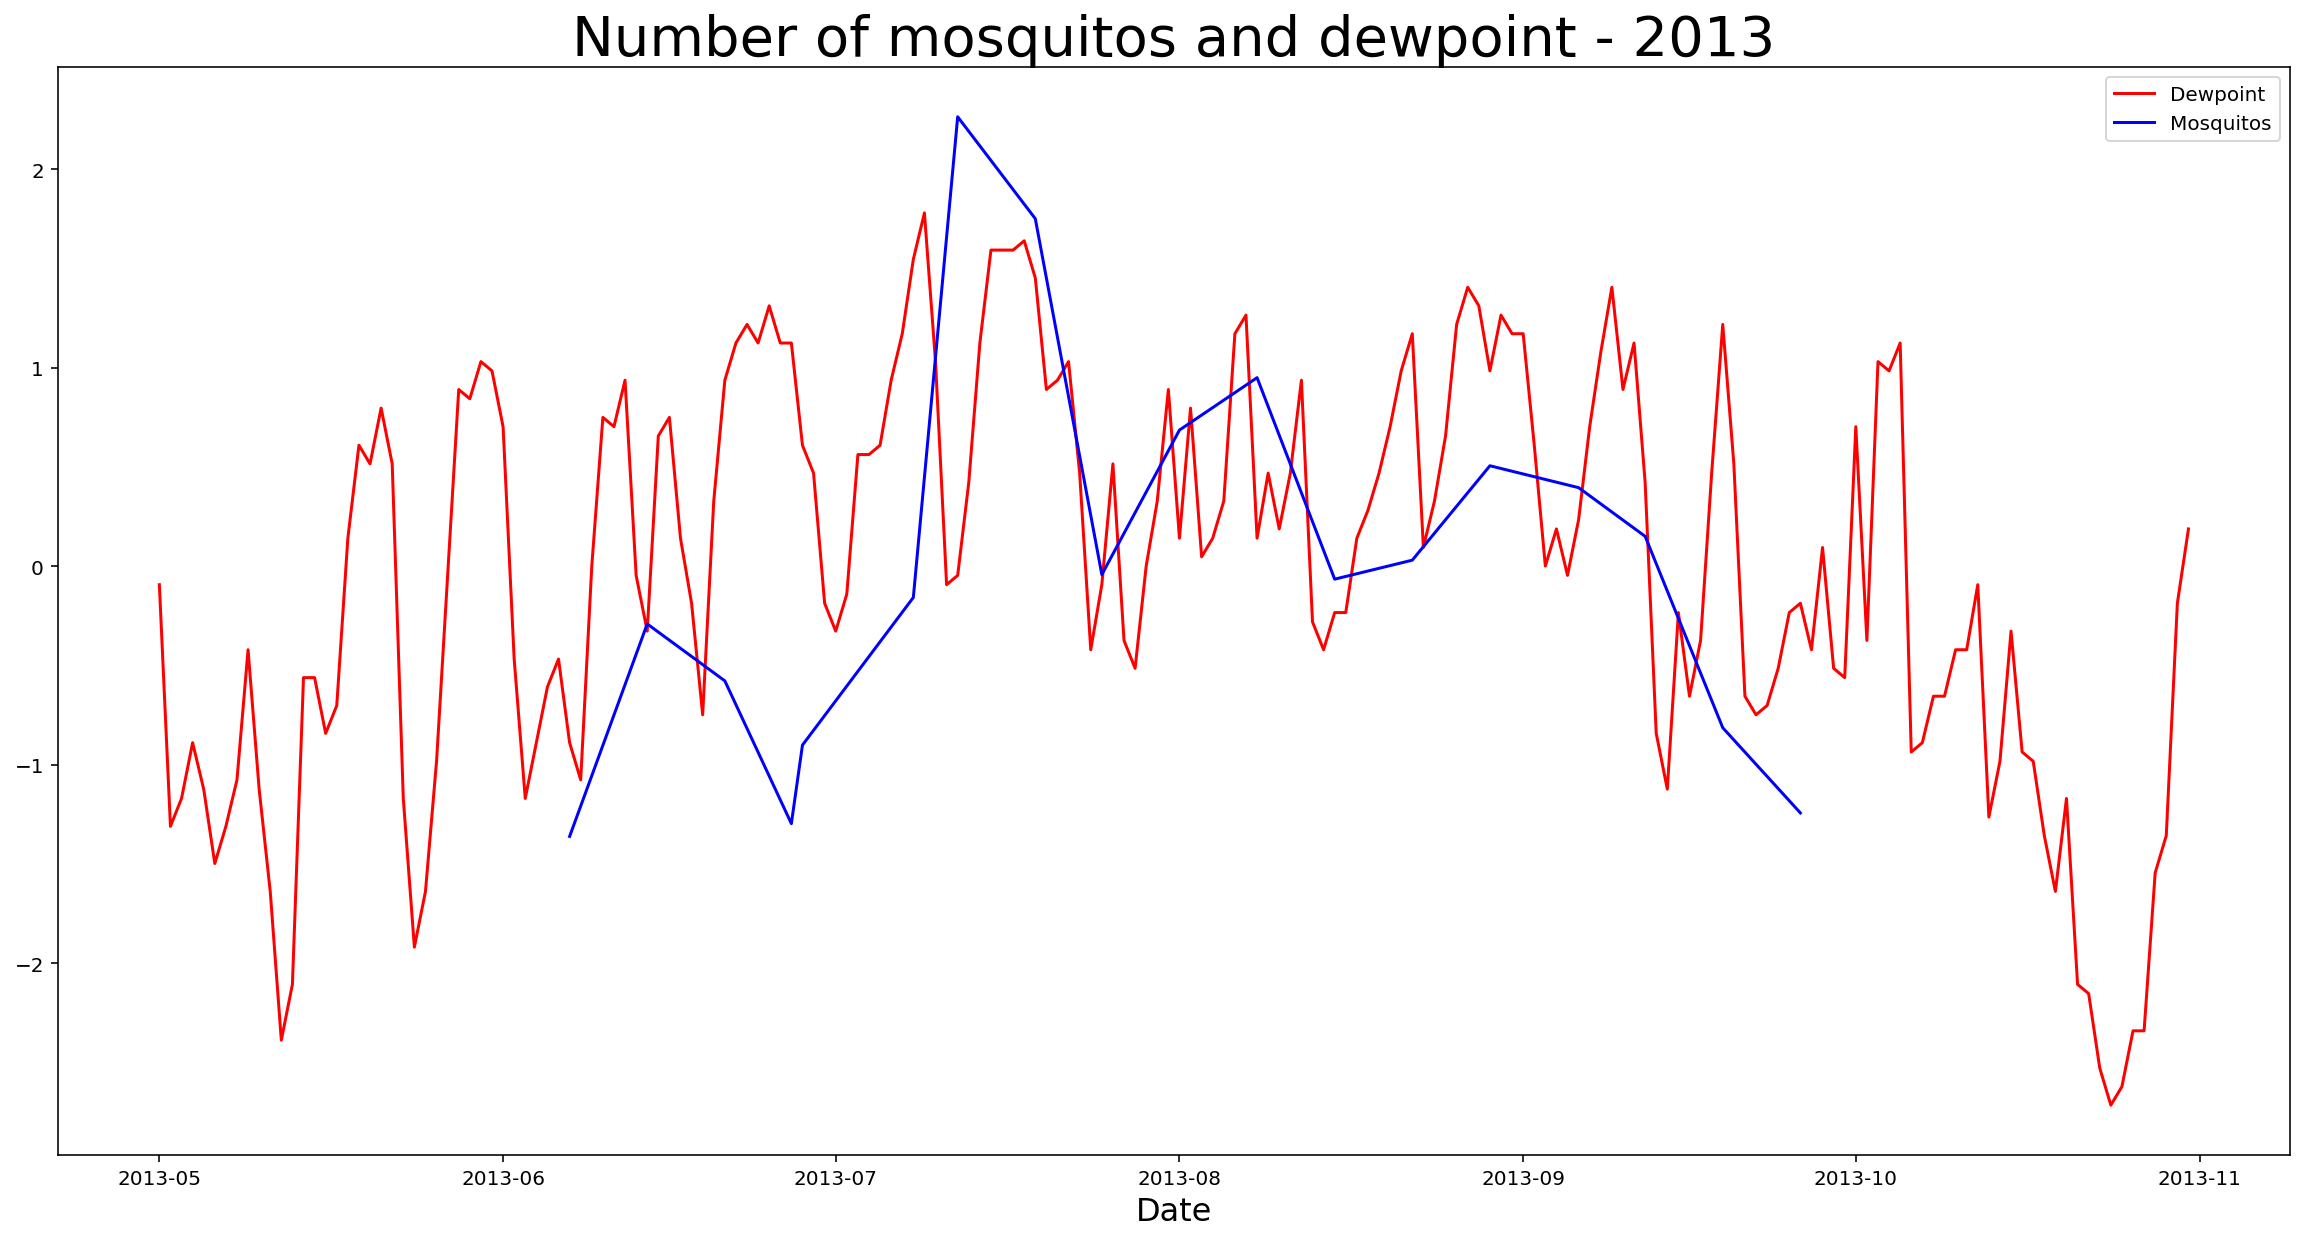

In [23]:
dewpoint_mozzie([2007, 2009, 2011, 2013])

There is no additional information to be gleaned from what the other weather features already tell us. 

## Mosquitos and precipitation

In [24]:
#function to plot precipitation-mozzie 
def precip_mozzie(year_list):
    for year in year_list:
        weather = df_weather[(df_weather['Date'] >= '{}-01-01'.format(year)) & (df_weather['Date'] <= '{}-12-31'.format(year))] #masking to collect data from that year
        mozzie = df_train[(df_train['Date'] > '{}-01-01'.format(year)) & (df_train['Date'] <= '{}-12-31'.format(year))].groupby('Date').sum() #masking to collect data from that year
        mozzie = mozzie.reset_index() #to create date column from index
        mozzie['Date'] = pd.to_datetime(mozzie['Date']) #change to datetime format
        mozzie['Date'].dtypes

        plt.figure(figsize=(20,10))
        plt.plot(weather['Date'], (weather['PrecipTotal']-weather['PrecipTotal'].mean())/weather['PrecipTotal'].std(), c='red') #plot for standardized PrecipTotal
        plt.plot(mozzie['Date'], (mozzie['NumMosquitos']-mozzie['NumMosquitos'].mean())/mozzie['NumMosquitos'].std(), c='blue') #plot for standardized num of mozzies
        plt.xlabel('Date', fontsize=16)
        plt.title('Number of mosquitos and precipitation - {}'.format(year), fontsize=28)
        plt.legend(['Precipitation','Mosquitos'])

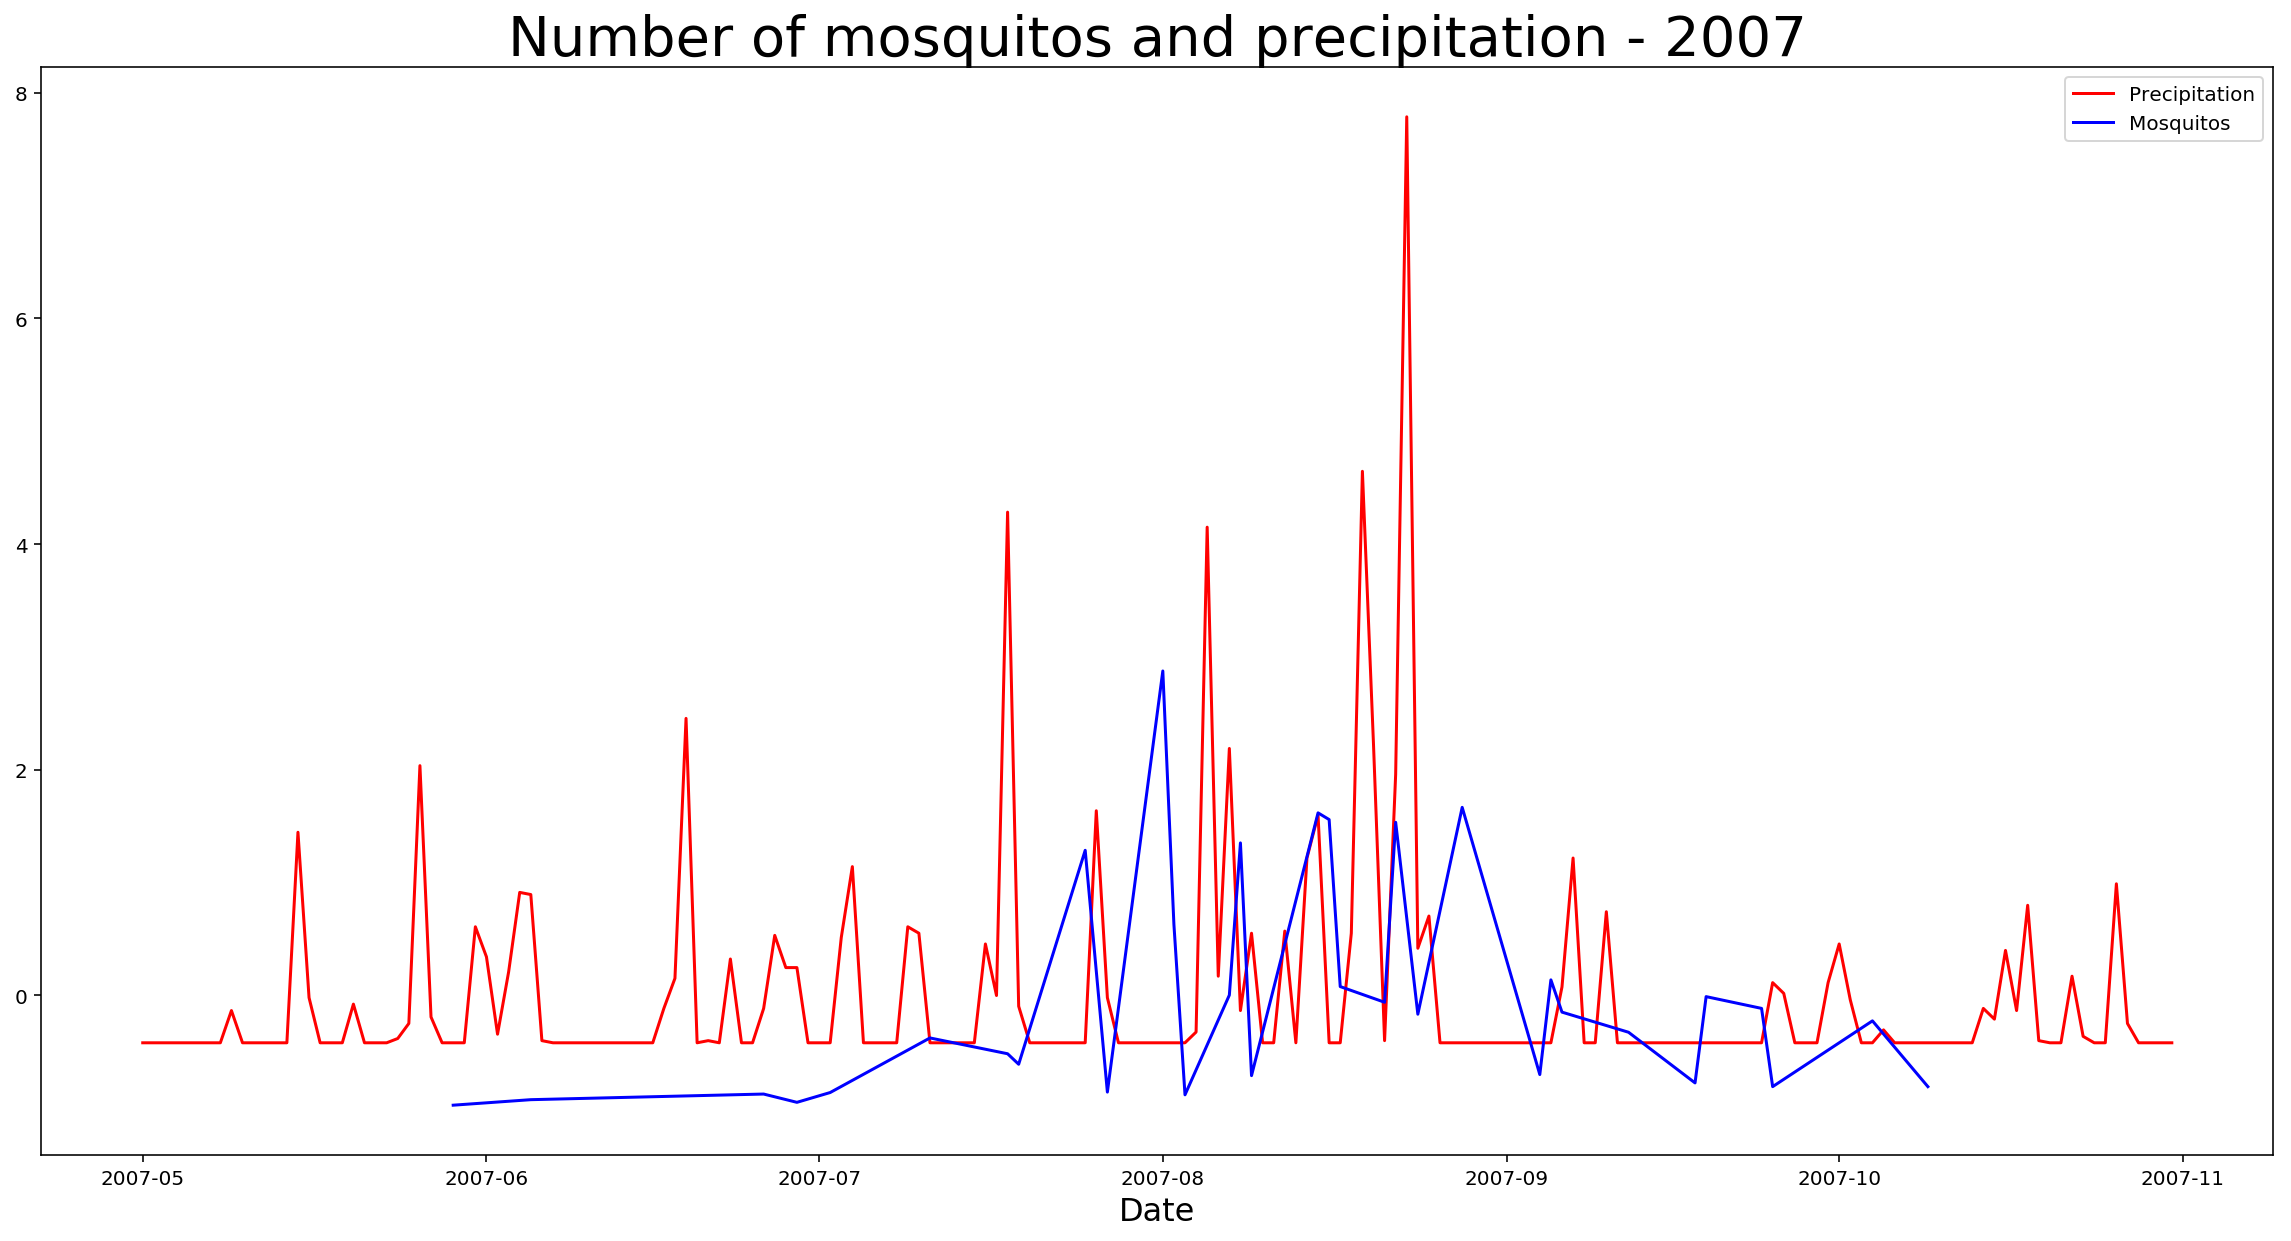

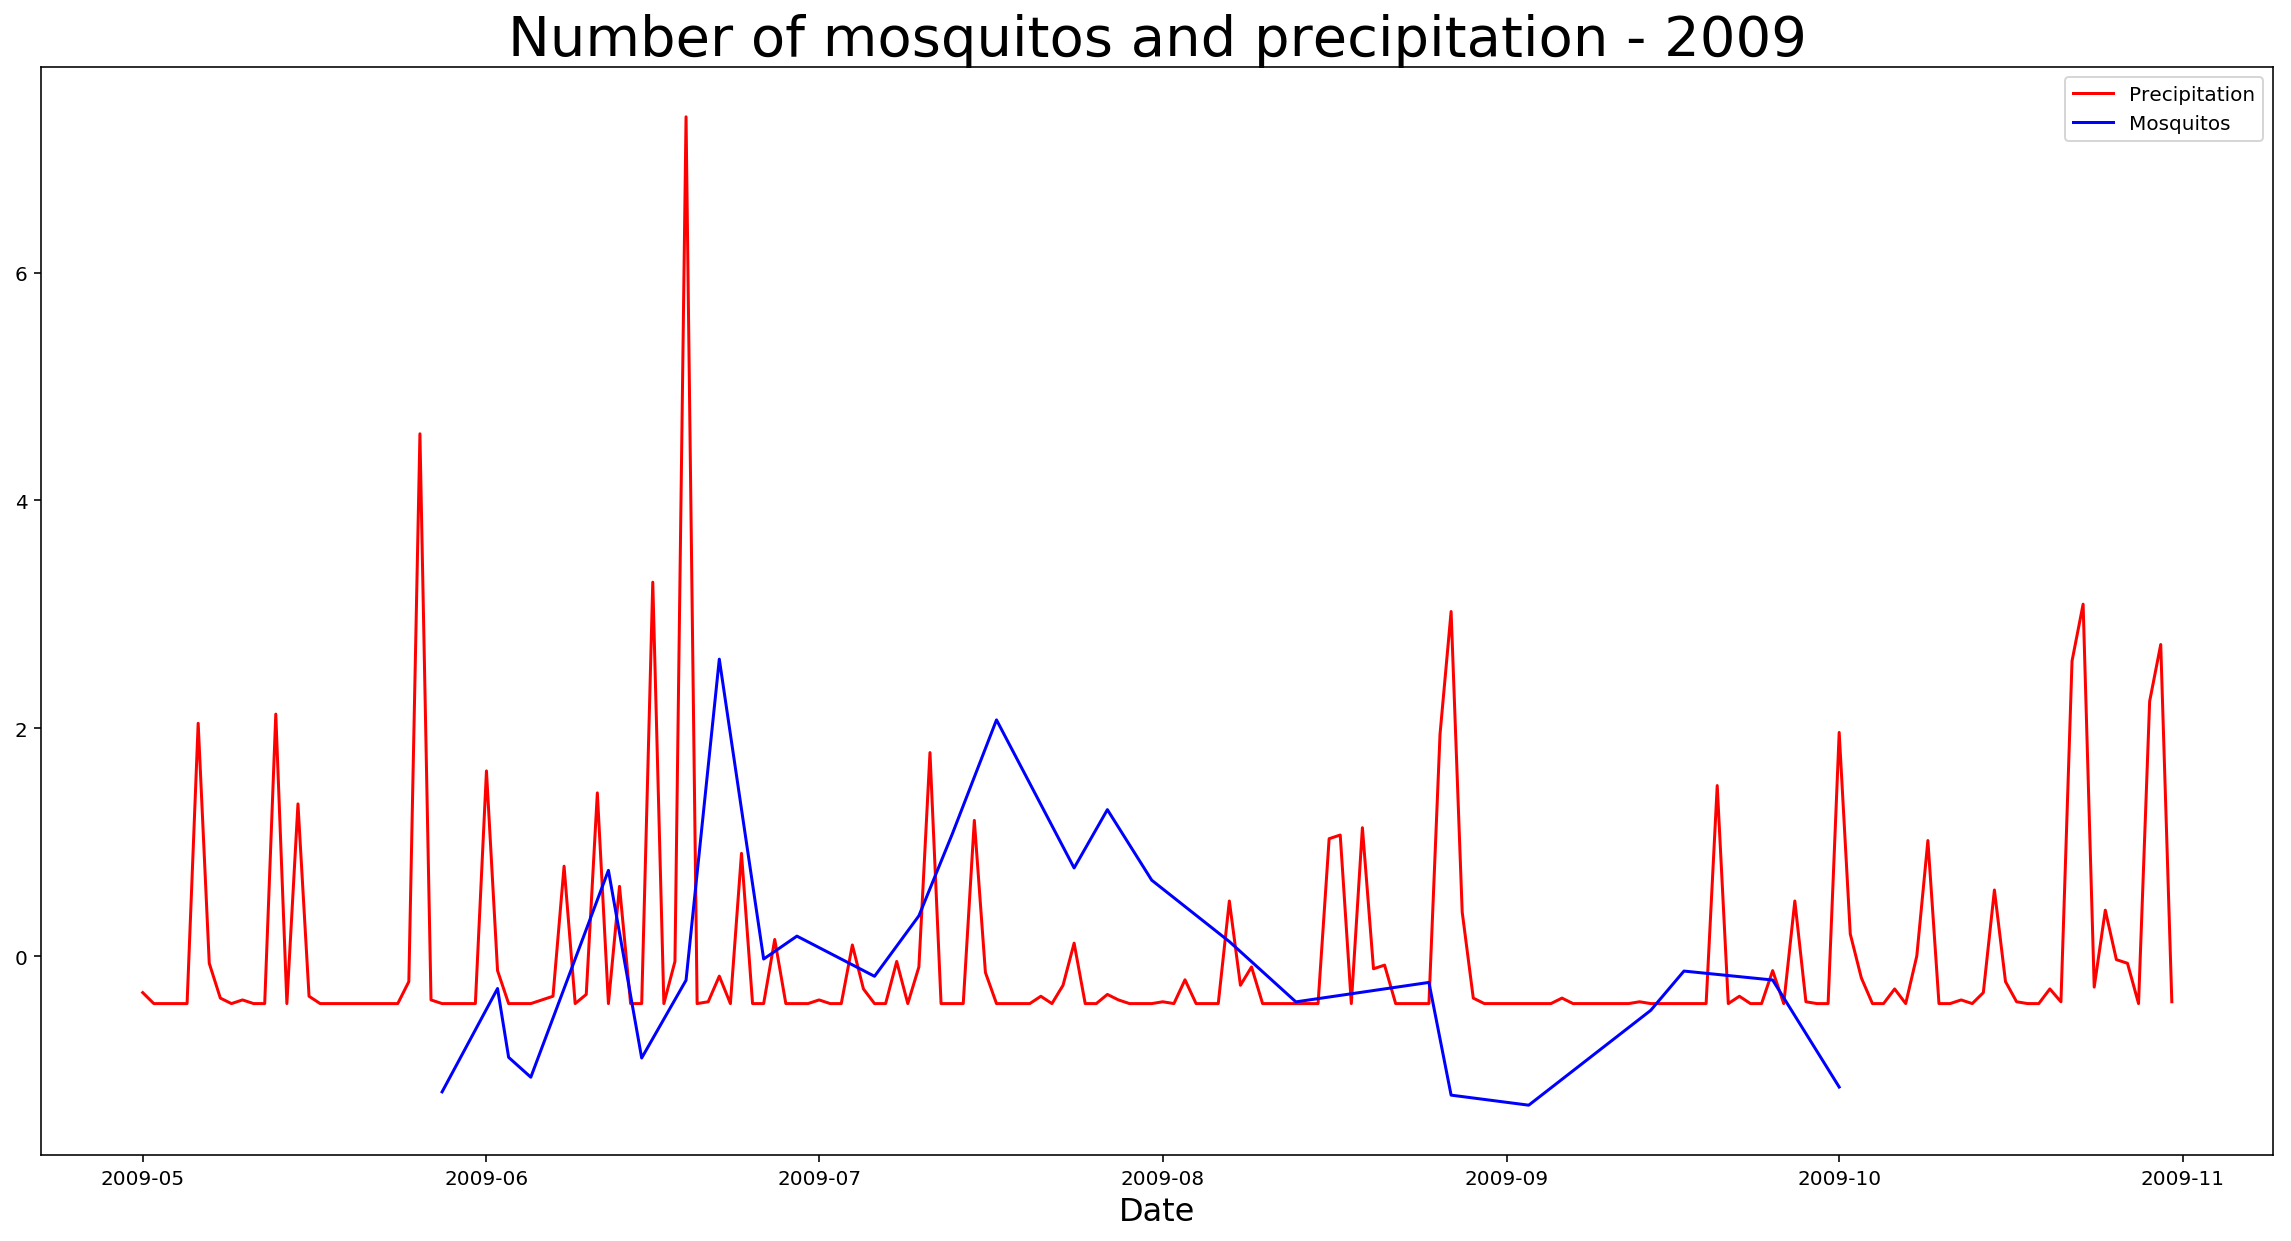

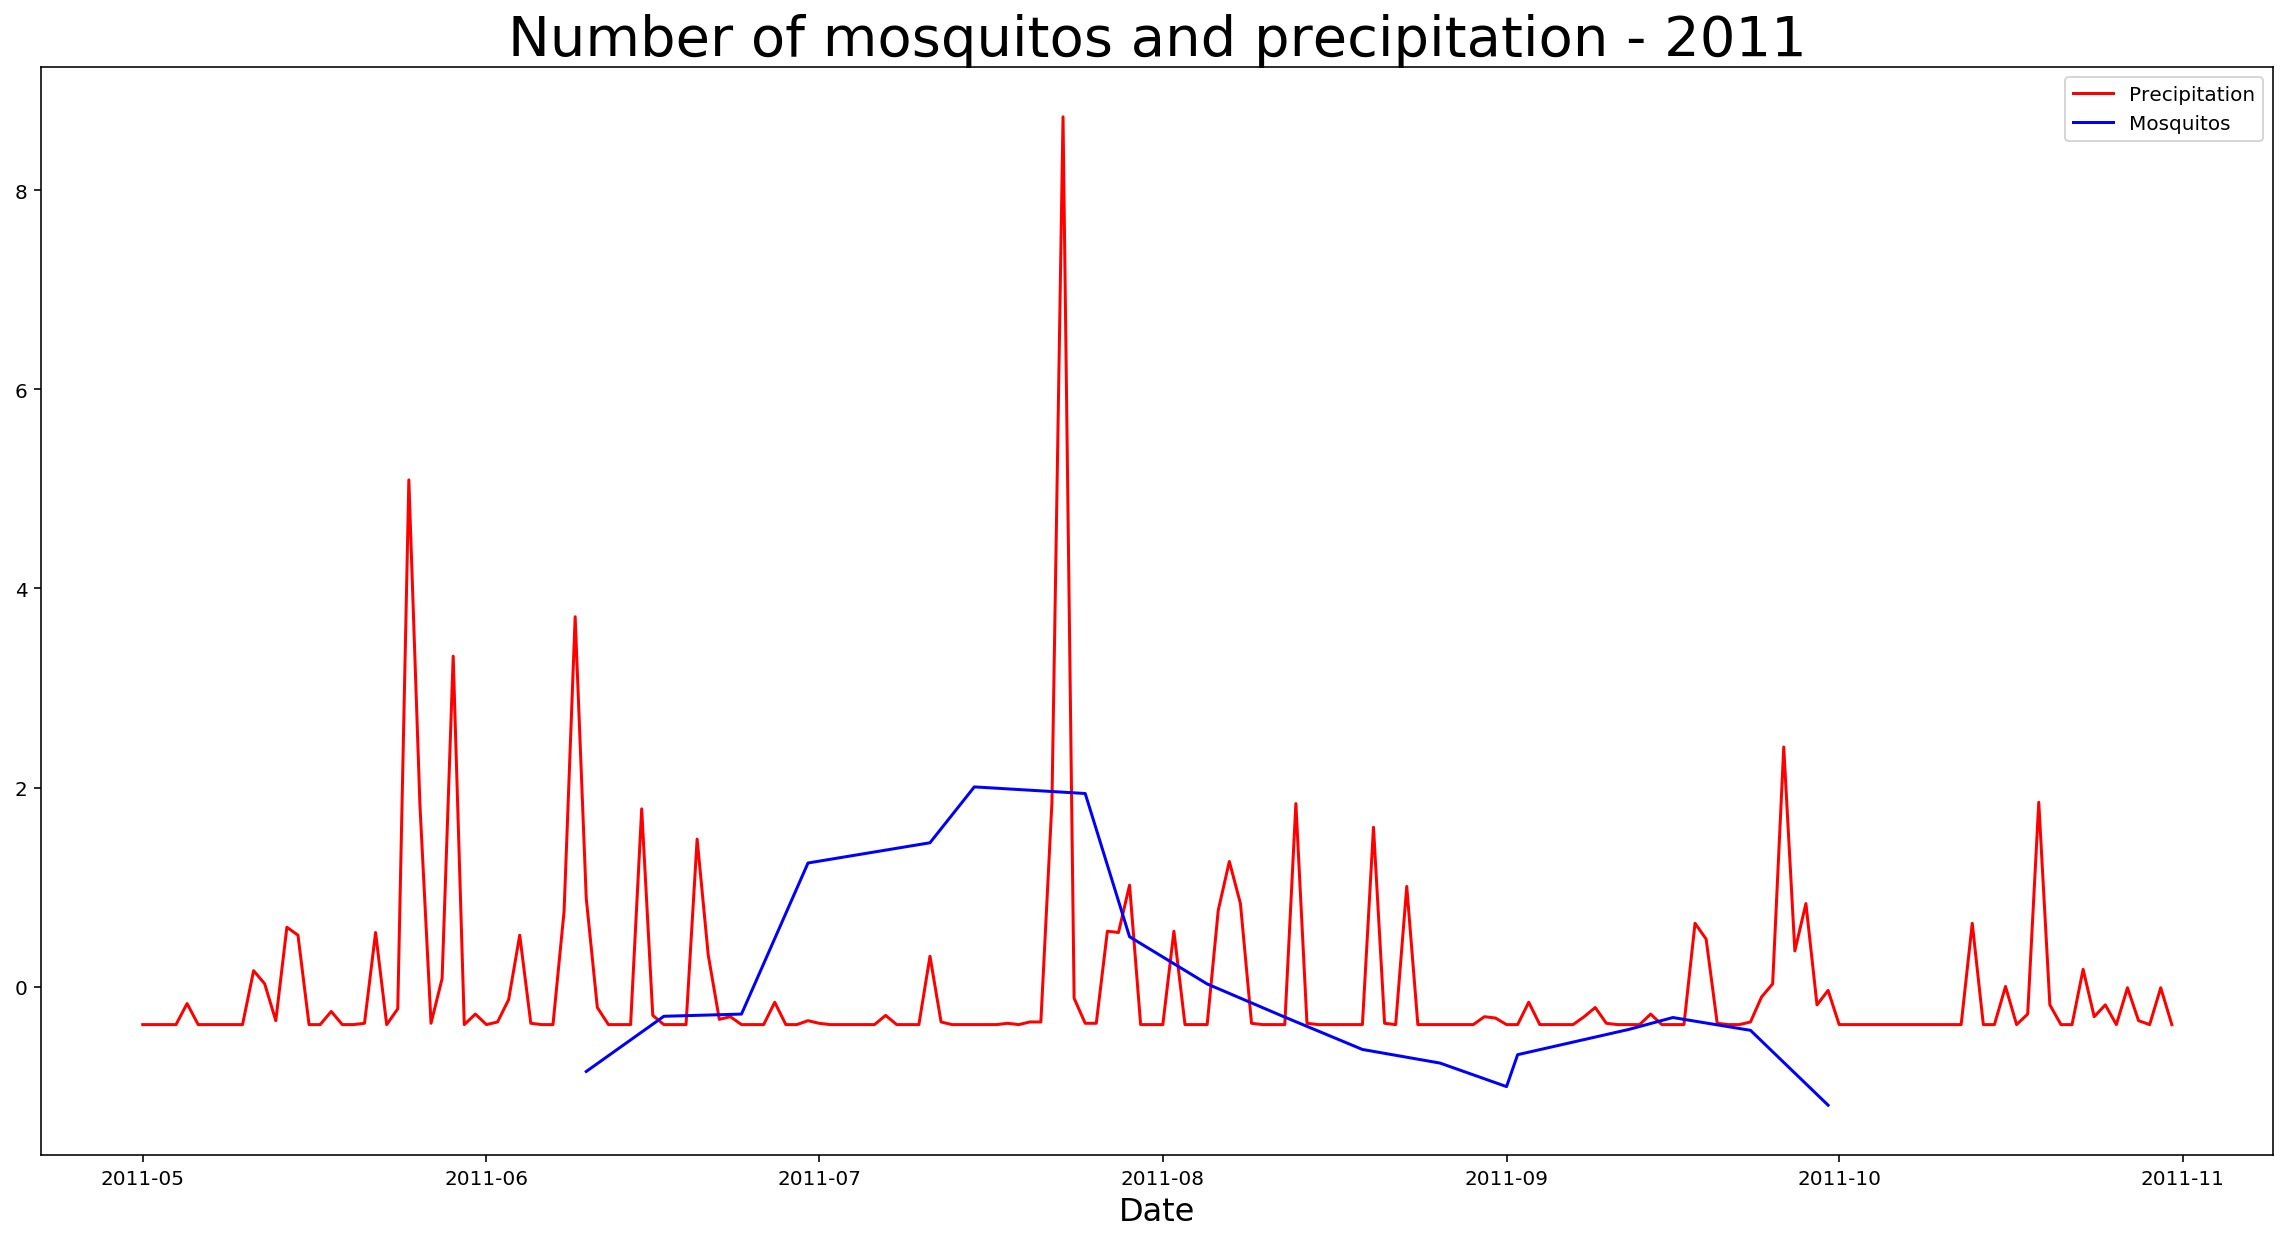

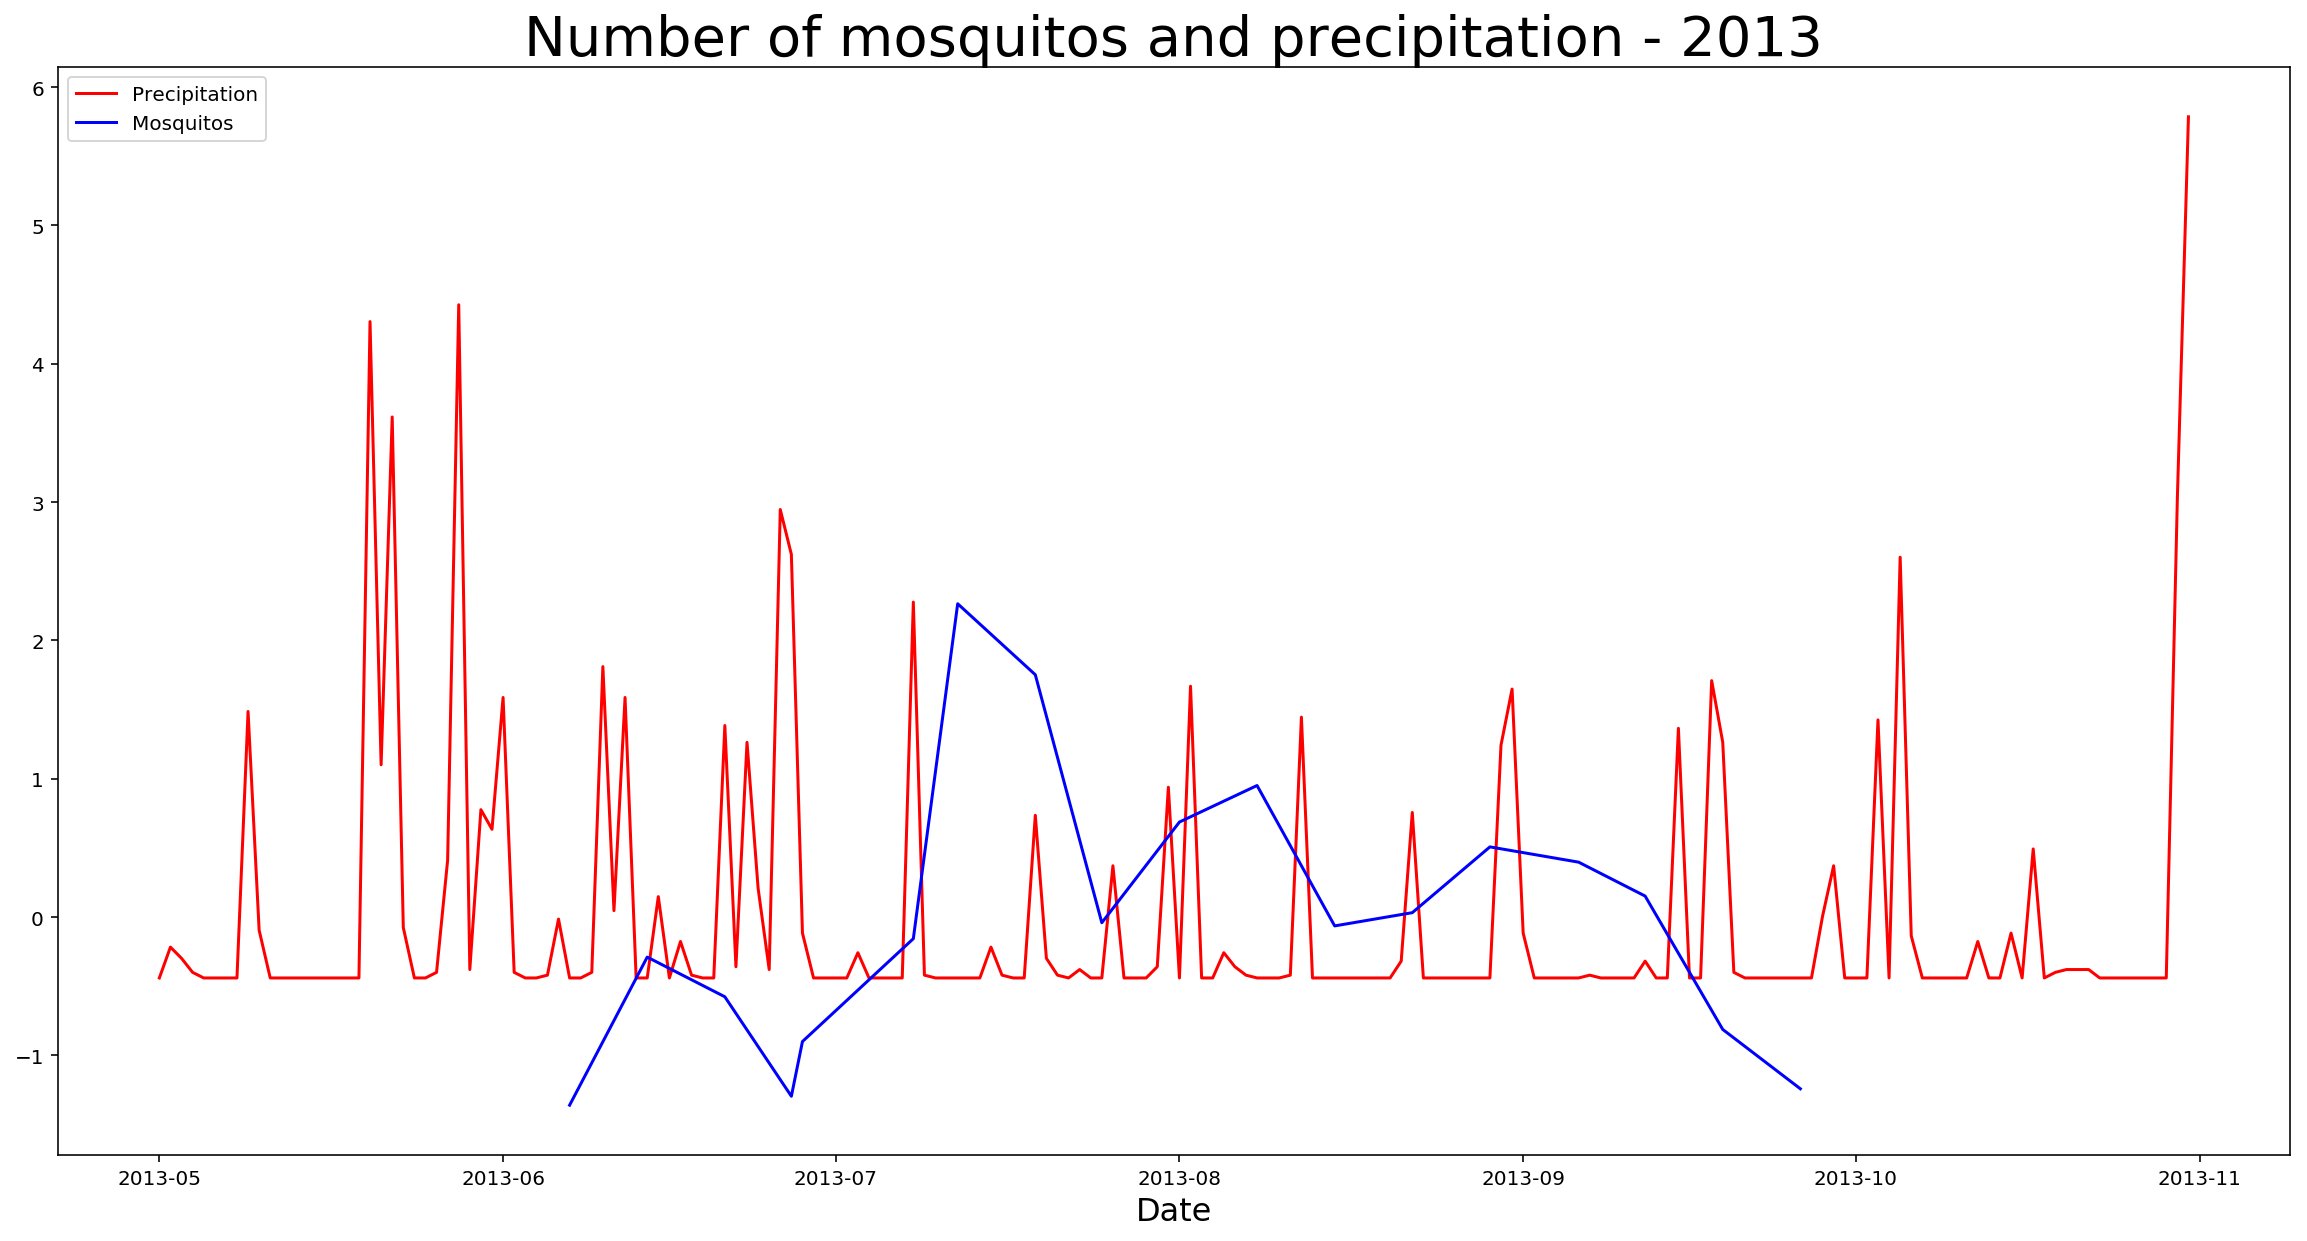

In [25]:
precip_mozzie([2007, 2009, 2011, 2013])

Precipitation does not show any obvious relationship with number of mosquitos caught. 

---

## Spray Data

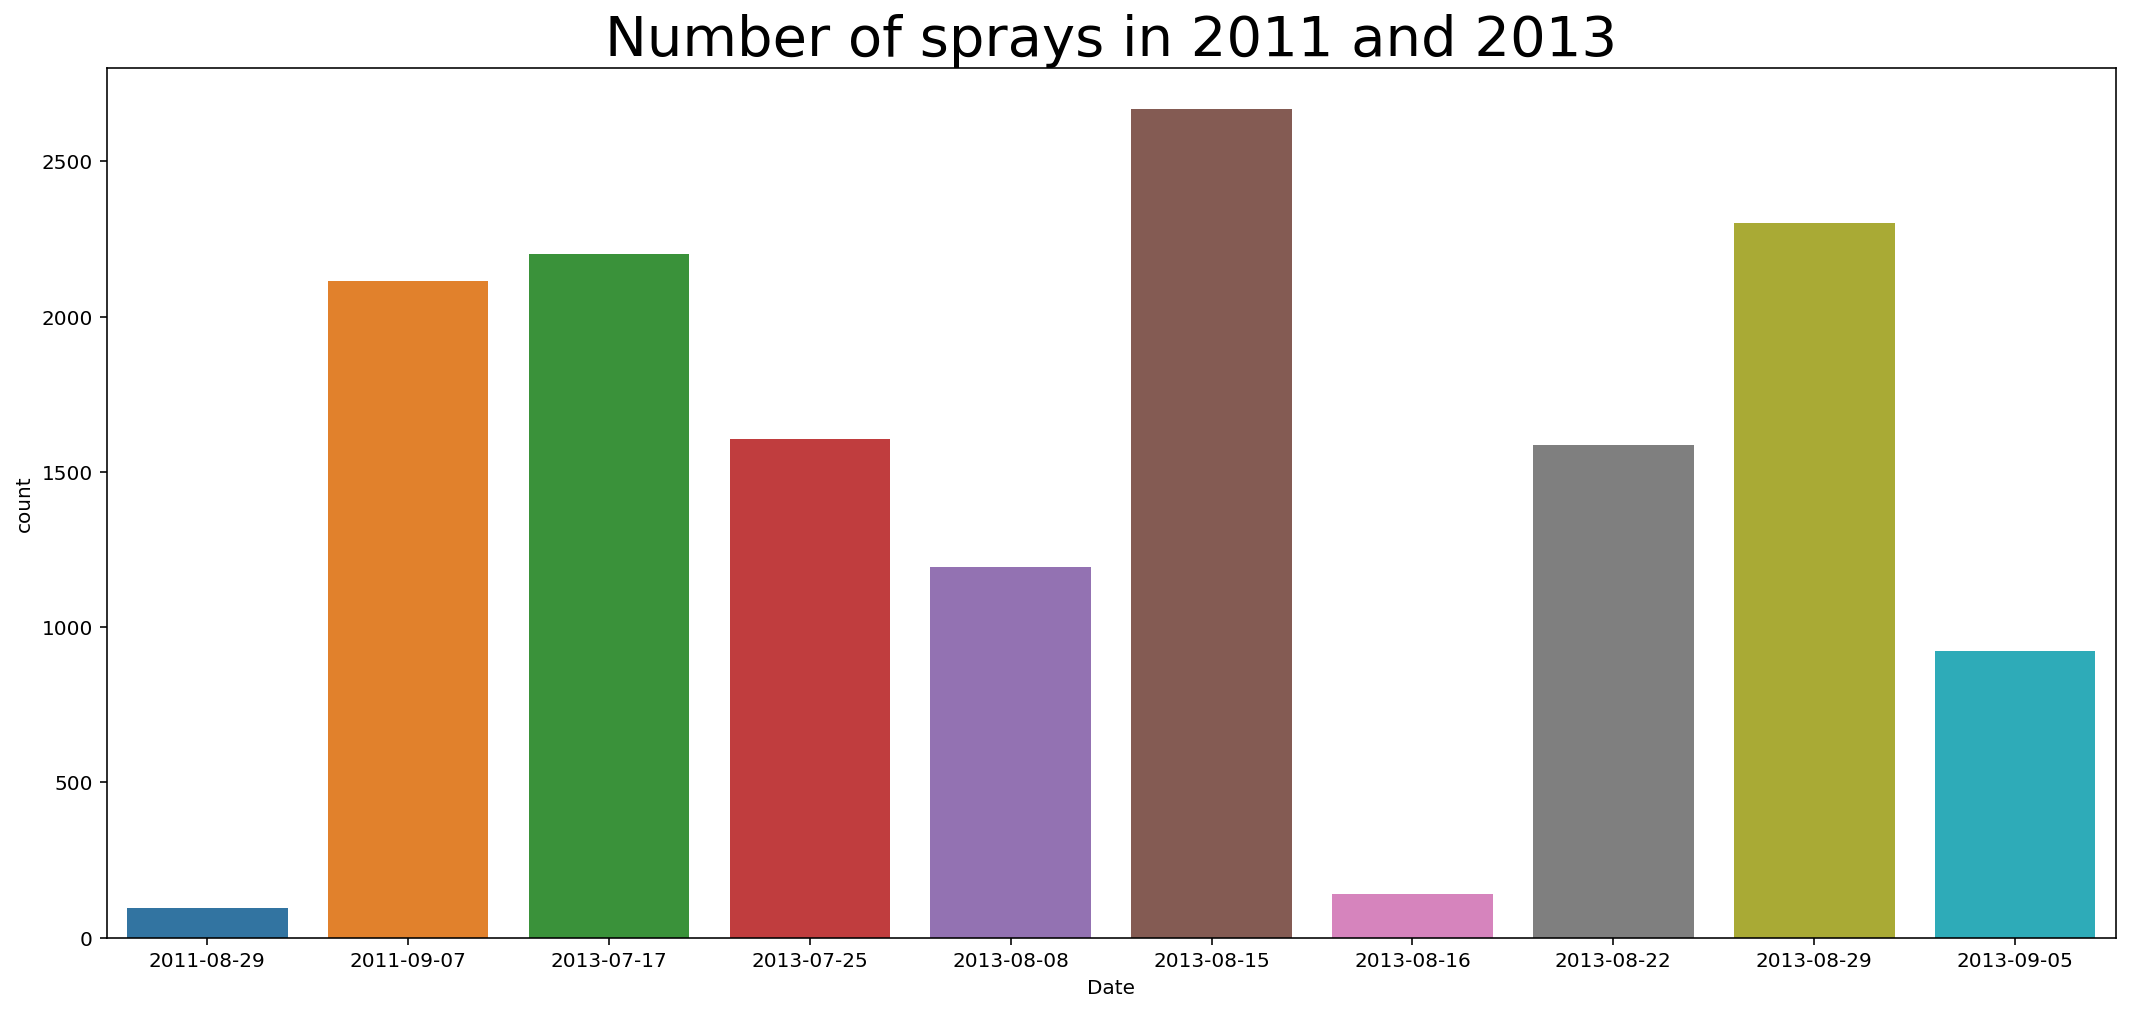

In [26]:
plt.figure(figsize = (18,8))
sns.countplot(df_spray['Date'])
plt.title("Number of sprays in 2011 and 2013", fontsize = 28) ;

Sprays were carried out on two dates in 2011, with the rest in 2013. 

Sprays in 2011:
- 2011-08-29
- 2011-09-07

Sprays in 2013:
- 2013-07-17
- 2013-07-25
- 2013-08-08
- 2013-08-15
- 2013-08-16 
- 2013-08-22
- 2013-08-29
- 2013-09-05

## Sprays-traps overlap

Some traps were in the areas that were sprayed in 2011 and 2013, as shown in these maps. Spray locations are indicated by the blue markers, while orange markers indicate trap locations. 

![Spray locations](./image/sprays-combined.png)

We determined what these traps were using display information from Tableau. After making the following plots below, we noticed there was a fall in mosquitos after spraying.

Text(0.5, 1.0, 'Trap T223 in 2011 - sprayed Sep 7 ')

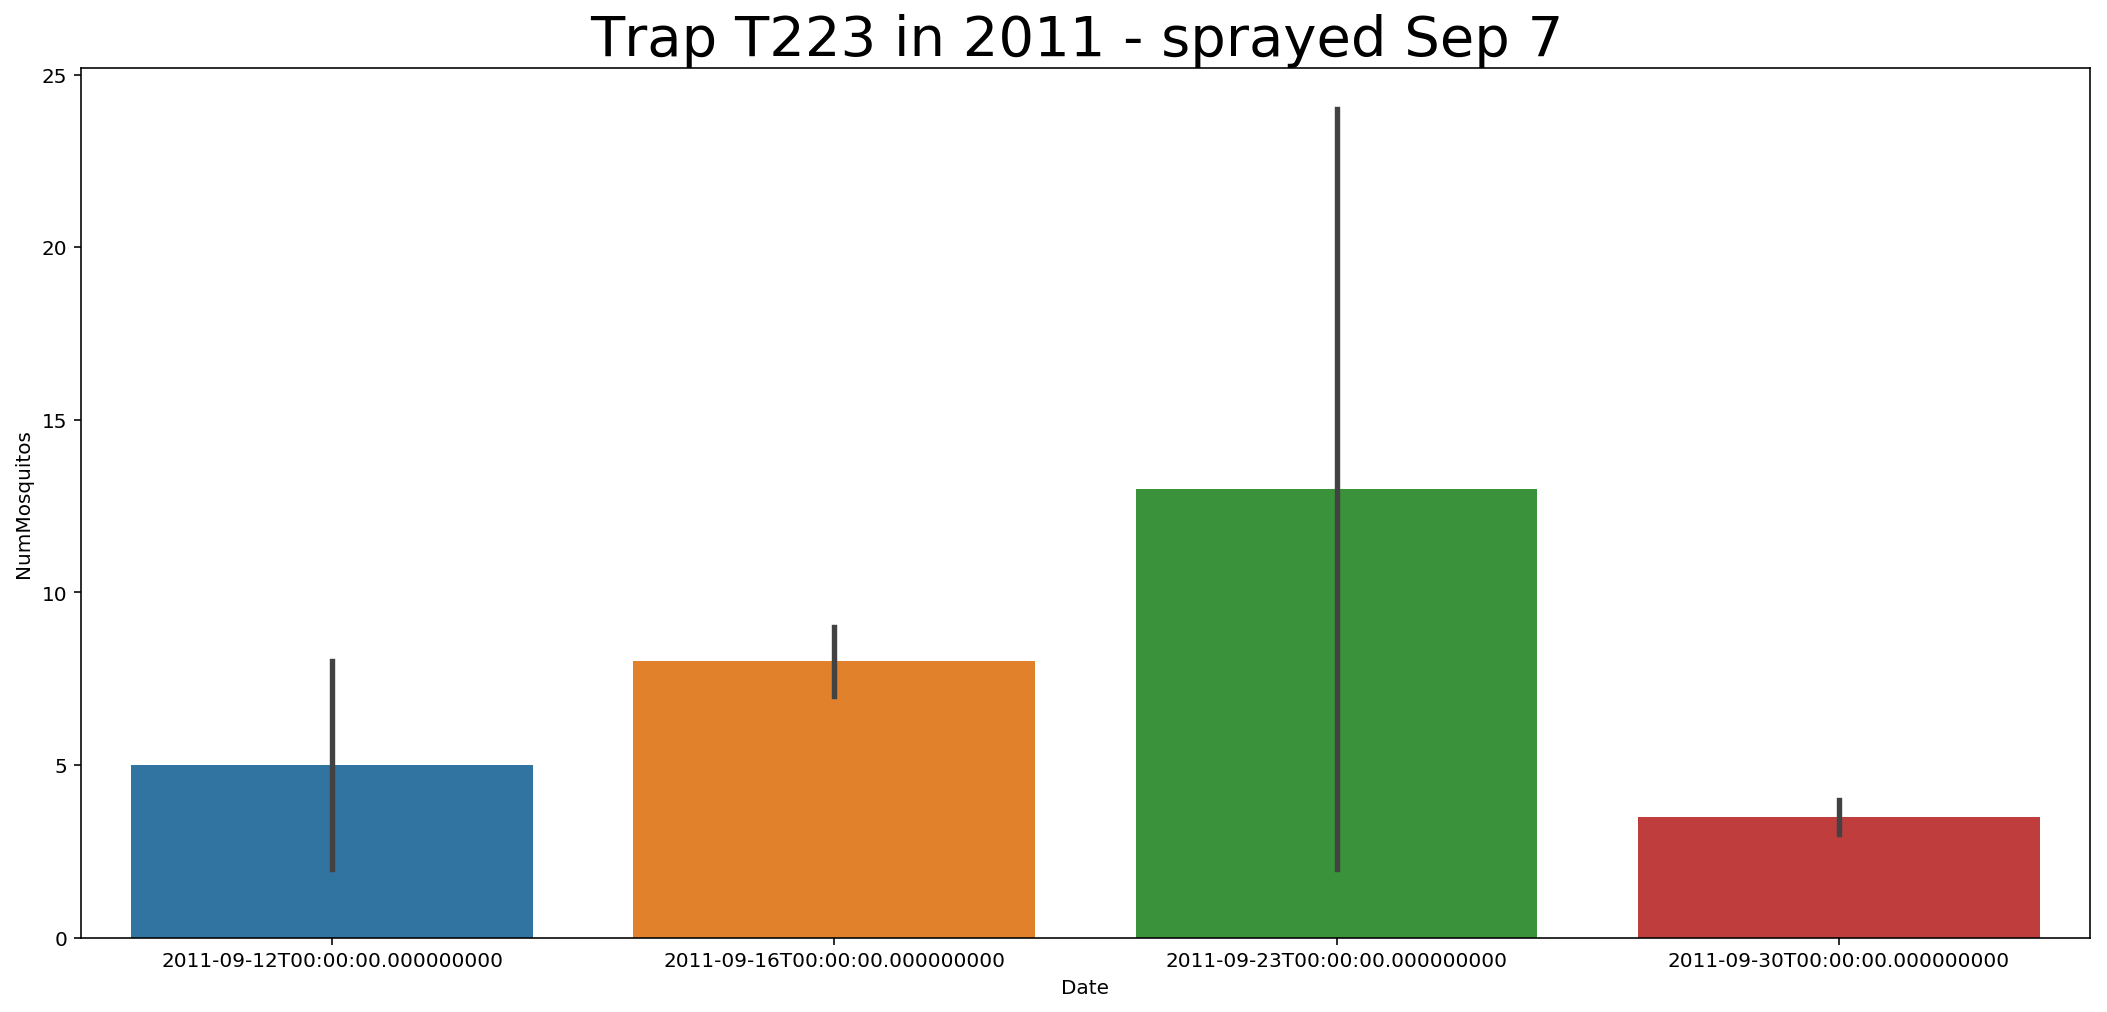

In [27]:
plt.figure(figsize=(18,8))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T223') & (df_train['Date'] > '2011-09-01') & (df_train['Date'] < '2012-01-01')])
plt.xticks(rotation=0)
plt.title('Trap T223 in 2011 - sprayed Sep 7 ', fontsize=28)

Text(0.5, 1.0, 'Trap T008 in 2013 - sprayed July 17')

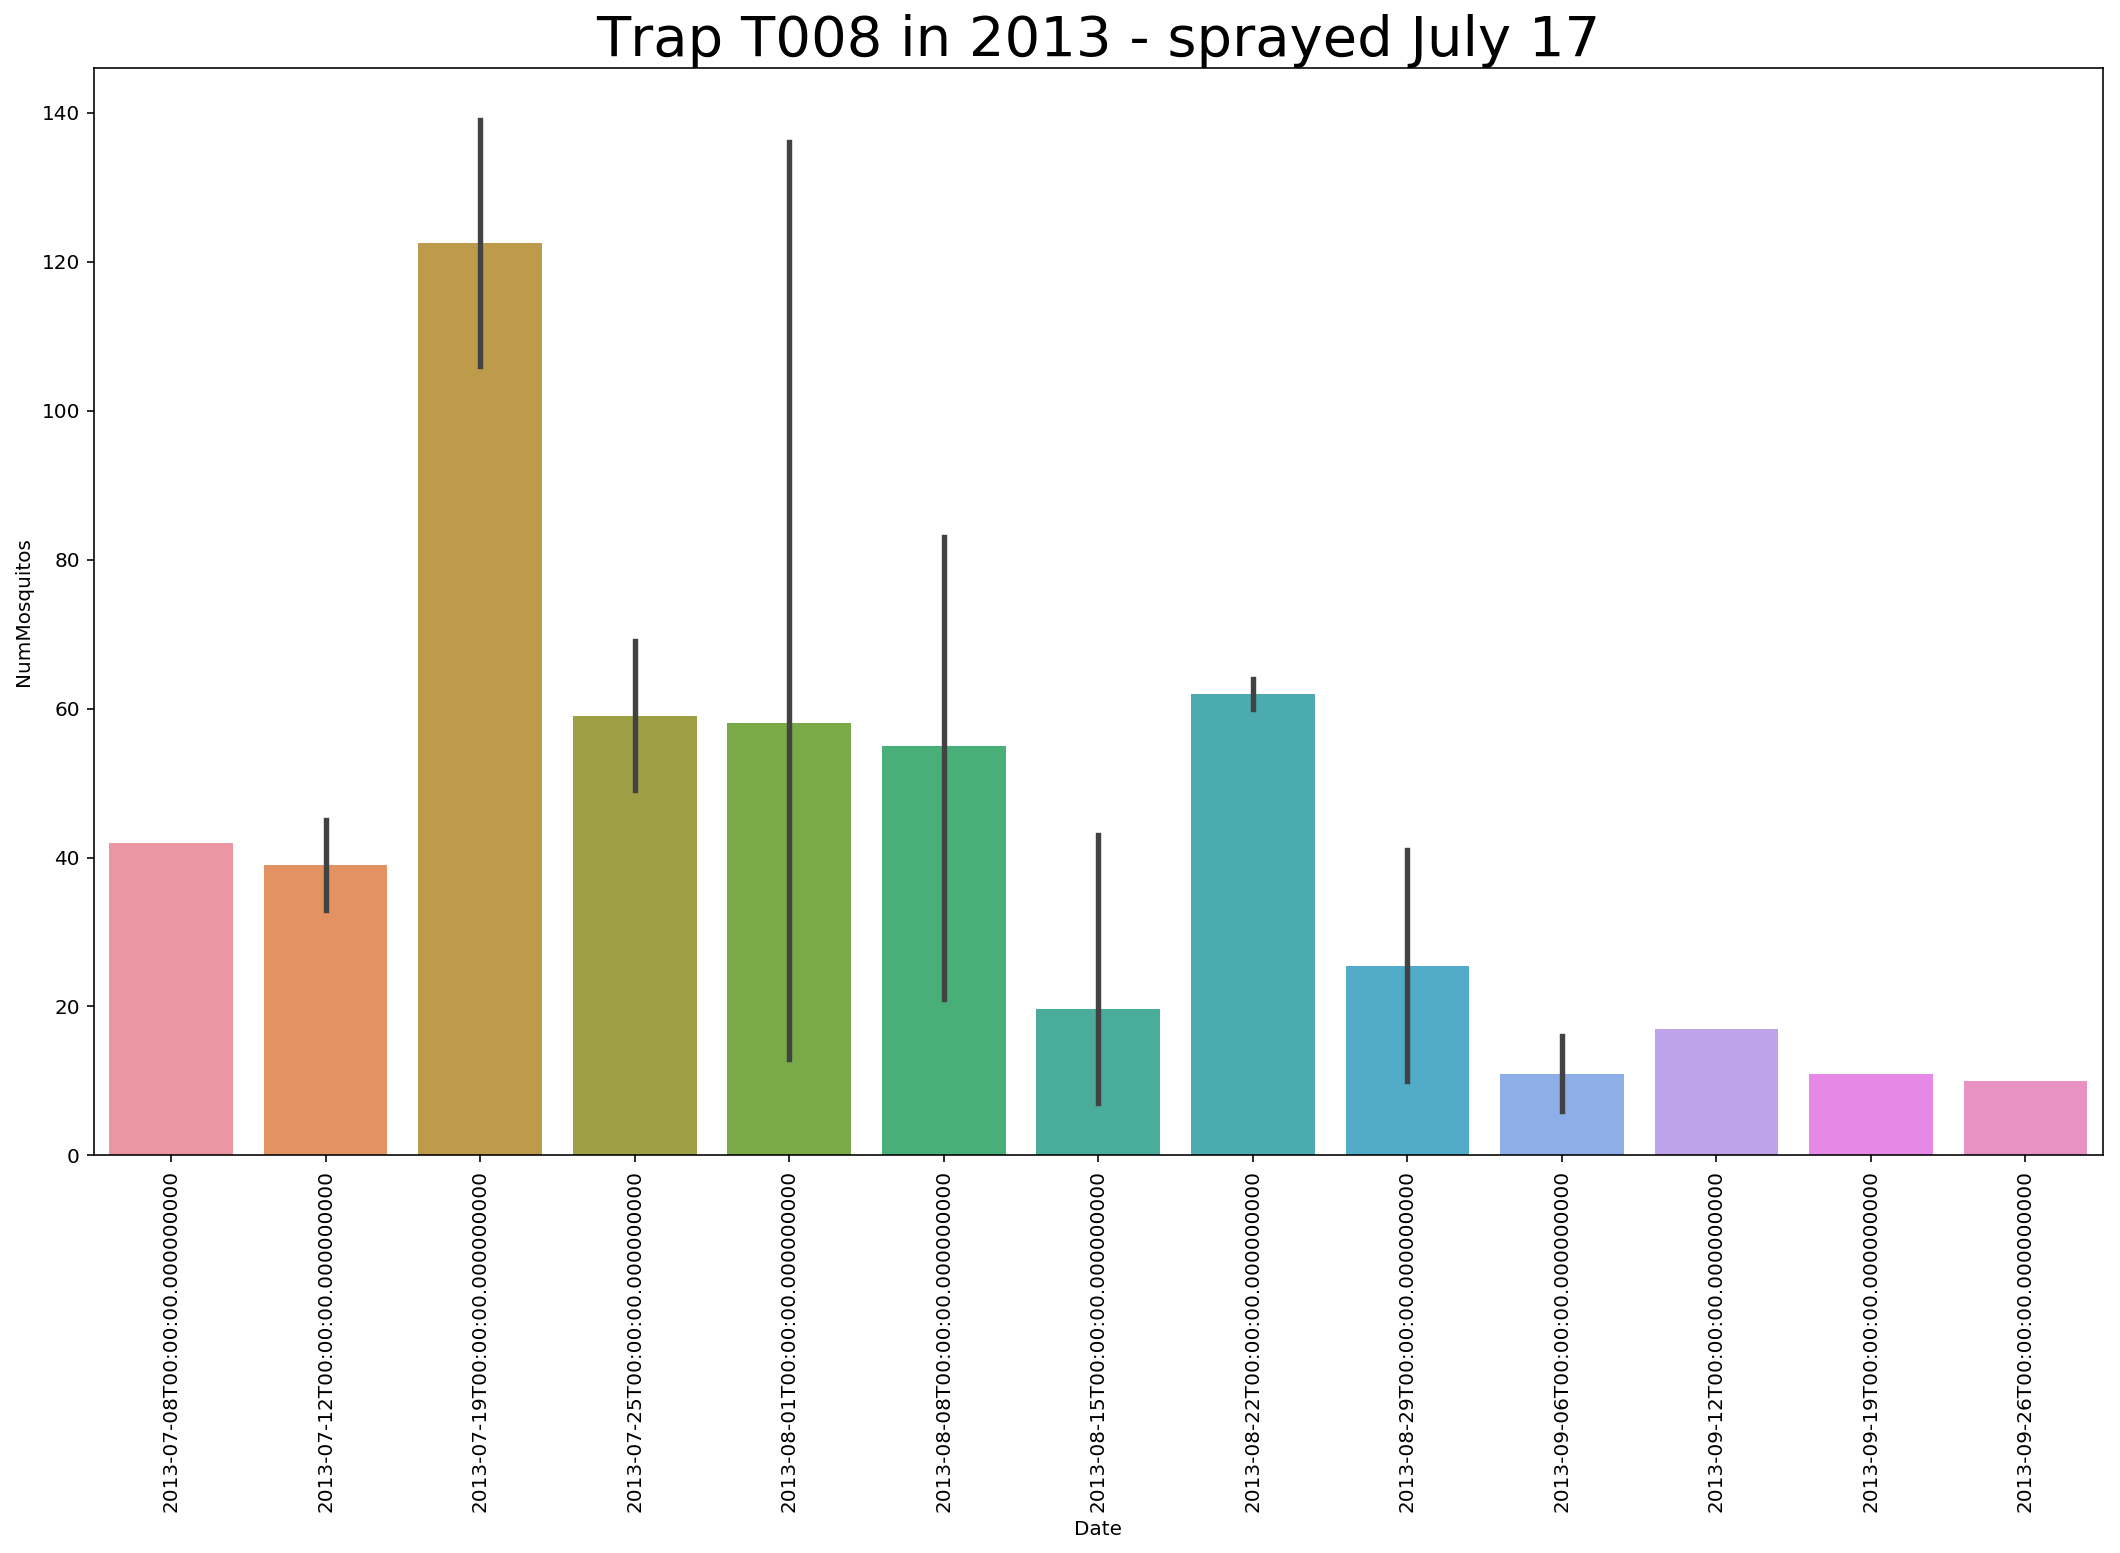

In [28]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T008') & (df_train['Date'] > '2013-07-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T008 in 2013 - sprayed July 17', fontsize=28)

Text(0.5, 1.0, 'Trap T228 in 2013 - sprayed July 25')

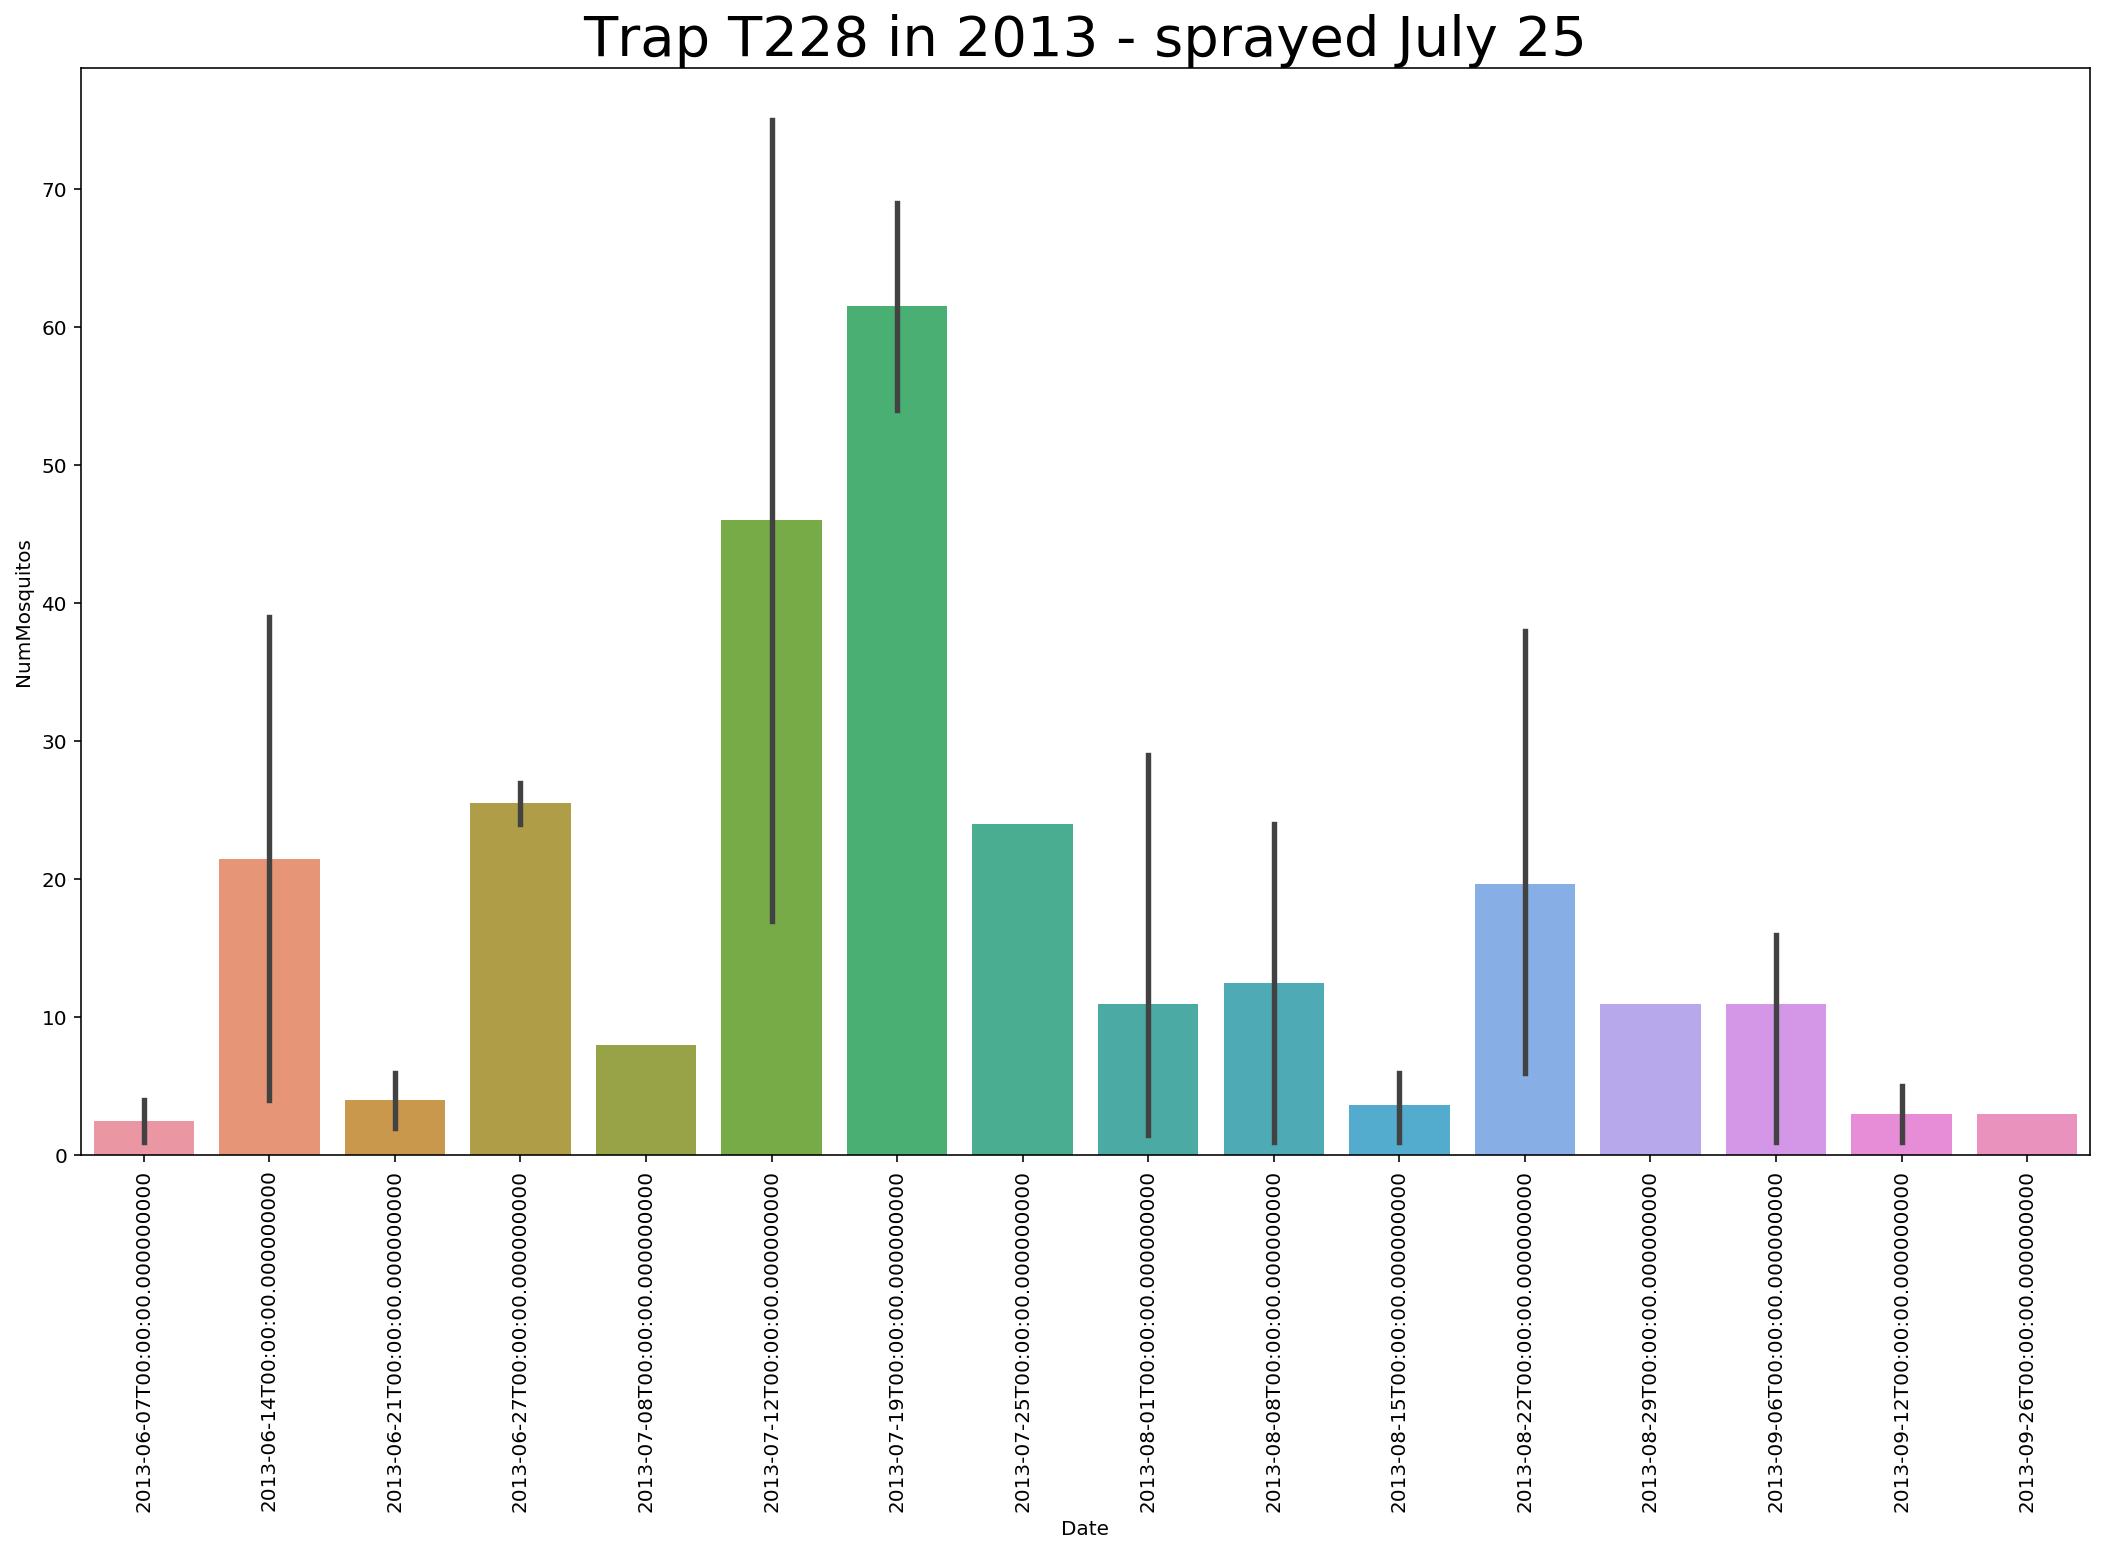

In [29]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T228') & (df_train['Date'] > '2013-01-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T228 in 2013 - sprayed July 25', fontsize=28)

Text(0.5, 1.0, 'Trap T028 in 2013 - sprayed Aug 29')

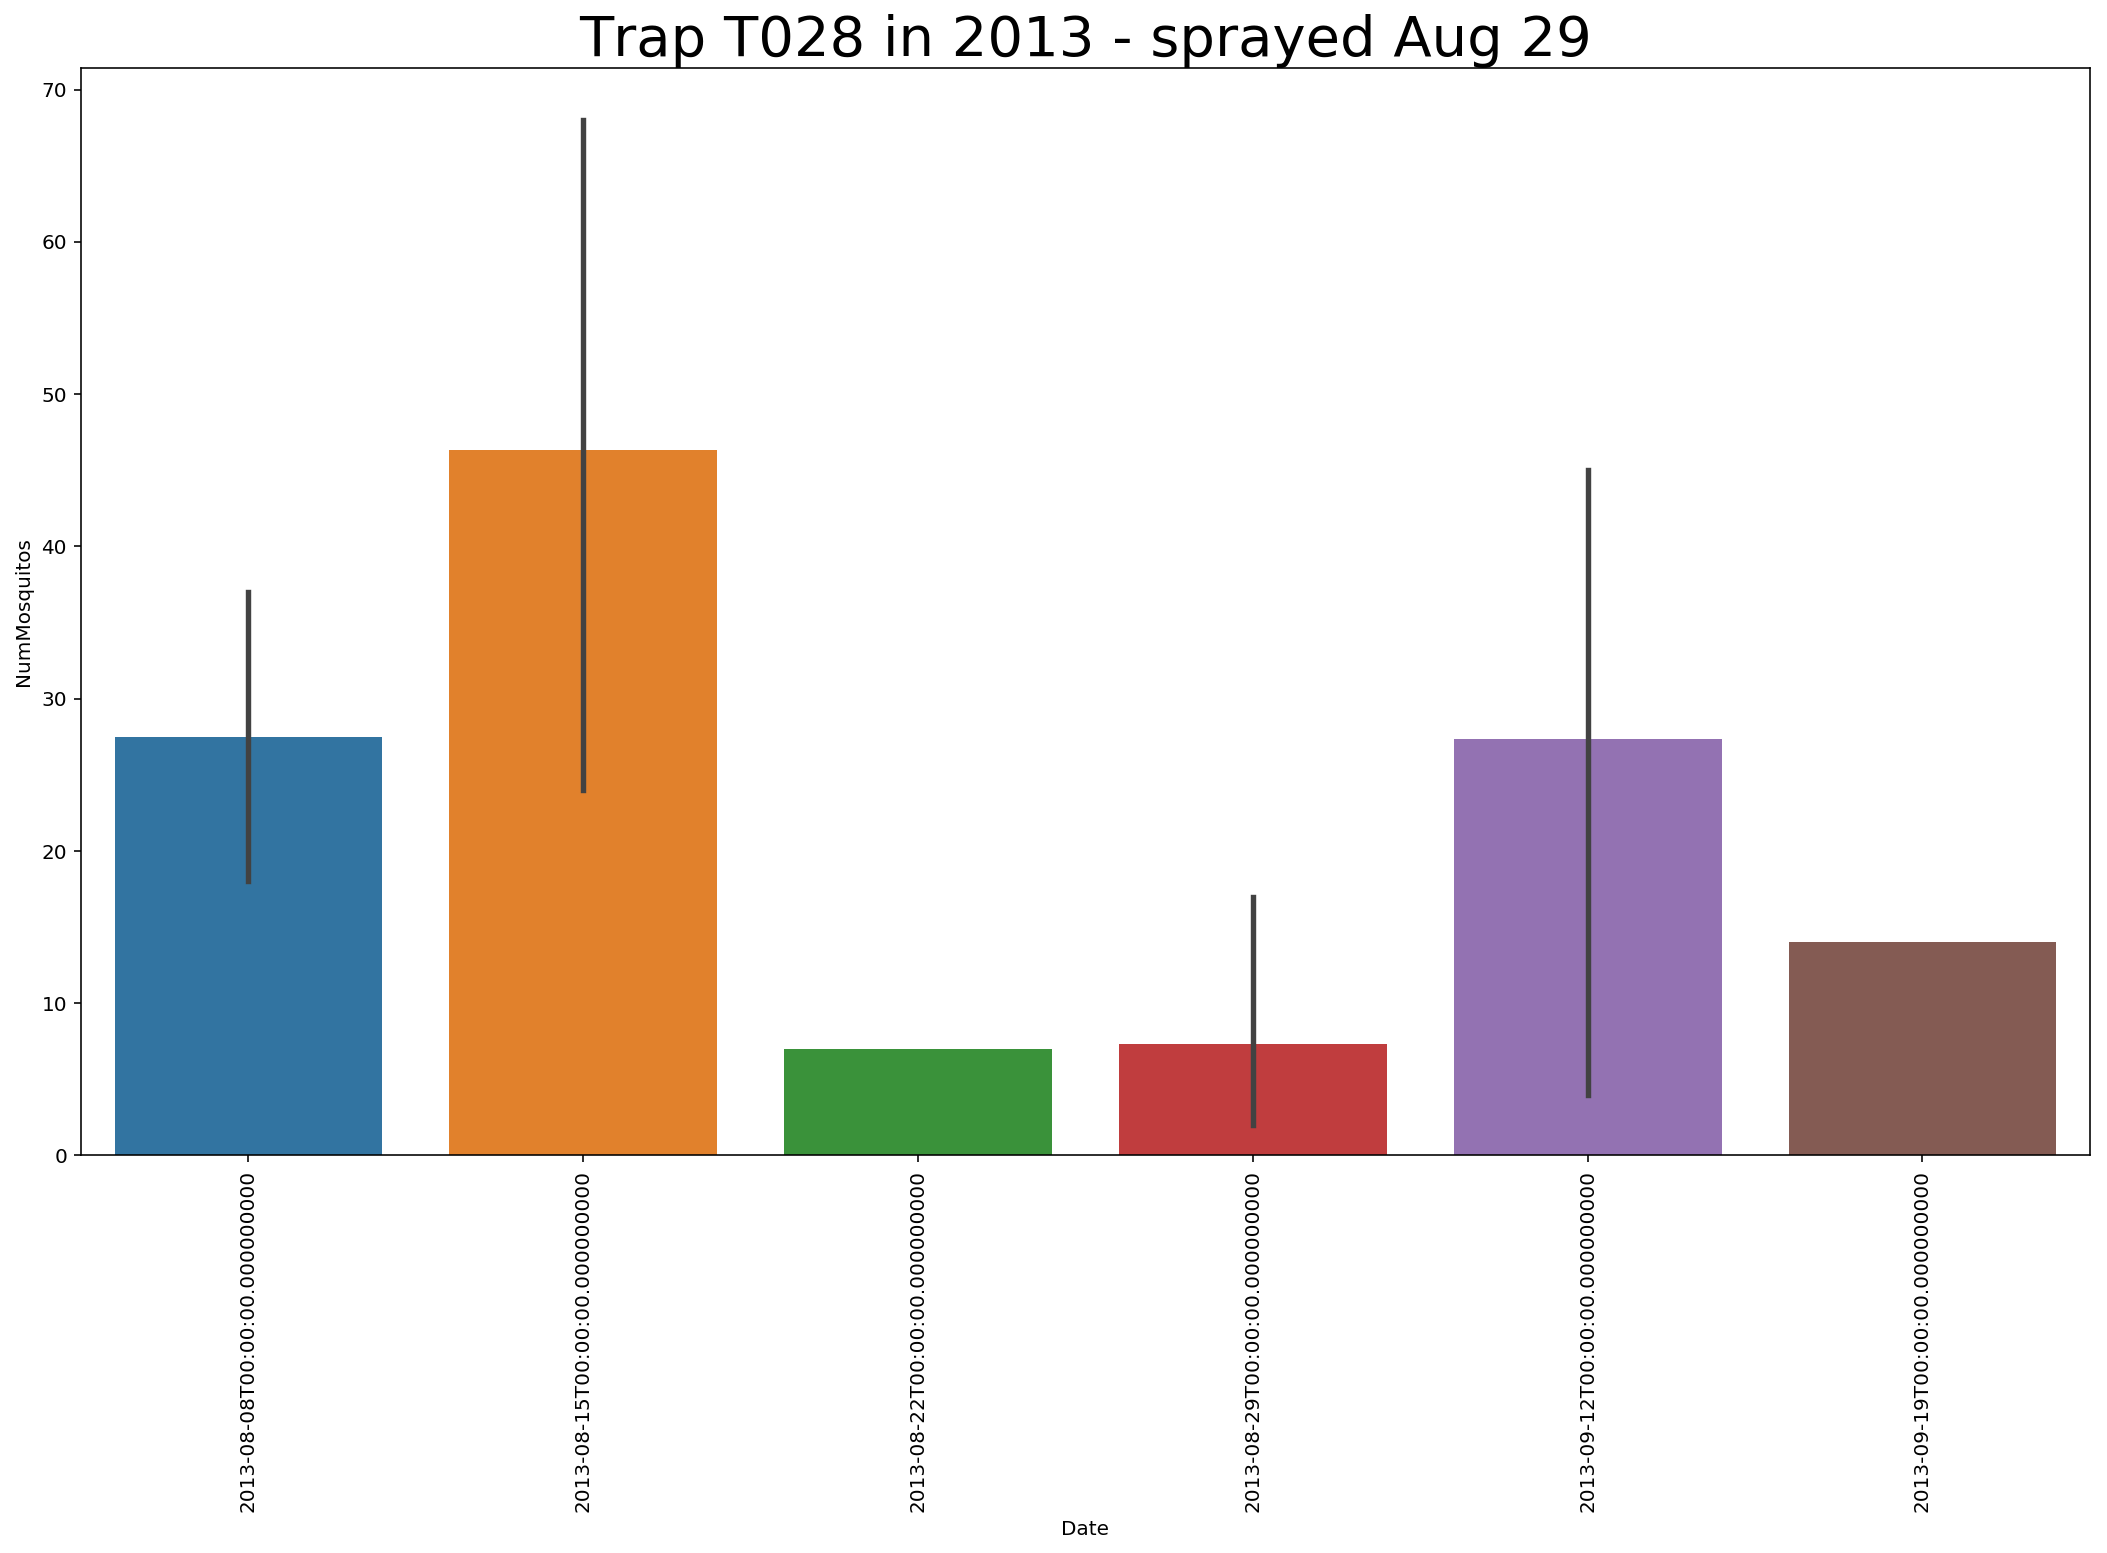

In [30]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T028') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T028 in 2013 - sprayed Aug 29', fontsize=28)

Text(0.5, 1.0, 'Trap T013 in 2013 - sprayed Aug 15')

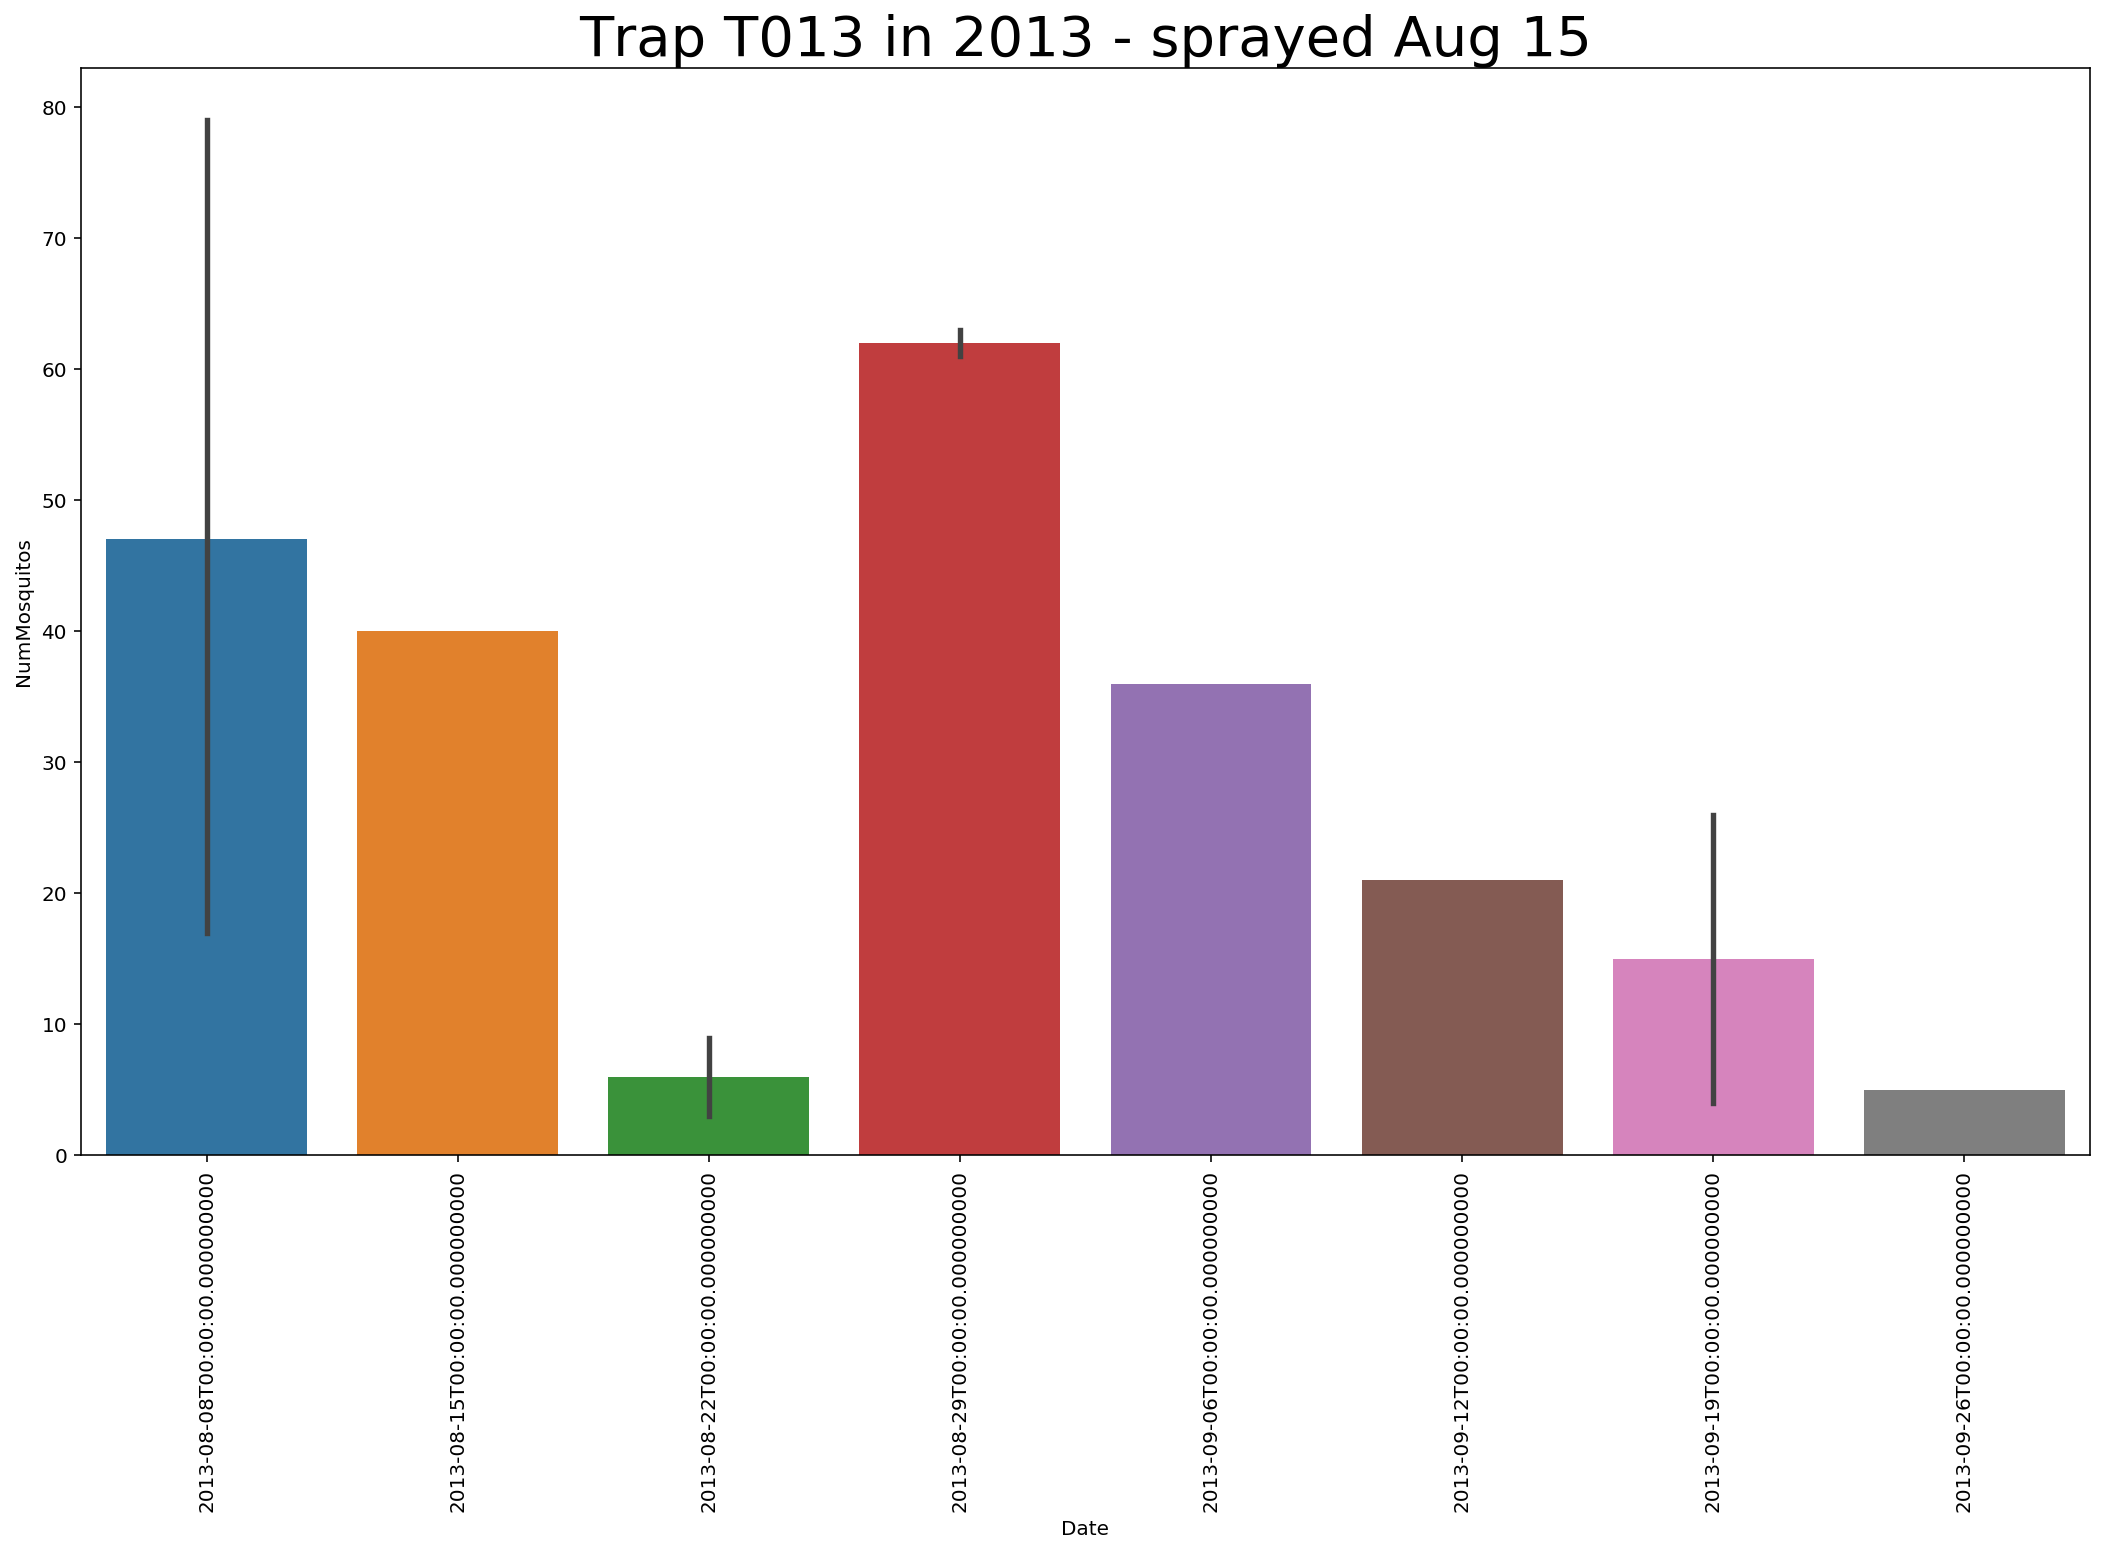

In [31]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T013') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T013 in 2013 - sprayed Aug 15', fontsize=28)

Text(0.5, 1.0, 'Trap T017 in 2013 - sprayed Aug 16')

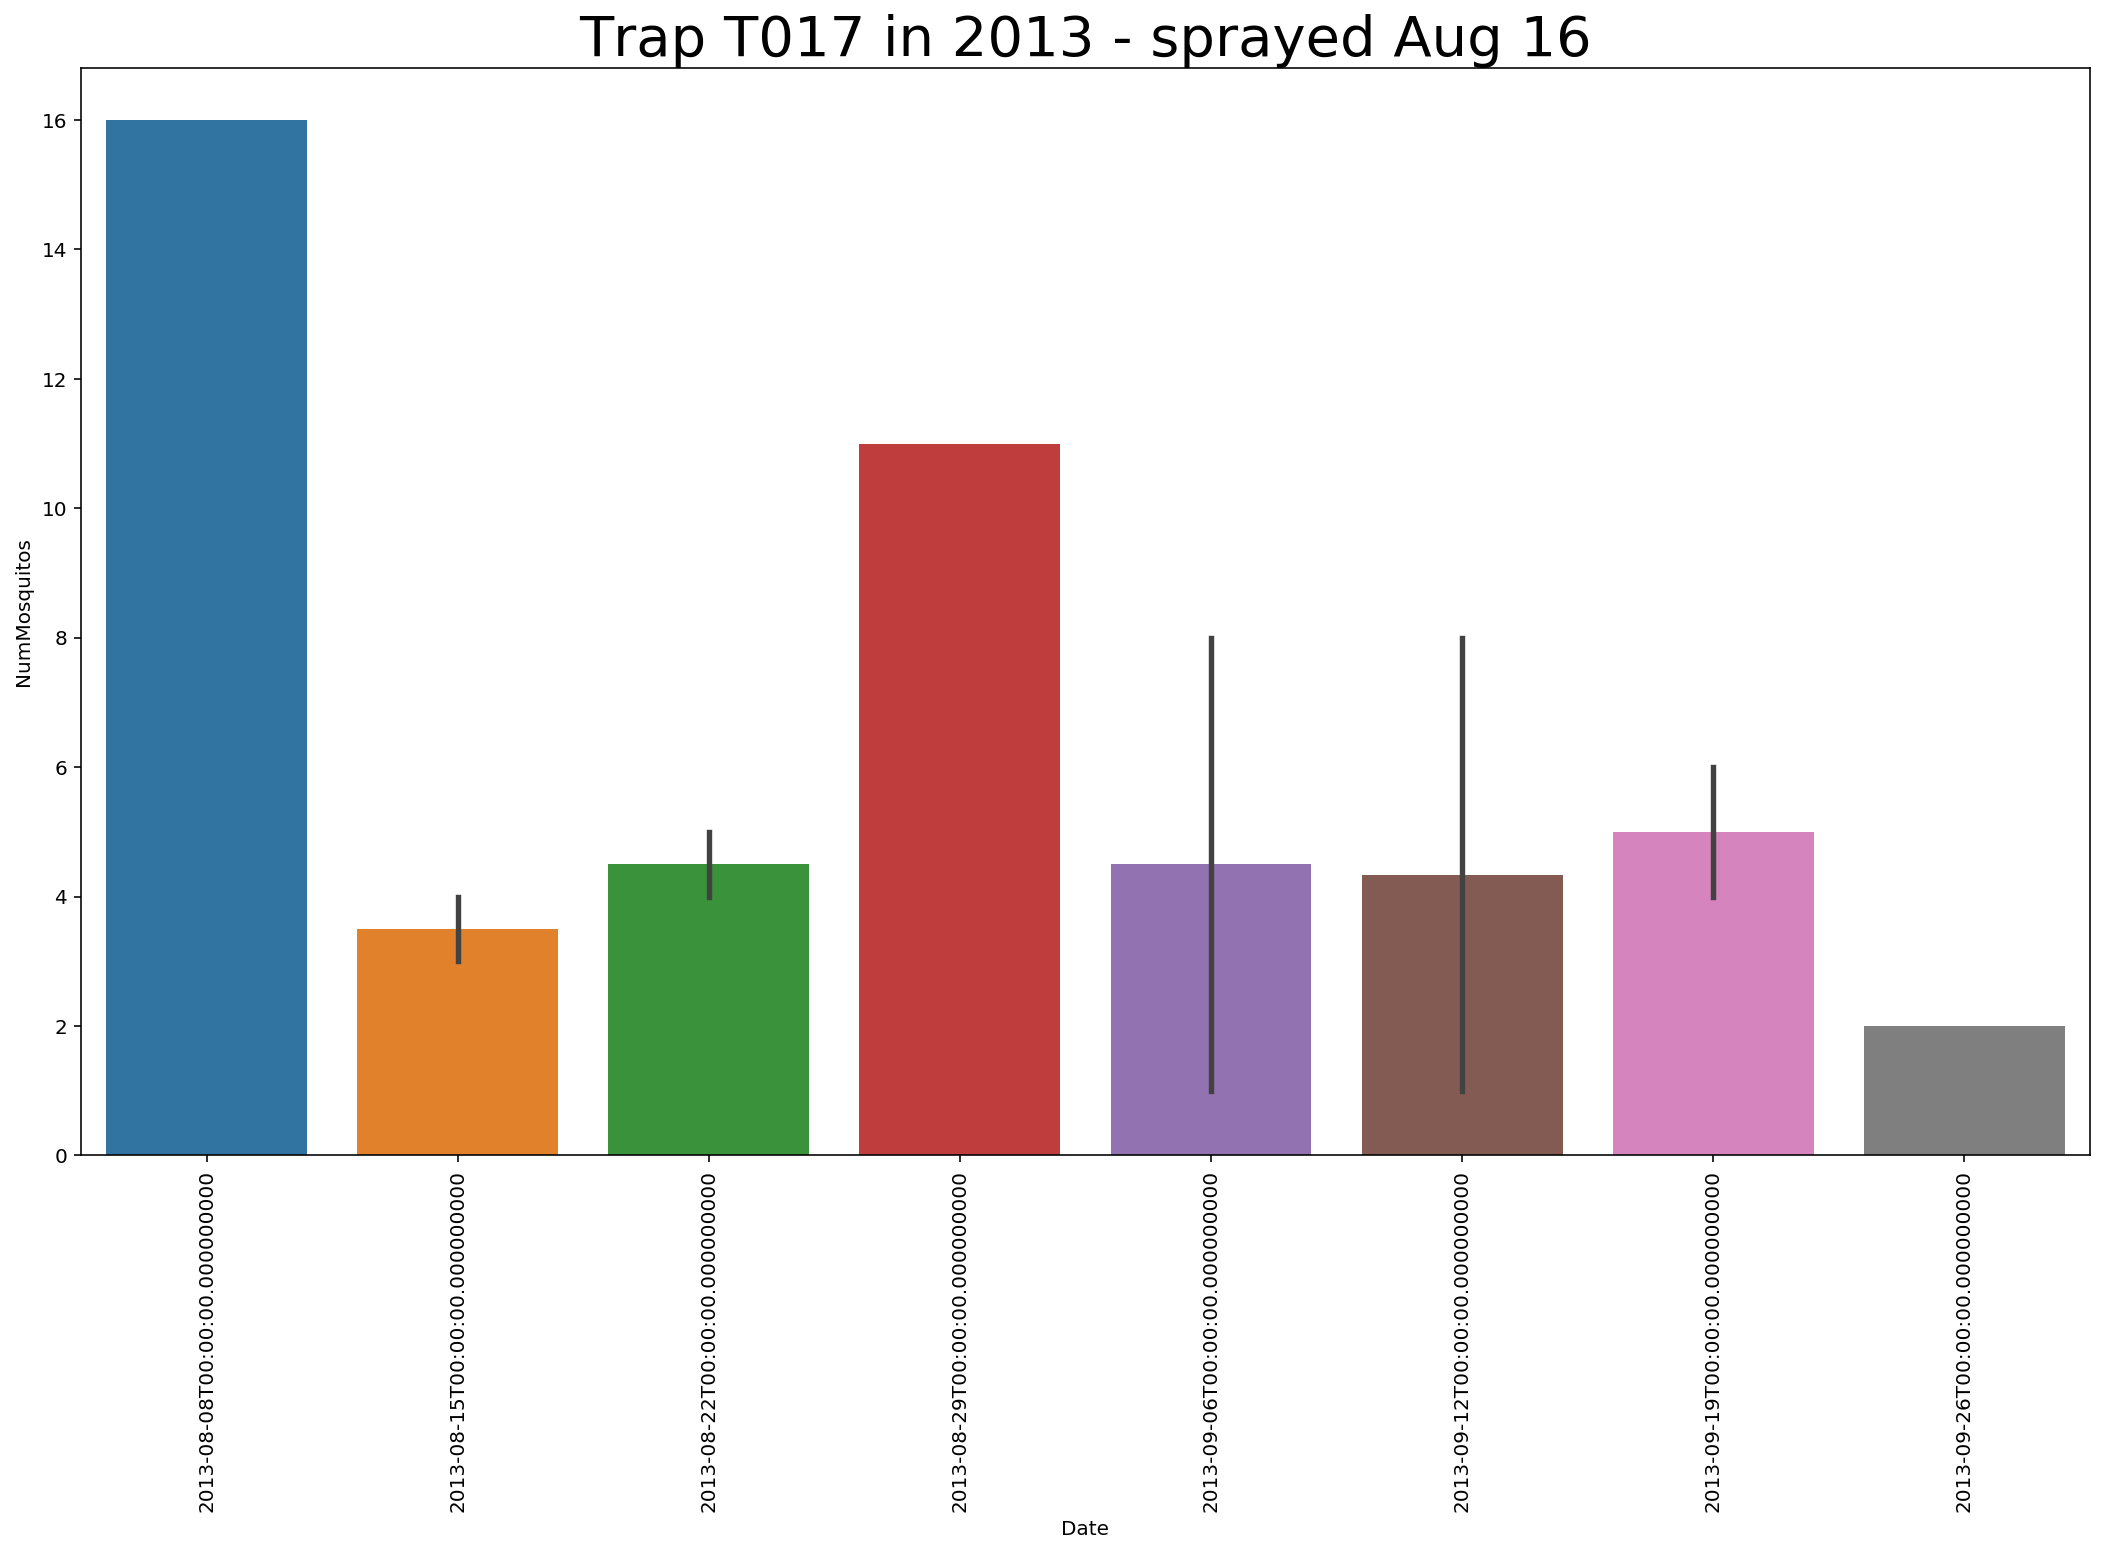

In [32]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T017') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T017 in 2013 - sprayed Aug 16', fontsize=28)

Text(0.5, 1.0, 'Trap T151 in 2013 - sprayed Aug 15')

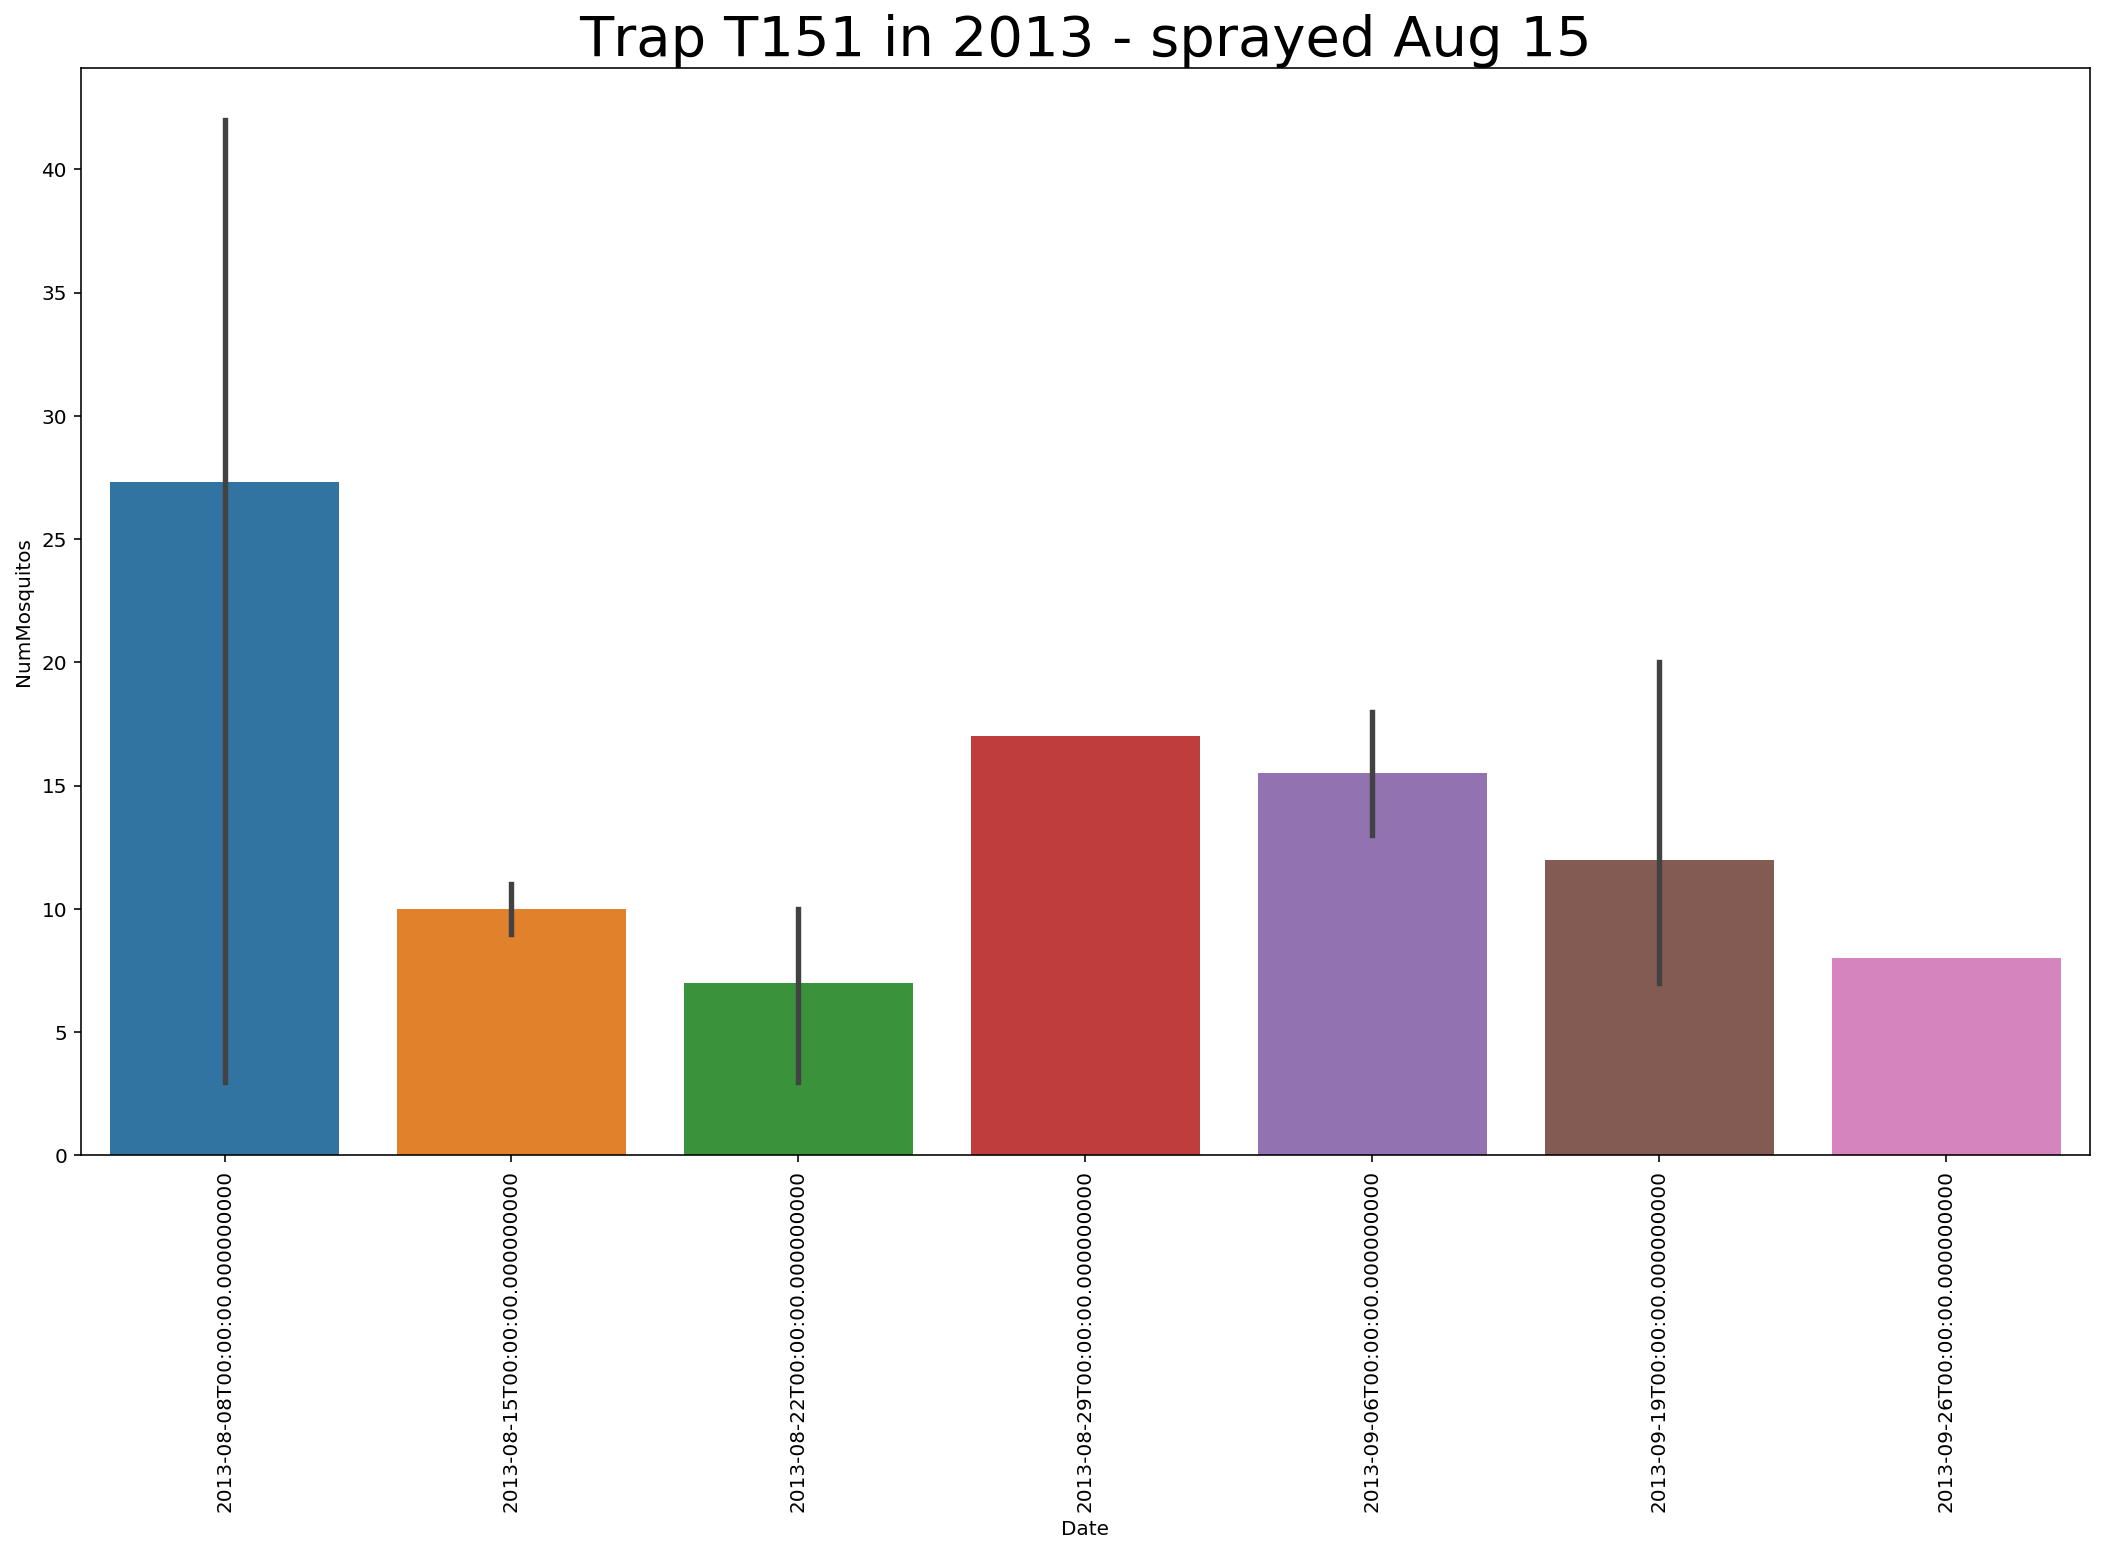

In [33]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T151') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T151 in 2013 - sprayed Aug 15', fontsize=28)

Text(0.5, 1.0, 'Trap T230 in 2013 - sprayed Aug 15')

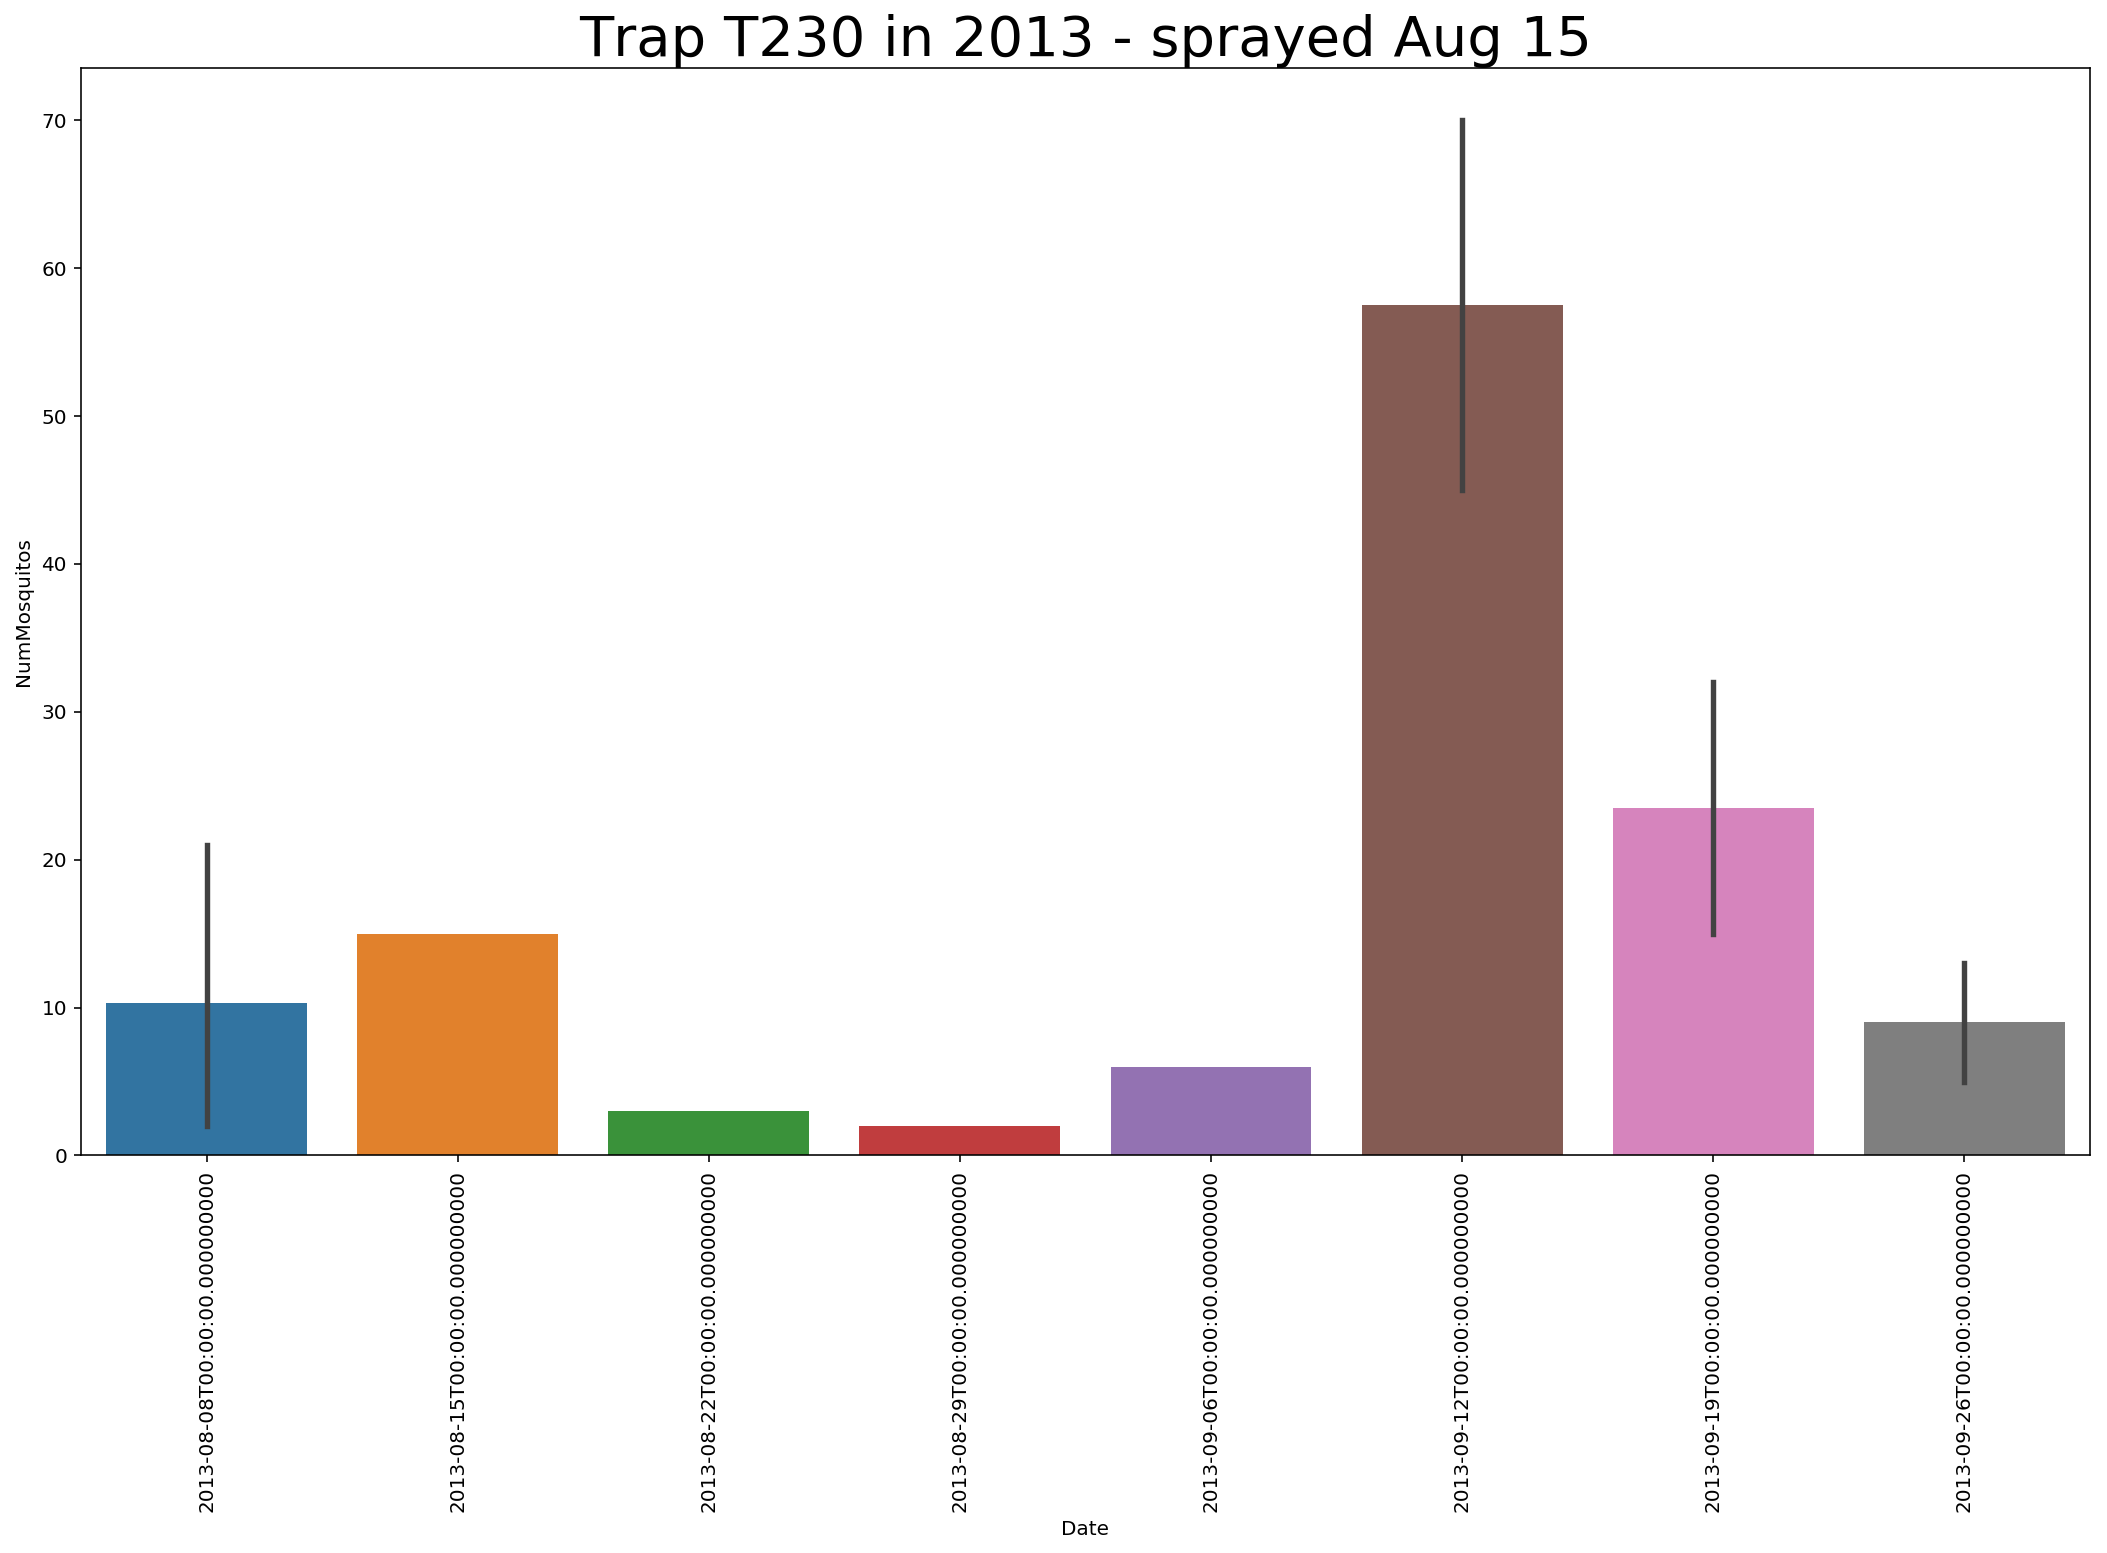

In [34]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T230') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T230 in 2013 - sprayed Aug 15', fontsize=28)

Text(0.5, 1.0, 'Trap T231 in 2013 - sprayed Aug 29')

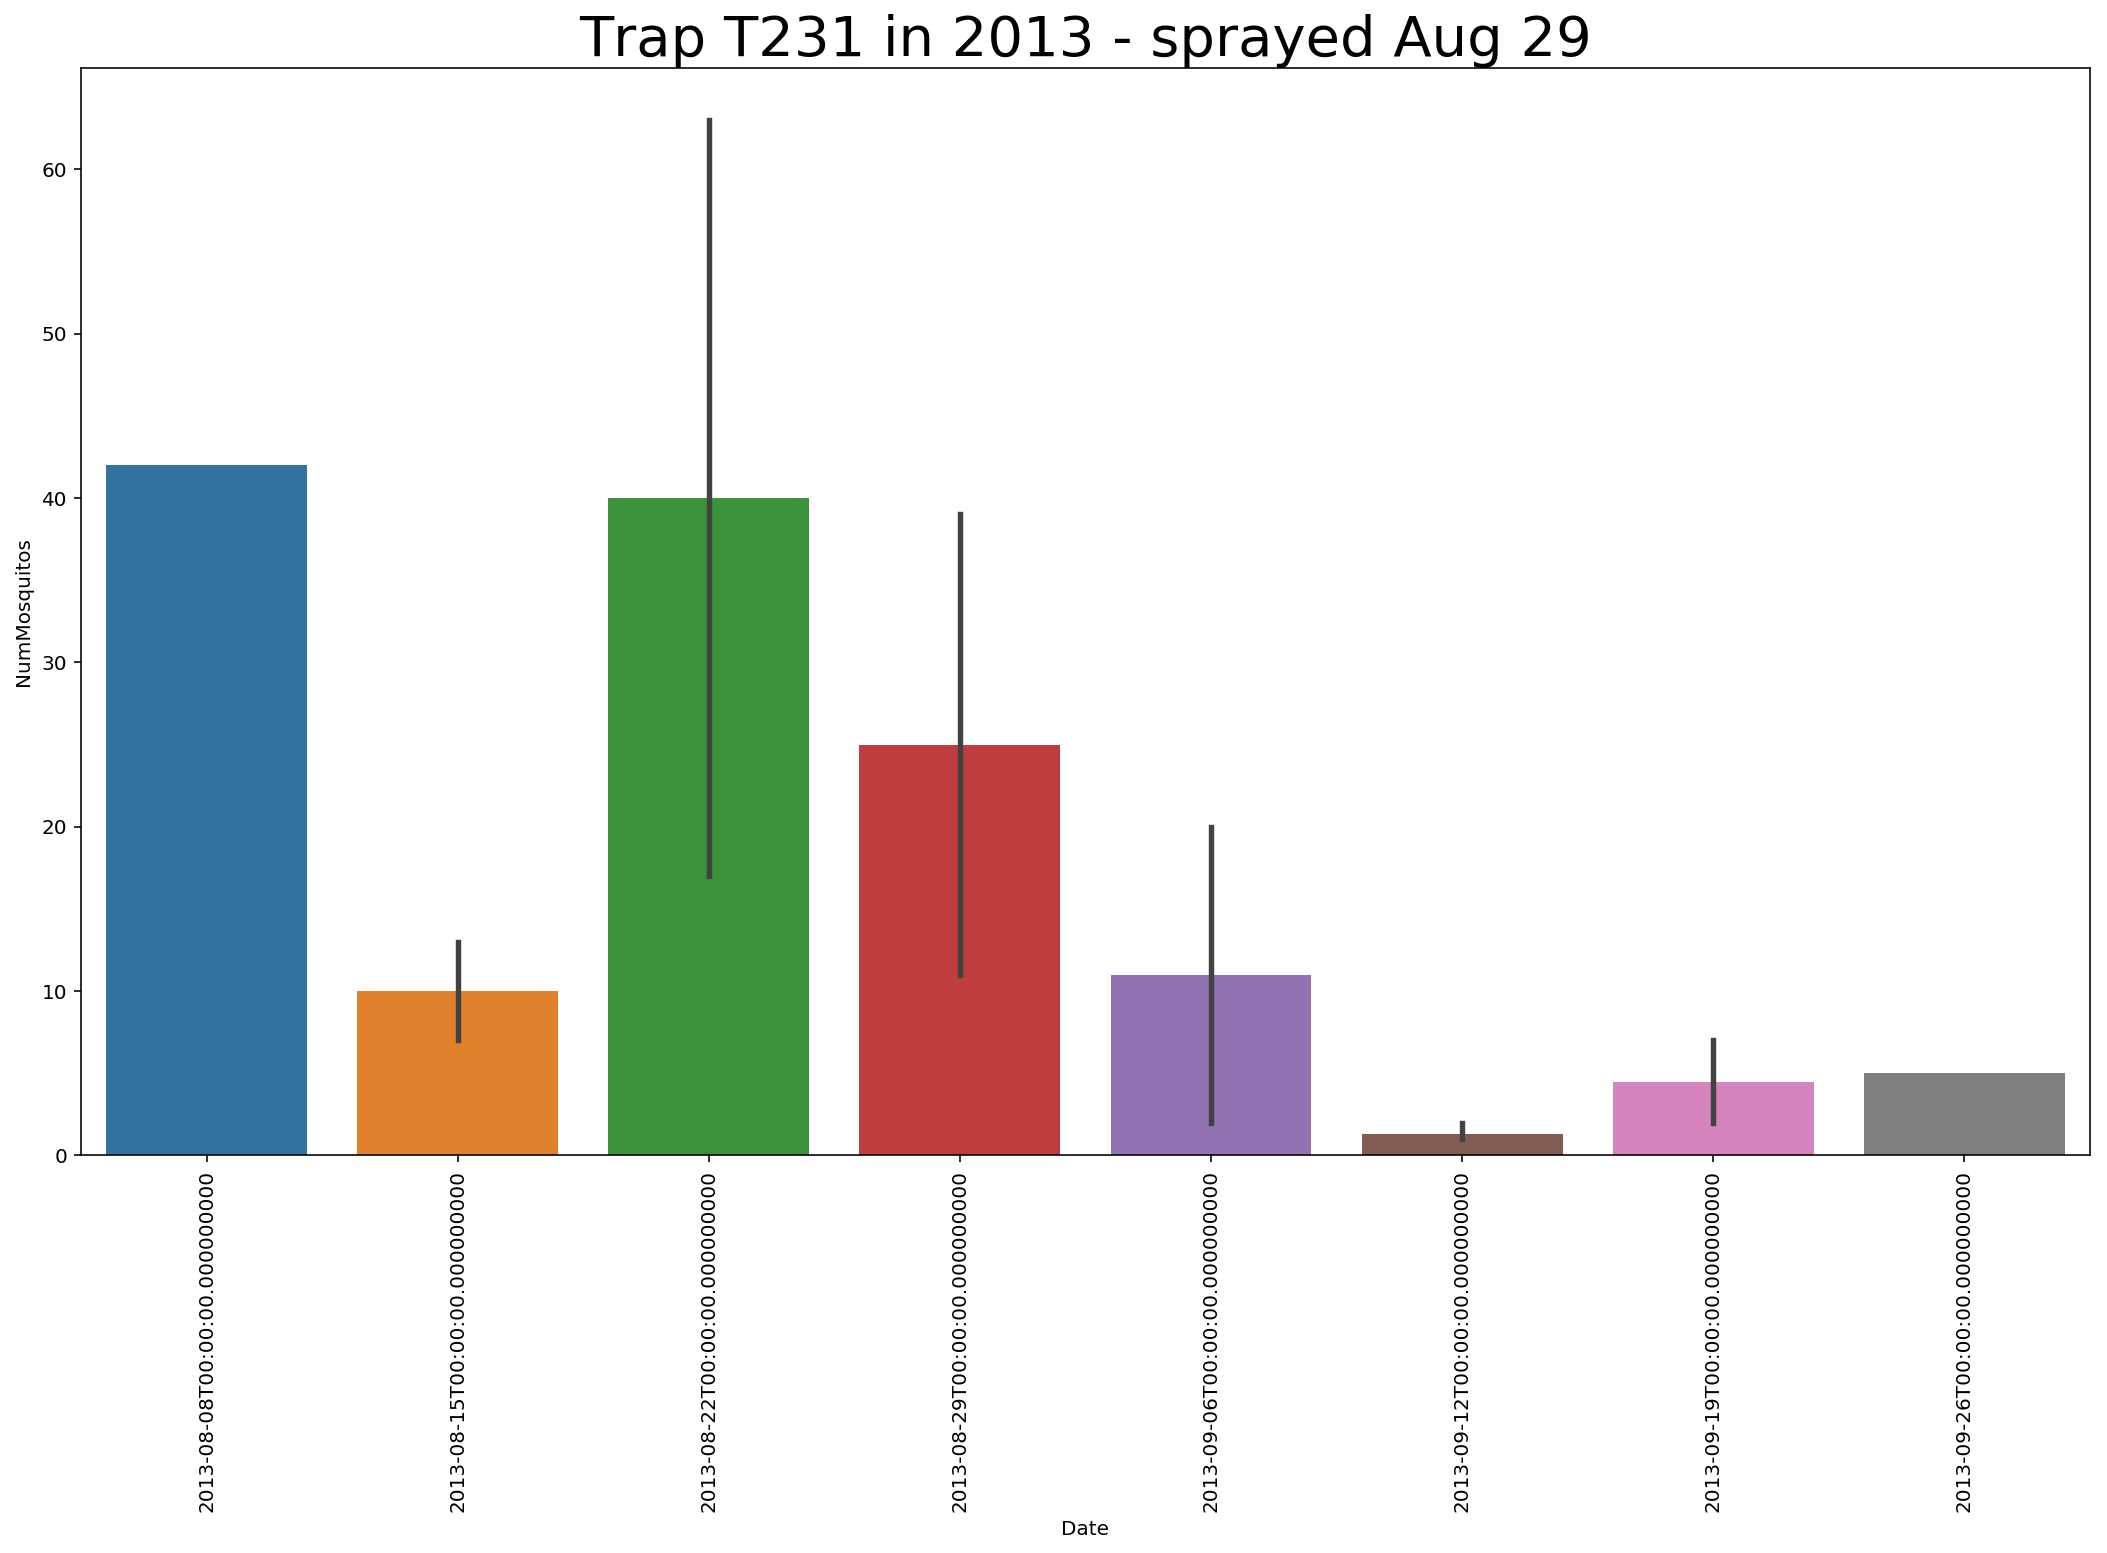

In [35]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T231') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T231 in 2013 - sprayed Aug 29', fontsize=28)

Text(0.5, 1.0, 'Trap T147 in 2013 - sprayed Aug 8')

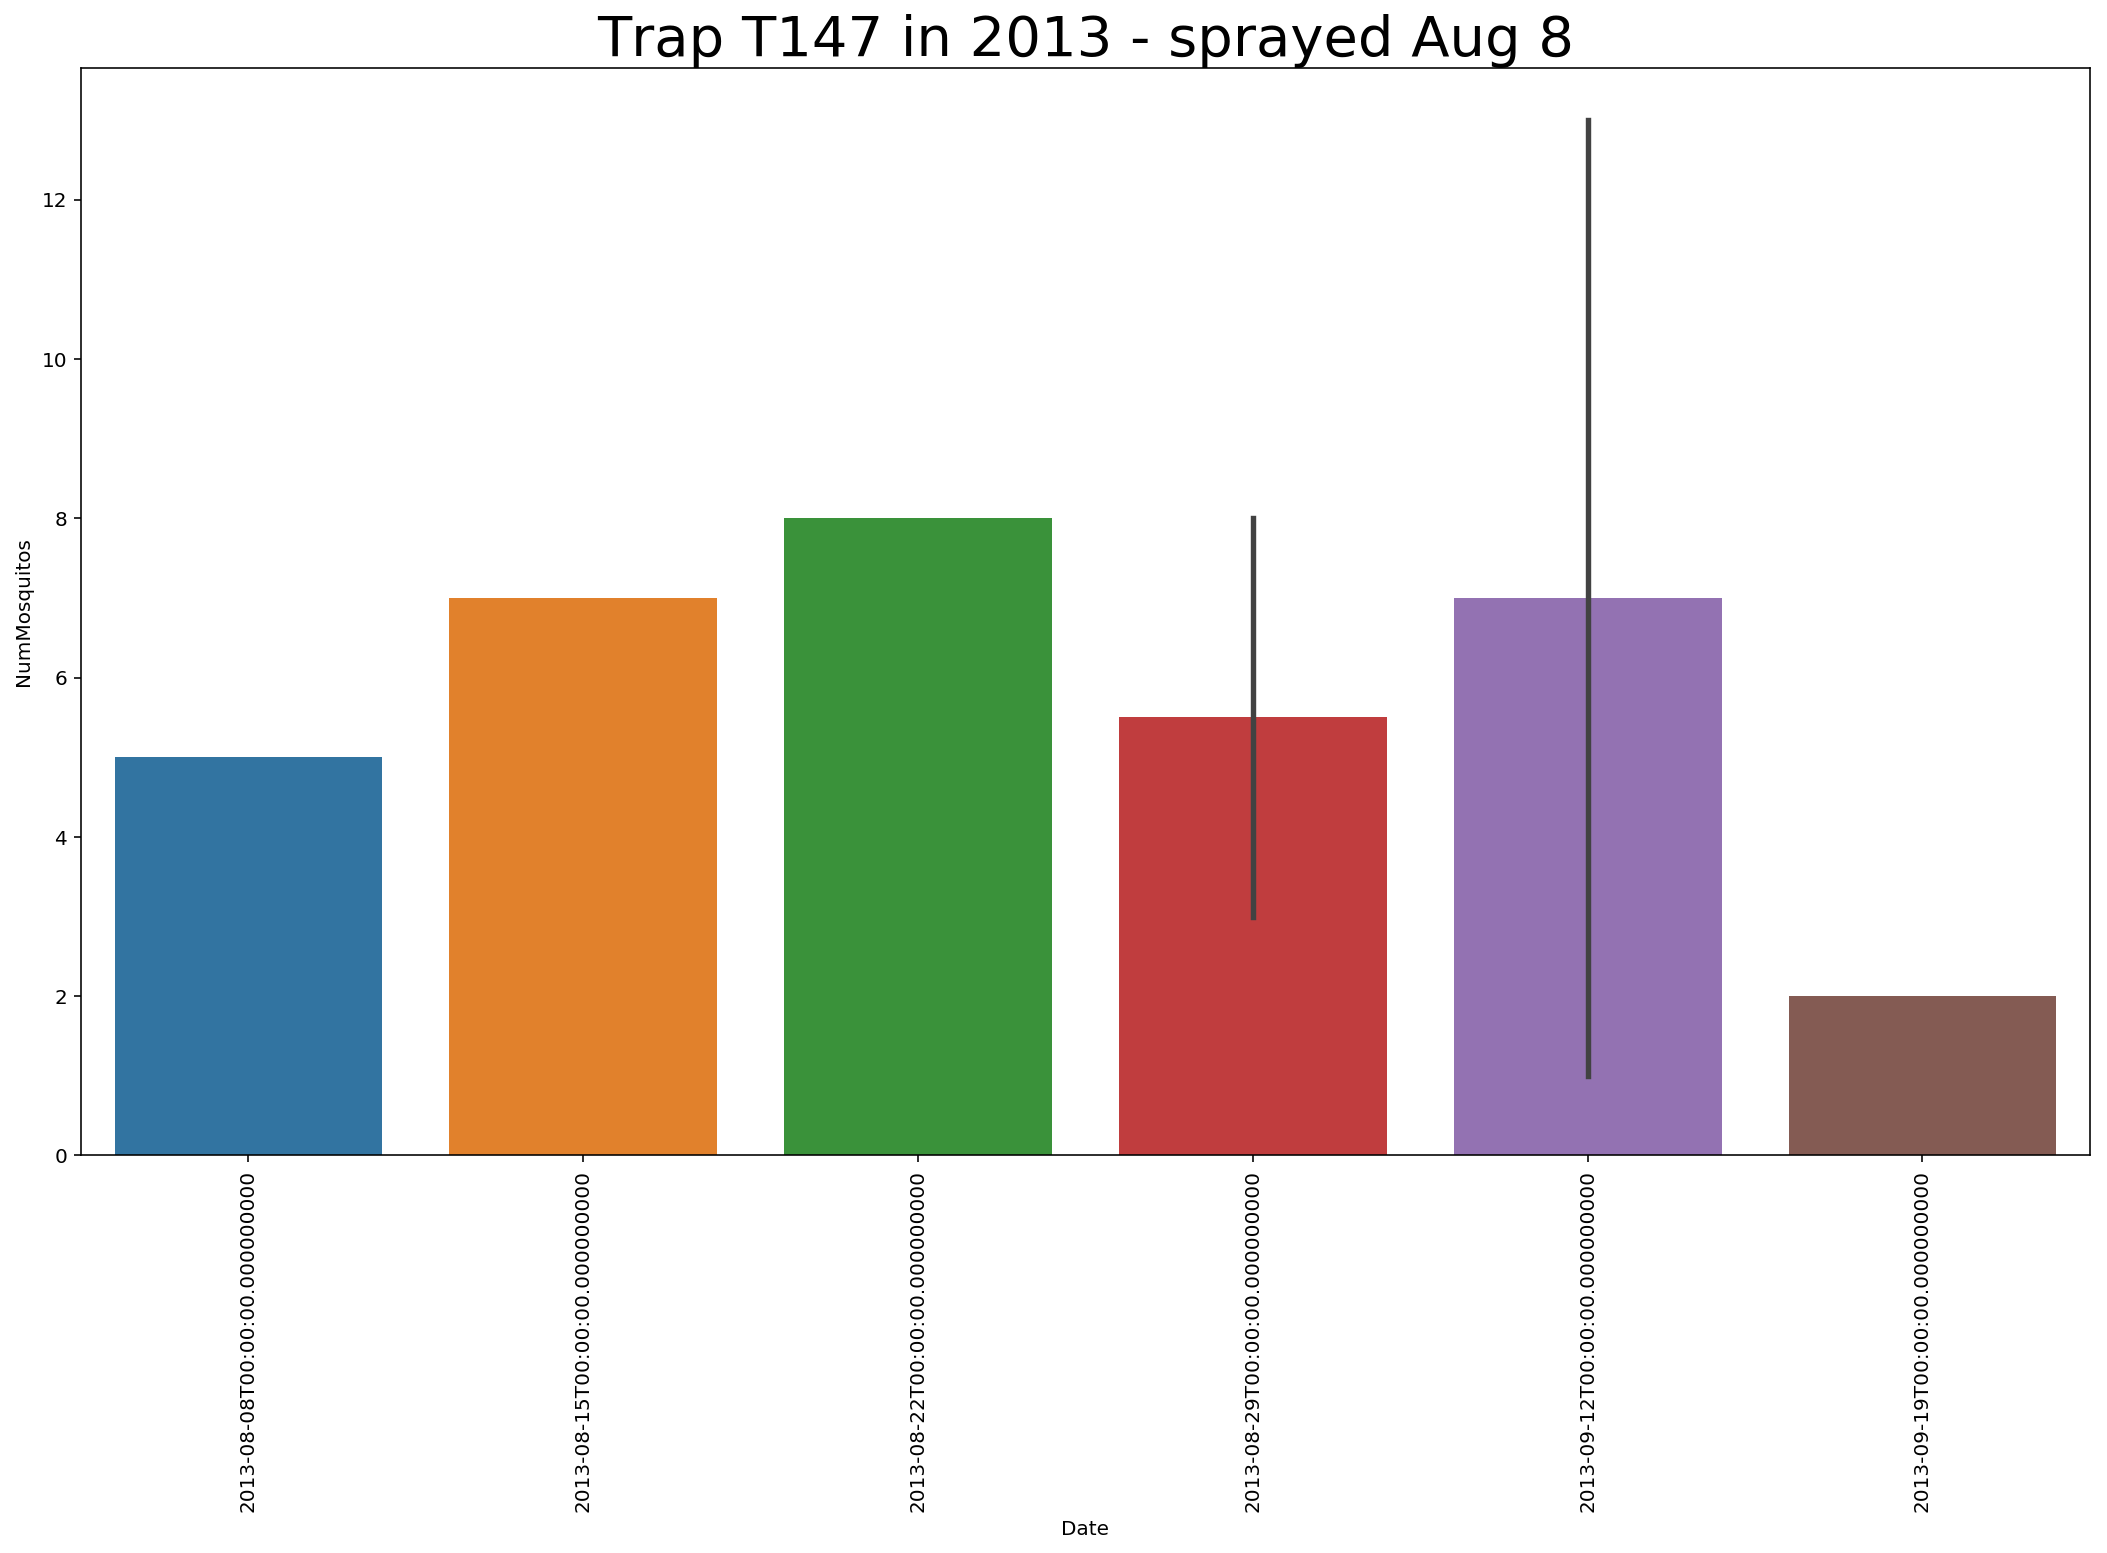

In [36]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T147') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T147 in 2013 - sprayed Aug 8', fontsize=28)

Text(0.5, 1.0, 'Trap T066 in 2013 - sprayed Aug 29')

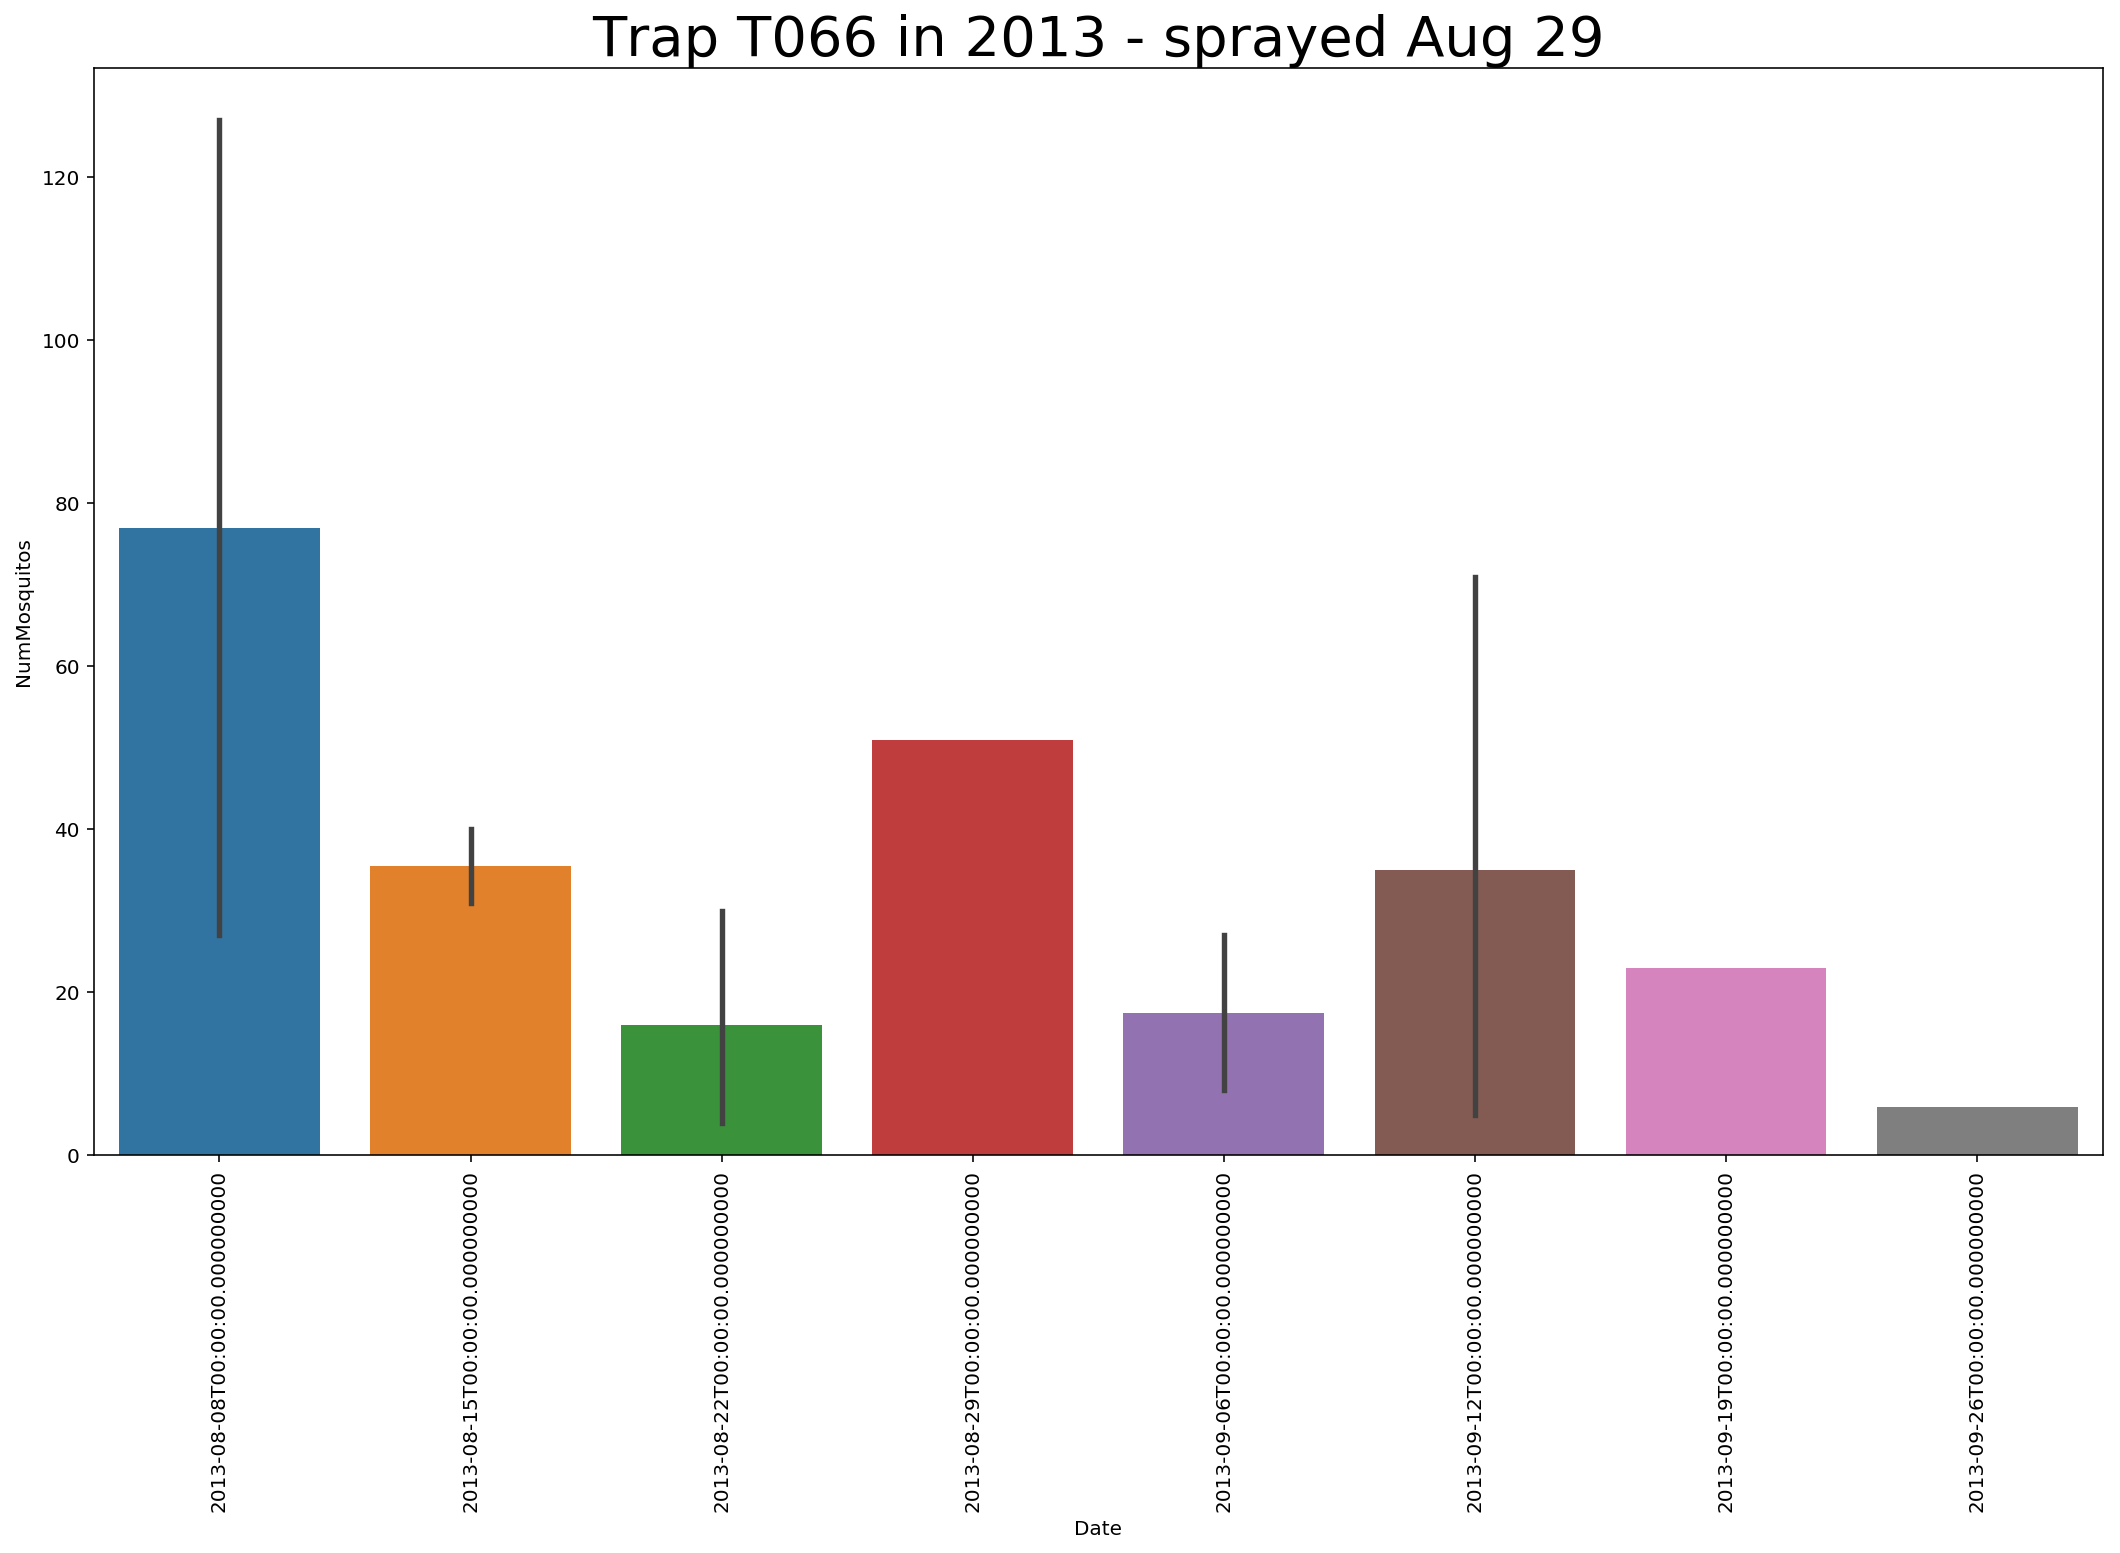

In [37]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T066') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T066 in 2013 - sprayed Aug 29', fontsize=28)

Text(0.5, 1.0, 'Trap T227 in 2013 - sprayed Aug 22')

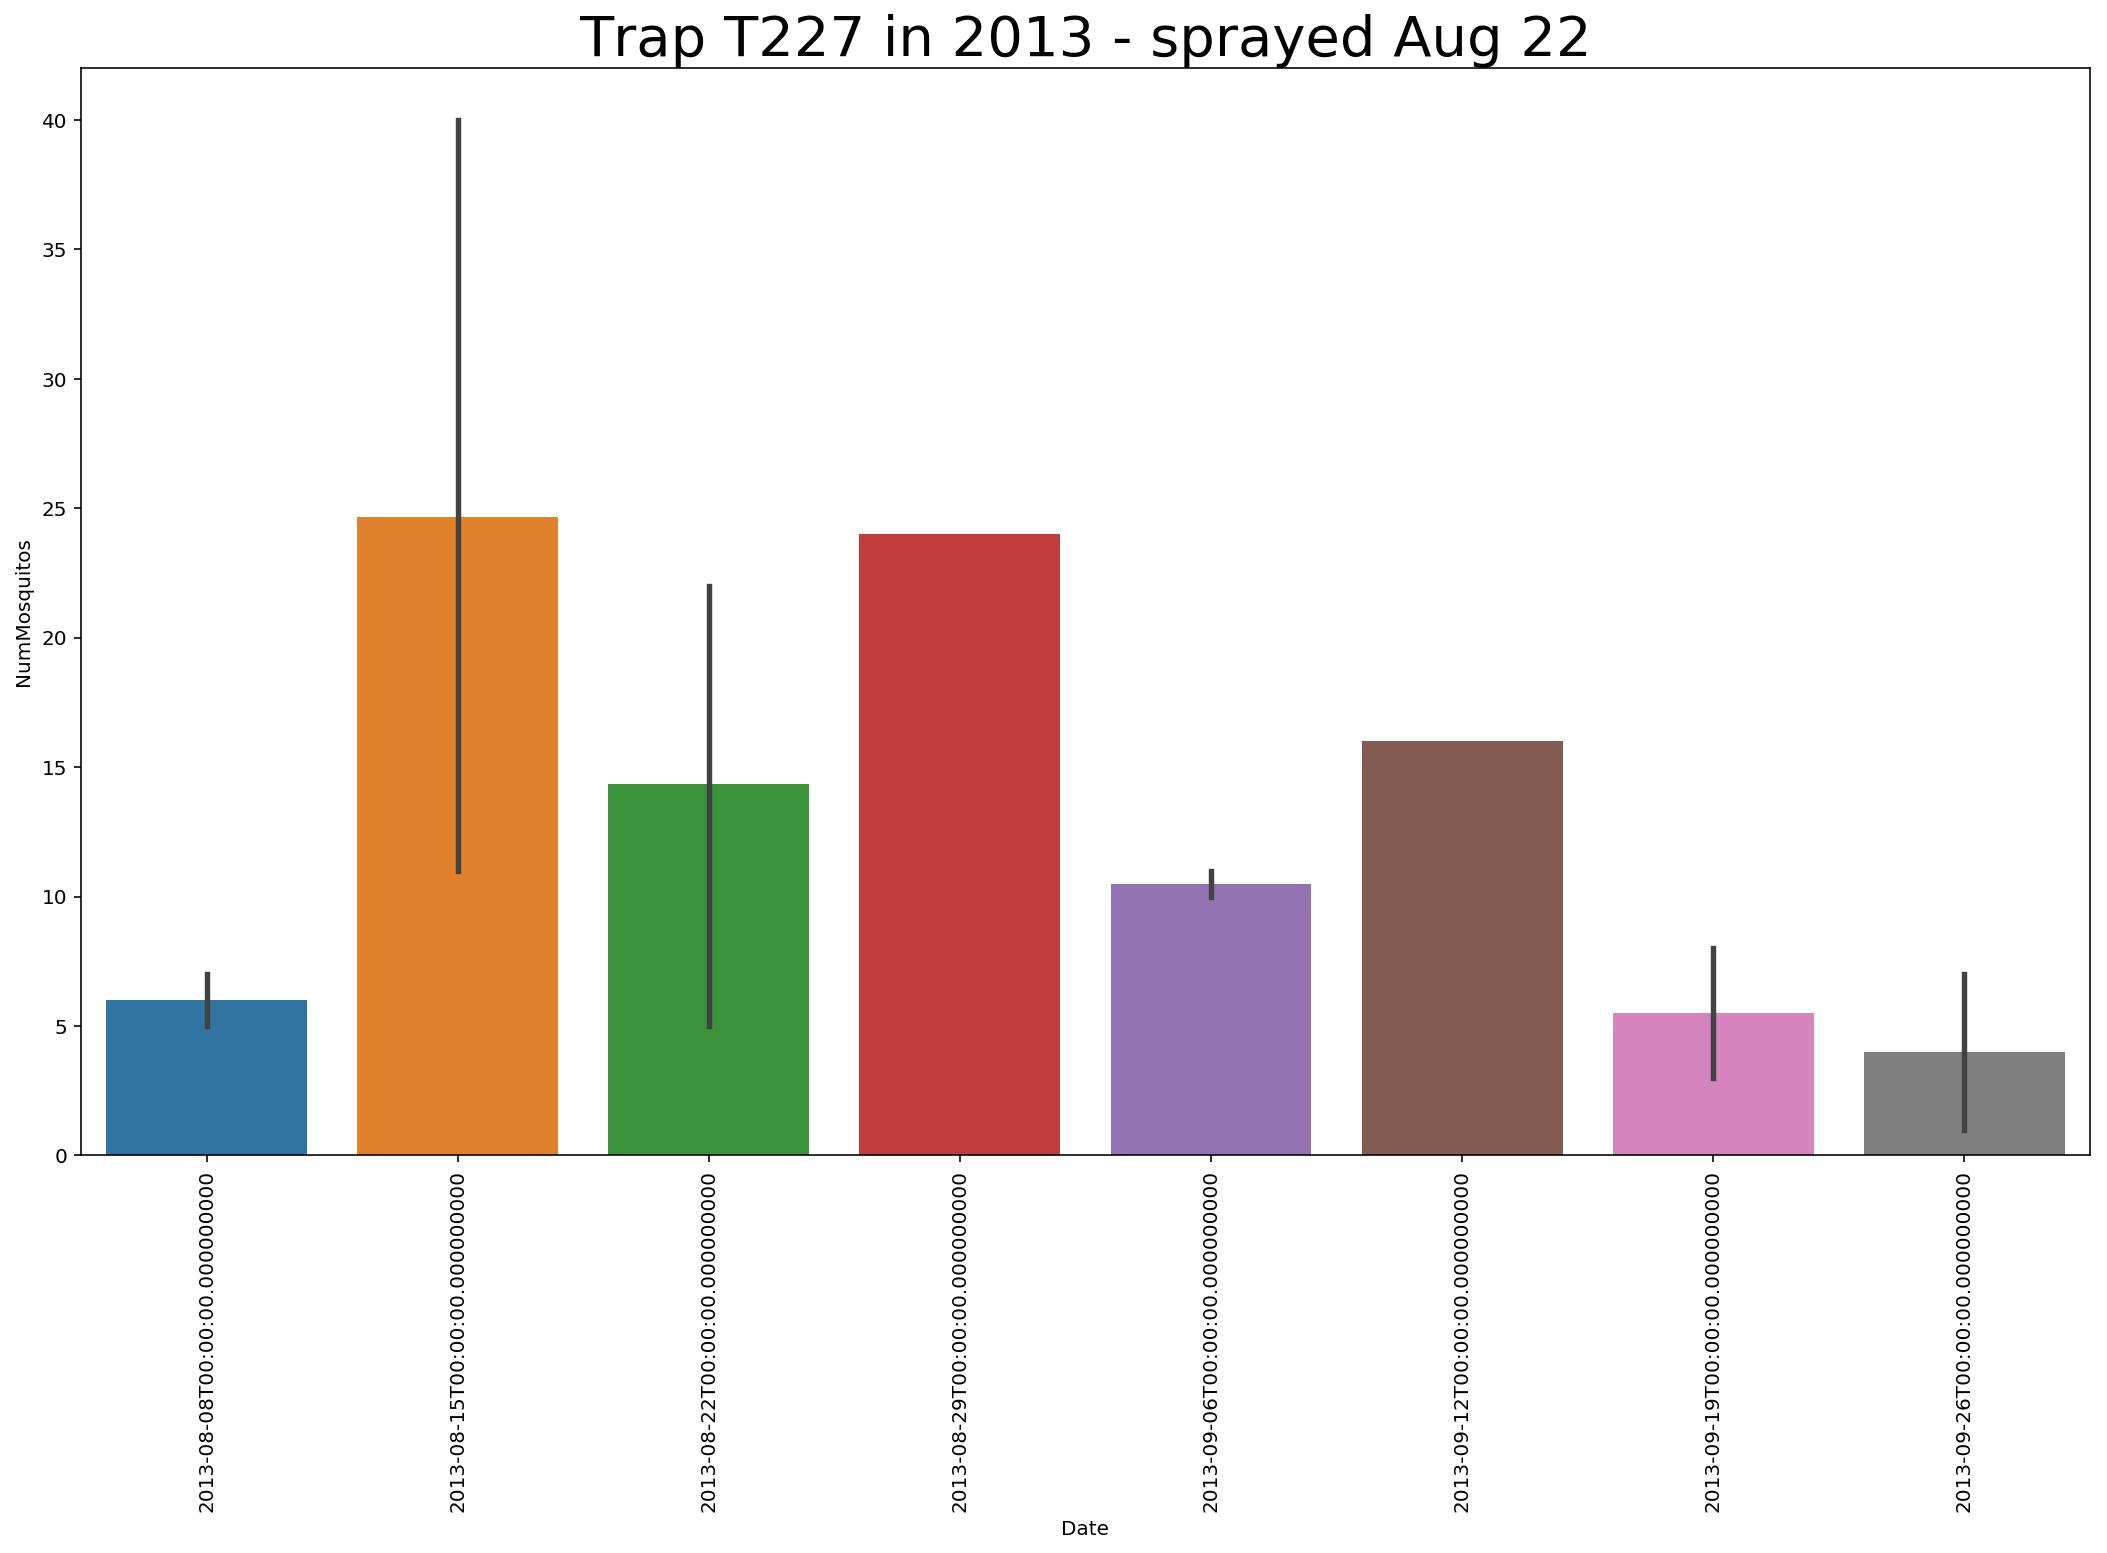

In [38]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T227') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T227 in 2013 - sprayed Aug 22', fontsize=28)

Text(0.5, 1.0, 'Trap T138 in 2013 - sprayed Aug 22')

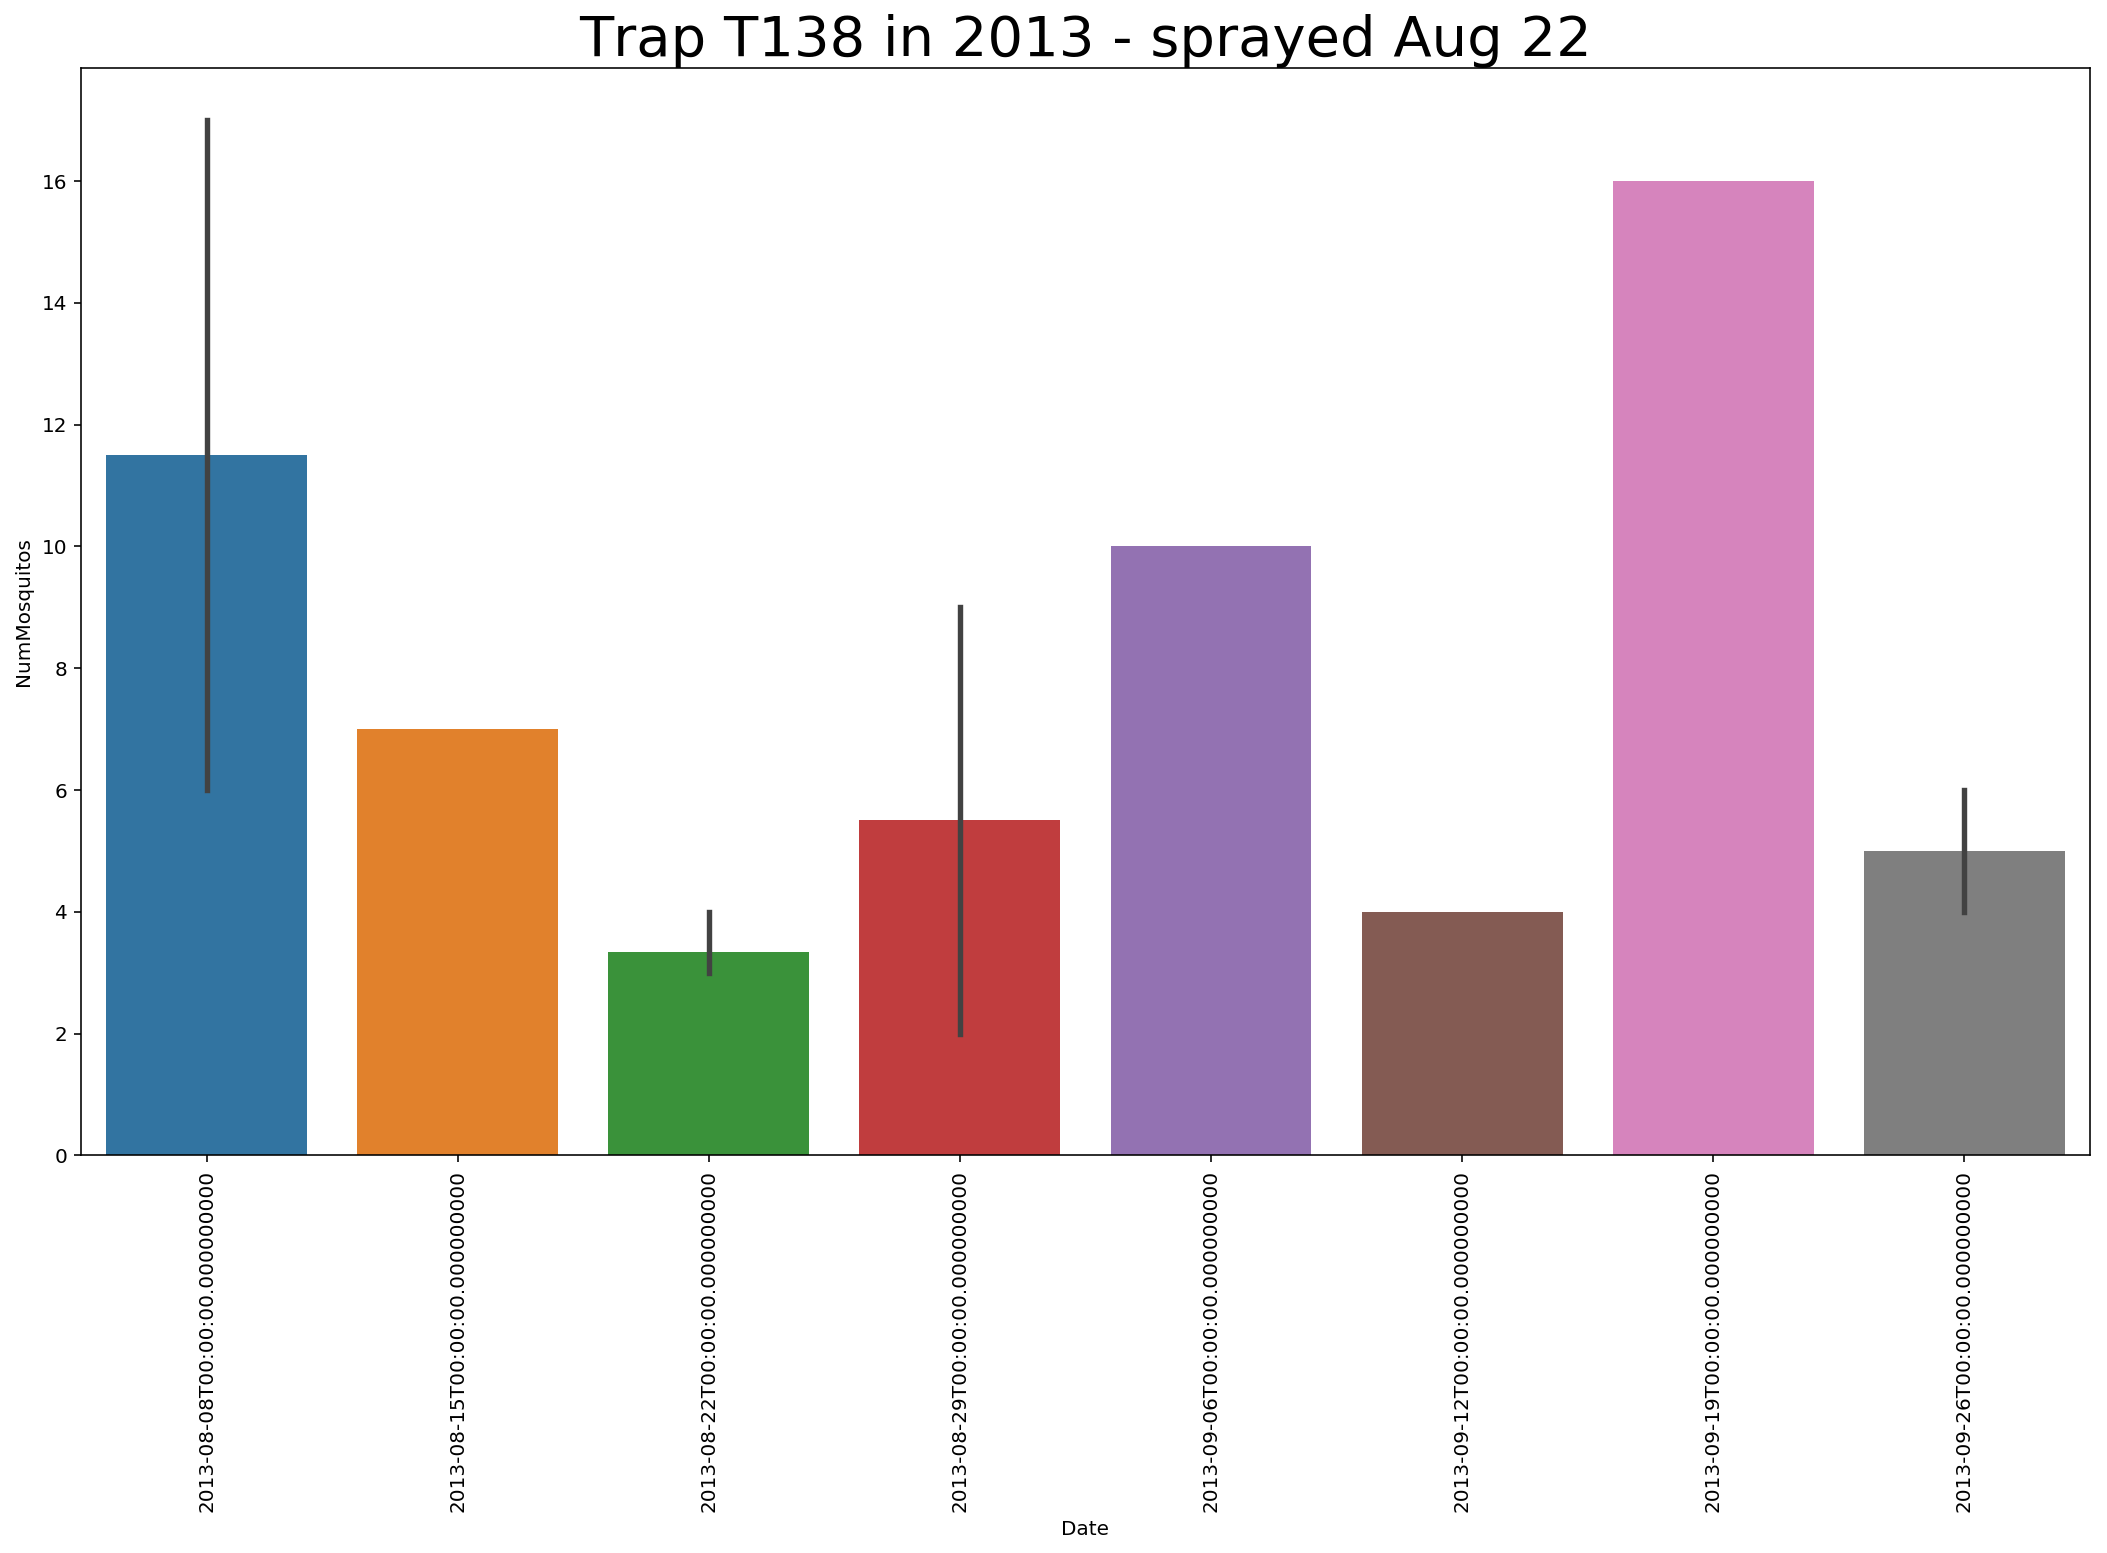

In [39]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T138') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T138 in 2013 - sprayed Aug 22', fontsize=28)

Text(0.5, 1.0, 'Trap T233 in 2013 - sprayed Sep 5')

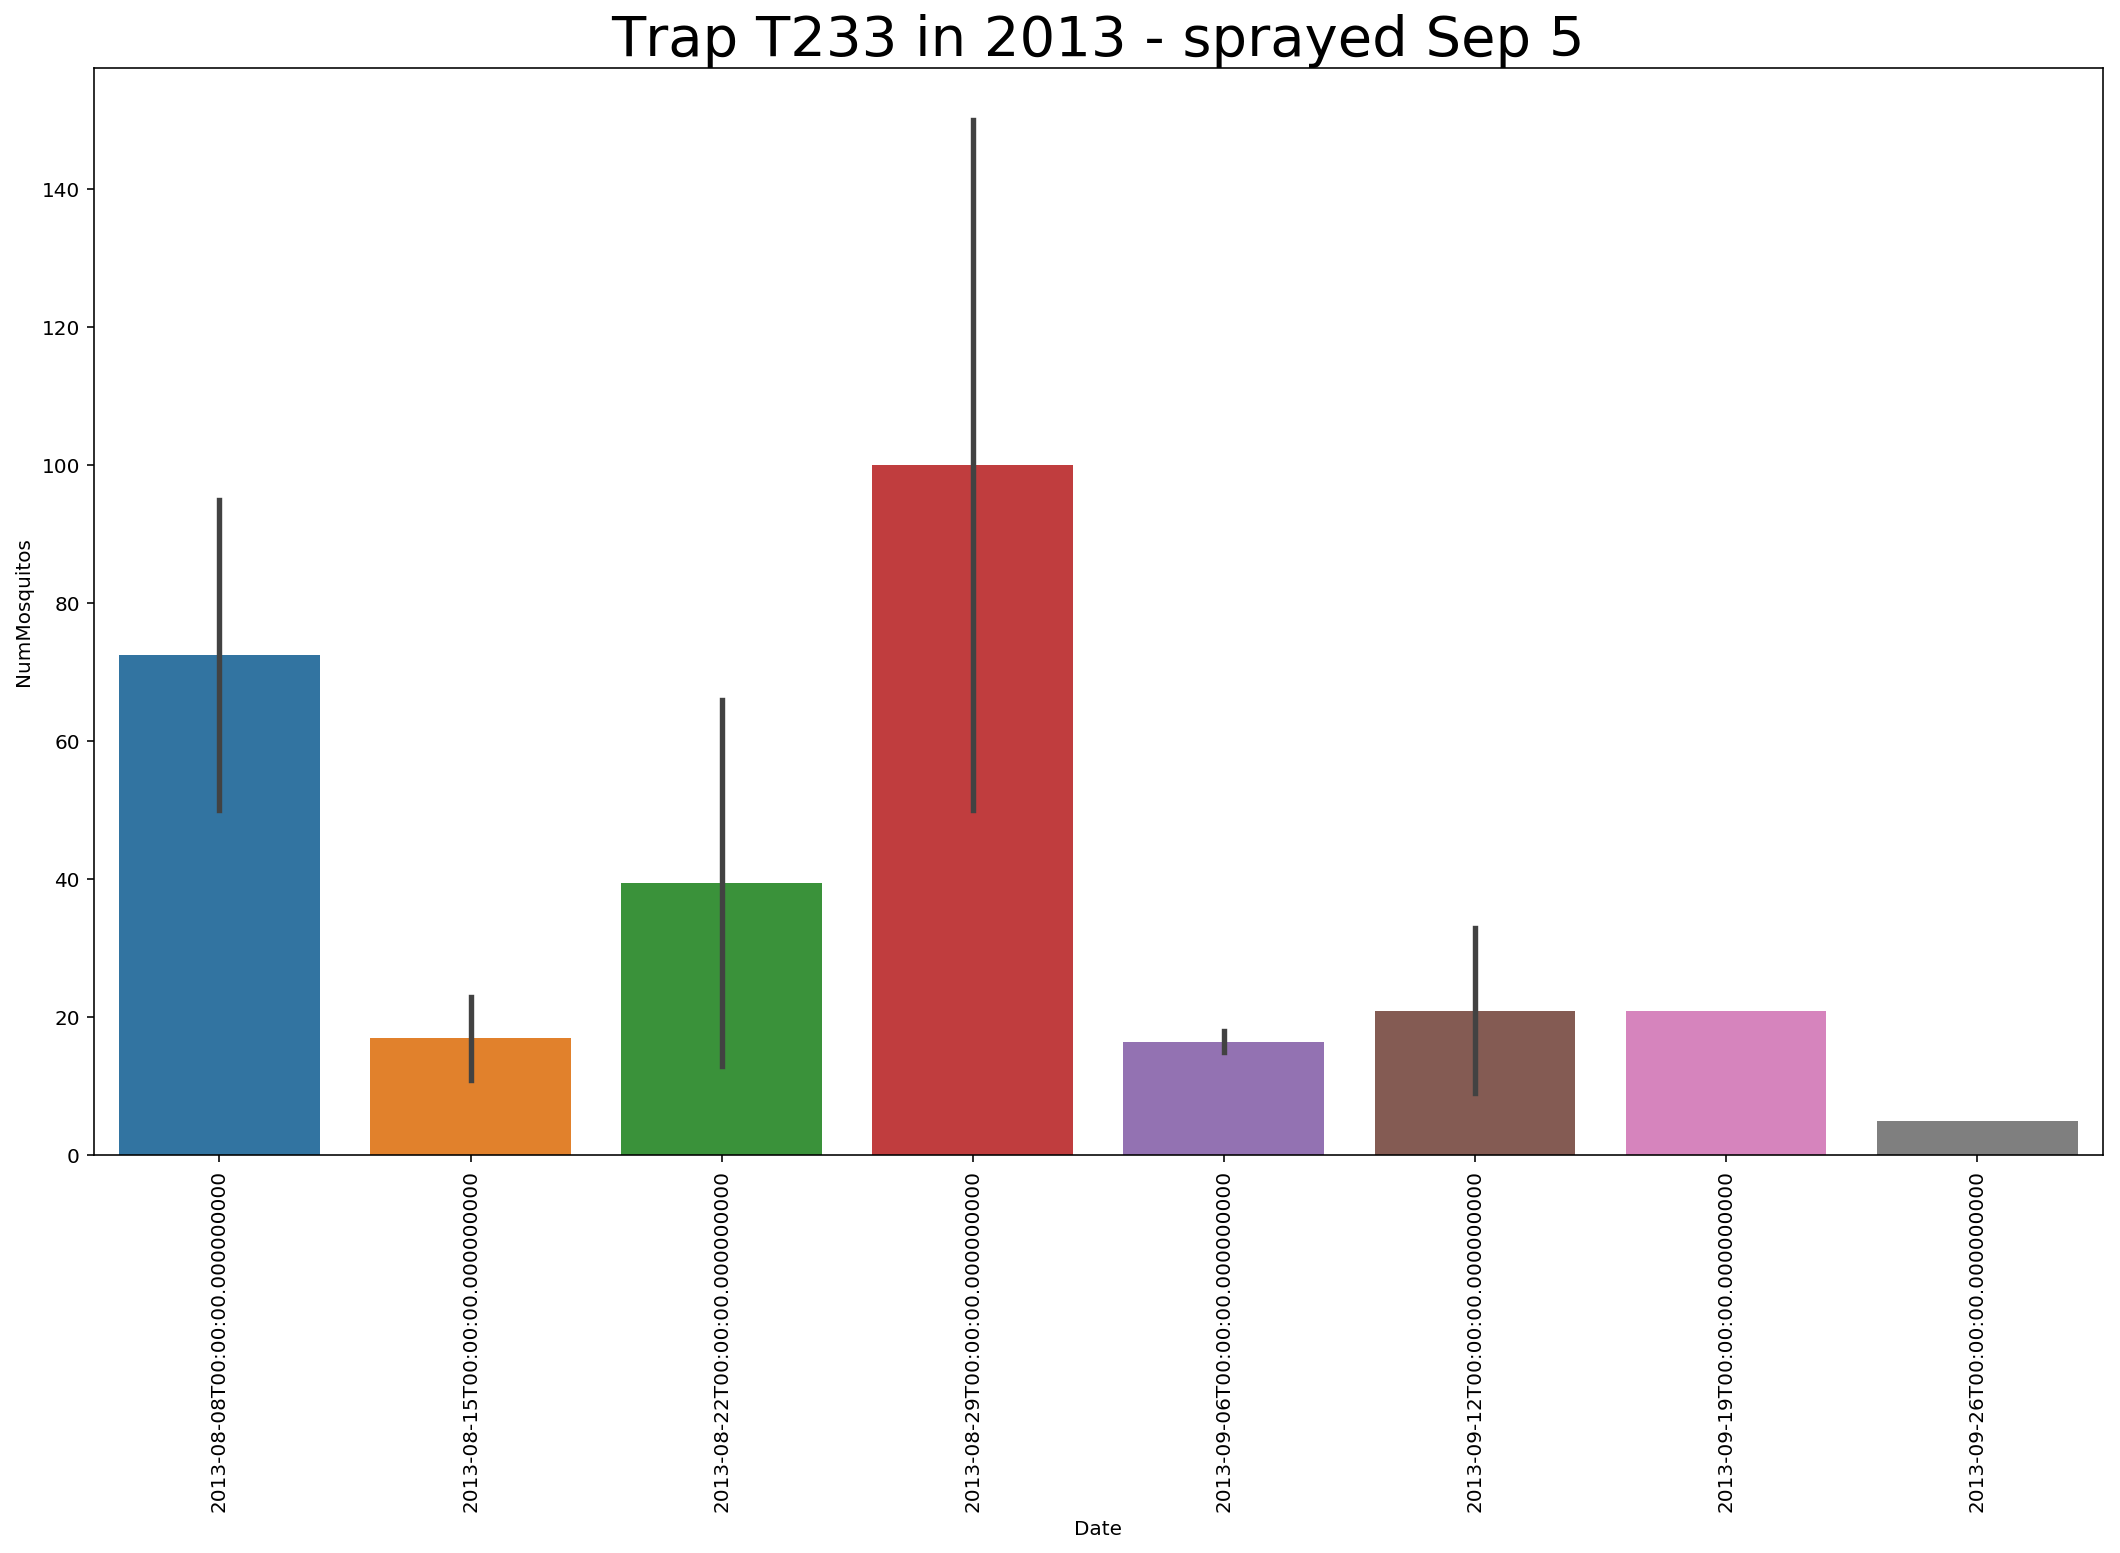

In [40]:
plt.figure(figsize=(18,10))
sns.barplot(x='Date', y='NumMosquitos', data=df_train[(df_train['Trap'] == 'T233') & (df_train['Date'] > '2013-08-01') & (df_train['Date'] < '2014-01-01')])
plt.xticks(rotation=90)
plt.title('Trap T233 in 2013 - sprayed Sep 5', fontsize=28)

---